In [2]:
import numpy as np
from pprint import pprint
import sys, os
import pickle as pkl
import matplotlib.pyplot as plt


import matplotlib
font = {'family' : 'sans-serif',
        'sans-serif': 'Arial',
        'style': 'normal',
        'weight': 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

from os.path import expanduser
home = expanduser("~")
model_home = os.path.join(home, 'src/model/ca3_biophysical/')
sys.path.append(os.path.join(home, 'src/model/ca3_biophysical/utils'))
sys.path.append(os.path.join(home, 'src/model/ca3_biophysical/cells'))
sys.path.append(os.path.join(home, 'bin/nrnpython3/lib/python'))

from SetupConnections import *
from NeuronCircuit import Circuit
from analysis_utils import baks
from neuron import h



%load_ext autoreload
%autoreload 2

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


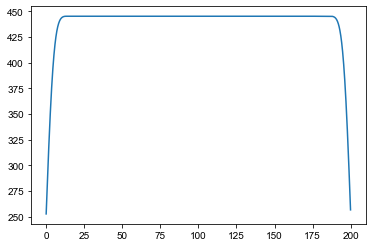

In [3]:

delay = 500.
dt = 0.1
params_path = os.path.join(model_home, 'params')
ar = Arena(os.path.join(params_path, 'arenaparams_ripple.yaml'))
arena_map  = np.arange(0, 200,step=0.1)

ar.generate_population_firing_rates()
#ar.generate_cue_firing_rates('LEC', 1.0)
total_fr = None
for i in range(400):
    fr = ar.cell_information['MF']['cell info'][i]['firing rate']
    if i == 0:
        total_fr = np.copy(fr)
    else:
        total_fr += fr

plt.figure()
plt.plot(arena_map, total_fr)
plt.show();



In [4]:
ar.generate_spike_times('MF', dt=dt, delay=delay)
ar.generate_spike_times('MEC', dt=dt, delay=delay)
ar.generate_spike_times('LEC', dt=dt, delay=delay, cued=False)
ar.generate_spike_times('Background', dt=dt, delay=delay)


population MF: gid 0: fr = [20.       19.994083 19.976347 ...  0.1       0.1       0.1     ] spike_times = [  521.5   602.6   616.6   649.6   657.    913.7  1134.8  6629.7 18277.9
 28496.4 35279.2 38389.8]
population MF: gid 1: fr = [19.851889 19.904964 19.946375 ...  0.1       0.1       0.1     ] spike_times = [  438.2   507.7   511.6   555.2  3448.9 32918.9 34236.9 36361.1]
population MF: gid 2: fr = [19.414104 19.523827 19.622555 ...  0.1       0.1       0.1     ] spike_times = [  506.8   609.1   616.4   732.4  4671.5 24170.5 24429.2 31016.6 31670.3
 32900.2]
population MF: gid 3: fr = [18.70581  18.867405 19.019138 ...  0.1       0.1       0.1     ] spike_times = [  536.    555.6 16645.1 20387.5 33914.1]
population MF: gid 4: fr = [17.7574   17.964    18.162254 ...  0.1       0.1       0.1     ] spike_times = [   66.6   463.3   500.7   520.3   539.2   595.4   611.5   620.4   740.3
  9931.6 23872.8 28114.  31705.9]
population MF: gid 5: fr = [16.608328 16.851463 17.088045 ...  0.1  

population MF: gid 50: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [2.33000e+01 1.27040e+03 1.27630e+03 1.30950e+03 1.36520e+03 1.44200e+03
 1.66880e+03 1.12338e+04 2.80239e+04]
population MF: gid 51: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  110.4   128.6  1139.5  1238.9  1249.8  1254.4  1271.1  1293.1  1303.
  1343.1  1410.   1456.5  1463.6  1477.2  1750.6 26331.2]
population MF: gid 52: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 1367.8  1372.3  1444.6  1500.   1516.8  4947.8  5673.8 10191.1 28136.8
 28454.7 38846.9]
population MF: gid 53: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  821.6  1097.9  1335.2  1377.   1491.   1570.  10541.2 17899.9 25511.2
 30487.6 33523.4]
population MF: gid 54: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 1219.8  1386.7  1401.4  1428.5  1534.6 20753.3 20846.7 29610.1 32010.1
 34358.7 35820.8]
population MF: gid 55: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  145.1   209.7  1310.8  1349.5  1354.3  1387.5  1403

population MF: gid 100: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  460.6  1939.1  2035.4  2072.8  2126.9  2162.5  2177.4  2227.4  2291.
  2304.1  2367.3  2384.8  5293.8  5517.9  6577.5  7176.7  7690.3 12171.2
 23125.9 24231.3]
population MF: gid 101: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  472.2  1950.8  1964.3  2084.3  2110.3  2127.6  2178.5  2212.1 12341.8
 24086. ]
population MF: gid 102: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 1884.2  2052.3  2077.2  2088.2  2091.6  2274.9  2298.1  2309.9 15541.9
 35164.8 38192.9]
population MF: gid 103: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  301.3   413.2  2062.9  2066.9  2189.9  2215.8  2258.3  2295.8  2304.5
  2326.5  2387.3 28638.2]
population MF: gid 104: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [   69.1   104.5   182.5 17703.2 22720.5 25635.4]
population MF: gid 105: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 2044.4  2124.1  2132.8  2164.4  2411.3  4601.4 21818.7 22131.8 37869.7]
po

population MF: gid 150: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 2753.6  2869.3  2982.6  3019.1  3178.8  3204.4 10260.9 11415.2 15002.4
 18463.6 39397.7]
population MF: gid 151: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [8.10000e+00 1.61500e+02 6.55100e+02 2.85710e+03 2.87940e+03 2.92130e+03
 2.93710e+03 3.10250e+03 3.14770e+03 4.51760e+03 5.88760e+03 6.55170e+03
 1.68493e+04 2.13902e+04]
population MF: gid 152: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 2786.2  2855.1  2930.2  2970.6  3007.5  3043.3  3057.9  3068.5  3088.4
  3139.7  3228.9 13558.8 17270.7 18589.2 33000.2]
population MF: gid 153: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 2953.3  2988.4  3053.8  3069.   3073.7  3080.4  3123.8  3177.7  3251.2
  3263.1 34277.2]
population MF: gid 154: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 2894.   2923.3  2932.   3006.1 19747.2 31225.8]
population MF: gid 155: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  467.5  3035.7  3042.5  3109.   3

population MF: gid 200: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [4.50000e+00 2.55900e+02 3.68940e+03 3.70960e+03 3.77810e+03 3.81900e+03
 3.82650e+03 3.84530e+03 3.86520e+03 3.97470e+03 4.01960e+03 2.70482e+04]
population MF: gid 201: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  415.6  3651.   3664.6  3720.8  3879.3  3900.3  3959.1  3967.1  4004.1
  5596.5 13096.1 24591.8 39209.6 40336. ]
population MF: gid 202: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 3692.7  3734.4  3825.1  3835.5  3846.1  3869.8  4004.3  4008.1  4026.
  4137.1 29822.8]
population MF: gid 203: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  222.5   484.6  3118.3  3828.9  3832.5  3844.   3896.4  3909.1  3936.9
  3989.8  4003.8  4045.3 12904.5 12951.4 19432.1 27988.3 31153.9]
population MF: gid 204: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  245.7  3820.9  3828.5  3972.7  4042.5  4059.5 25292.1 26098.6 31358.2
 32277.8 32517.9]
population MF: gid 205: fr = [0.1 0.1 0.1 ... 0.1 0.1

population MF: gid 250: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  276.3   379.5   448.6  4470.4  4500.4  4521.8  4786.5  6081.3 19389.4]
population MF: gid 251: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  156.2   335.7   425.9  4566.4  4661.   4689.4  4778.6  4894.6 10735.5
 21462.2]
population MF: gid 252: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 4578.7  4637.4  4655.2  4676.9  4746.6  4757.8  4833.7  4853.8  4912.3
  4951.6 11134.  13634.6 19079.1 19185.5 29108.5]
population MF: gid 253: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 4483.9  4591.6  4623.6  4671.1  4674.5  4681.5  4715.9  4718.9  4784.2
  4821.   4861.4  4872.2  4906.4  4917.  17637.3 33848.6]
population MF: gid 254: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  291.2  2177.1  4475.4  4613.2  4674.5  4716.3  4879.9  4992.5  7037.4
  9675.3 14395.7 15374.4]
population MF: gid 255: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 4602.1  4653.5  4822.2  4848.4 14556.9 15469.3 183

population MF: gid 300: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  465.8  5307.8  5400.3  5505.3  5512.3  5564.7  5753.9  8250.5 21029.4
 23871.9 27758.3]
population MF: gid 301: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 5413.   5453.2  5489.5 10765.  24891.2 25624.5 25826.7 29362.7]
population MF: gid 302: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  151.2   257.4  5228.5  5415.1  5524.6  5819.1  7395.2 26323.4 33383.3
 38817.9]
population MF: gid 303: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  180.9  3912.2  5498.7  5597.1  5666.4  5695.9 11493.7 22261.8 25102.3
 34859.5]
population MF: gid 304: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [   92.9   191.3   270.1   286.3  5437.9  5459.6  5588.9  5604.8  5633.5
  5770.   5835.6 14085.2 15294.8 21074.6 32286. ]
population MF: gid 305: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [6.80000e+00 3.47800e+02 4.95100e+02 5.45010e+03 5.57360e+03 5.62160e+03
 5.68910e+03 5.70360e+03 5.72150e+03 2.5895

population MF: gid 350: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 3031.4  6119.3  6339.7  6389.   6424.2 36012.3]
population MF: gid 351: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  206.3  2550.5  6233.9  6241.8  6325.5  6750.  12796.4 16310.4 21356.5
 40283.2]
population MF: gid 352: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  418.7  6206.9  6241.7  6313.3  6401.9 18495.3 31421.2 35744.8]
population MF: gid 353: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  283.4  6265.5  6298.   6354.7  6359.9  6412.5  6423.2  6460.6  6526.6
  6645.2 14303.1 15209.8 37000.7]
population MF: gid 354: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [   67.4   350.4   454.3  6172.9  6271.8  6317.2  6365.6  6456.1  6507.6
  6549.2  6604.3  6641.7  6659.5  8305.  14580.2 25793.1 27608.4 35992.2]
population MF: gid 355: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  176.7  2526.7  5567.1  6328.1  6421.9 17414. ]
population MF: gid 356: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] 

population MEC: gid 0: fr = [30.5      30.490978 30.463928 ...  0.1       0.1       0.1     ] spike_times = [  450.5   511.2   590.    737.9  1864.6  1919.9  1964.9  2121.9  2153.4
  2175.3  2216.6  2313.4  2317.   3200.7  3607.7  3716.1  3842.8  3862.6
  3894.8  3938.4  4009.8  4732.8  4856.1  5039.9  5347.9  5401.8  5404.8
  5504.   5513.6  5563.6  5578.5  5585.2  5595.1  5635.3  5680.2  5689.4
  5779.1  6150.6 31074.7 38088.3]
population MEC: gid 1: fr = [48.528    48.802994 49.050514 ...  0.1       0.1       0.1     ] spike_times = [  385.7   539.8   546.2   562.3   575.2   596.7   605.3   625.8   632.5
   645.    693.5  1880.5  1892.6  1901.5  1957.1  2100.5  2119.5  2134.
  2191.7  2196.7  2211.8  2261.6  2265.1  2310.3  2322.   2852.3  2867.8
  3601.3  3697.4  3736.5  3776.2  3810.8  3822.6  3852.2  3863.   3879.8
  3883.8  3887.5  3954.1  3978.4  4007.   4028.   4056.8  5351.7  5420.2
  5466.1  5472.4  5496.3  5506.6  5523.6  5540.   5543.5  5552.9  5568.7
  5587.9  5596.7  560

population MEC: gid 33: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [ 1377.1  1381.   1384.8  1612.8  1775.3  3175.3  3214.6  3233.2  3249.9
  3291.9  3339.2  4180.3  4703.   5031.   5085.5  5099.8  5135.1  6513.1
  6670.7  6681.1  6760.6 12241.8 26956.9 36159.6 37082. ]
population MEC: gid 34: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [ 1622.   1640.9  1683.8  1692.2  1732.8  3125.6  3223.7  3261.6  3290.1
  3301.2  3315.8  3388.5  3395.4  3428.1  3586.7  4468.   4749.5  4789.
  4998.8  6542.   6549.2  6608.7  6644.7  6656.5  6787.8 14493.3 14782.6
 15477.7 18231.7 24093.4 31183.1]
population MEC: gid 35: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  876.   1630.   1707.   3321.   3381.   3936.1  4340.1  4610.7  5025.9
  5243.3  5253.1  6557.2  6638.7  6653.   6701.7  6816.8  7046.7 17788.9
 32958.8 40441.5]
population MEC: gid 36: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  604.9   981.3  1440.9  1544.4  1563.2  1643.1  1676.1  1696.   1732.9
  1788.2  1836.

population MEC: gid 64: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  858.3   862.7   905.3   927.7   939.9   973.3   992.4  1087.2  1888.6
  1931.5  2027.9  2444.9  2556.3  2642.7  2798.4  3038.6  3361.9  4190.
  4234.5  4299.2  4332.3  4343.2  5521.9  5656.2  5868.7  5880.5  5946.7
  5950.4  5994.   6047.1  6084.3  6151.4  6707.5 14948.1 16224.4 20388.4
 24403.6 32140.3 32989.9 33527.6 38189.7]
population MEC: gid 65: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  448.    635.8  1883.3  2539.2  2684.2  3186.6  3466.1  4252.5  4401.8
  5969.7  6331.  10576.  14460.6 25356.9 29055.9 35579.8]
population MEC: gid 66: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [1.21000e+01 9.49700e+02 1.20570e+03 1.23750e+03 1.46500e+03 2.18640e+03
 2.32630e+03 1.08734e+04 3.83074e+04]
population MEC: gid 67: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  826.7   934.3   984.3   991.4  1009.6  1026.1  1030.3  1064.   1072.4
  1117.5  1173.9  1234.8  1238.6  1557.8  1735.   2614.1  26

population MEC: gid 97: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  119.3   488.1  1237.8  2043.3  2119.8  2304.5  2455.   3594.6  3626.3
  3643.7  3729.5  3771.1  3775.1  3782.   3795.1  4883.4  5020.7  5028.6
  5332.3  5381.2  5512.6  5516.9  6087.9  6546.8  6905.8  7034.8  7065.6
  7104.3  7123.7 11229.  27074.4 30401.1 30545.6 33684.9]
population MEC: gid 98: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  534.   1542.8  2286.6  2300.6  2582.4  3294.   3689.4  3846.1  5308.1
  5321.5  6023.5  6685.9  6764.   6940.8  6989.6  6993.3 28594.7]
population MEC: gid 99: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  767.   2556.1  2851.6  4088.3  5451.8  5528.7  5532.4  5877.7  6849.5
  8048.5 17397.9 19152.7 29549.9 33097.6]
population MEC: gid 100: fr = [20.248169 20.302454 20.344845 ...  0.1       0.1       0.1     ] spike_times = [  324.4   538.6   585.1   615.    626.3   681.7  1060.8  2155.7  2193.1
  2235.1  2241.8  2277.4  2346.8  2358.   2379.   2385.4  2398.5  3

population MEC: gid 130: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [ 1198.5  1307.   1433.6  1437.7  1457.6  1485.4  1551.6  1556.9  1631.
  1655.9  1670.9  1778.6  2414.3  2755.7  2969.8  3022.4  3048.4  3056.2
  3065.2  3098.   3151.1  3170.   3258.1  3315.1  3319.1  3397.5  3419.4
  3433.8  4633.6  4640.7  4752.3  4825.9  4884.7  4897.4  4957.1  5045.2
  5367.1  5696.7  5808.8  5815.3  6288.1  6325.   6424.5  6499.4  6598.8
  6631.2  6639.9  6678.1  7311.9 22181.3 26453.6 27066.9]
population MEC: gid 131: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  759.   1169.4  1311.7  1496.1  1555.   1610.6  2801.8  2986.5  3099.2
  3128.4  3337.8  3341.2  4458.5  4752.2  4824.3  4849.4  4853.3  4926.2
  4997.2  6350.6  6509.9  6790.8  7633.5  8057.4 13121.9 17371.9]
population MEC: gid 132: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [ 1108.   1352.1  2584.2  2636.1  4515.7  6219.3  6464.9  6613.8  8965.7
 16069.5 17365.9 25086.6]
population MEC: gid 133: fr = [1.  1.  1.  ..

population MEC: gid 162: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  331.4   706.3   879.6   891.7   912.8   977.3   997.   1030.5  1471.9
  2405.2  2471.9  2521.8  2598.5  2643.5  2647.1  2714.   2757.   2761.2
  3656.6  4071.4  4230.7  4237.6  4257.6  4268.   4276.8  4280.   4319.5
  4343.8  4397.5  5576.2  5722.3  5774.4  5793.2  5856.1  5888.1  5895.
  5931.7 11679.7 12938.9 35024.1]
population MEC: gid 163: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  409.1   667.5   677.7   720.7   740.5   782.3   785.4   810.    838.
   844.    847.9   850.9   866.3   875.4   879.3   884.3   891.2   902.2
   914.3   928.7   942.5   948.    962.2   976.9   985.2   989.4   993.2
  1008.8  1016.1  1031.3  1043.9  1047.5  1055.3  1059.5  1116.   1119.1
  1179.3  1206.5  1261.3  1766.   2320.1  2327.3  2412.6  2467.1  2485.9
  2536.8  2543.9  2557.7  2565.4  2590.5  2601.6  2615.6  2623.9  2631.9
  2637.8  2650.1  2657.5  2665.5  2678.5  2686.7  2708.2  2727.4  2735.4
  2748.4  2801.2 

population MEC: gid 184: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  424.5  1263.9  1280.4  1308.2  1870.   1918.   2558.6  3809.4  4770.8
  7053.6 29920.5]
population MEC: gid 185: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [1259.8 1463.8 1468.2 1483.8 1606.7 1871.  1931.7 3259.2 3285.5 3310.5
 3350.8 3427.1 3448.  3462.  3487.4 4989.5 5135.3 6470.9 6552.3 6592.2
 6642.4 6711.5 7159.4 9510.2]
population MEC: gid 186: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [  113.9  1549.7  1597.2  1744.3  1758.9  1773.7  1802.7  1908.   2981.6
  3252.4  3309.7  3315.2  3418.8  3441.2  3572.4  4089.4  5014.6  5082.4
  5174.2  5234.4  5259.5  5302.2  6548.4  6593.   6608.1  6860.4 14021.
 14465.7 19543.4 21041.5 28277.7]
population MEC: gid 187: fr = [1.  1.  1.  ... 0.1 0.1 0.1] spike_times = [ 1496.5  1615.1  1723.   1766.6  1802.9  1825.   2514.1  2571.5  3363.1
  3369.5  3591.5  4203.5  4368.2  5105.9  5125.2  5168.8  5180.5  5183.8
  6202.9  6657.3  6763.8  6800.2  6825.4  6

population LEC: gid 40: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  222.8  1412.5  6697.8  8103.4 23032.  35130.1 37267.3]
population LEC: gid 41: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  401.4   499.1 28363.1 39604.1]
population LEC: gid 42: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  258.5   290.5 12771.5 33979.6 38912.3]
population LEC: gid 43: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  214.5 10229.6 13787.1 24871.6 34738.5]
population LEC: gid 44: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  181.7 24833.1]
population LEC: gid 45: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  219.3   263.    363.5   386.6 22783.6 26388.2 37449.6]
population LEC: gid 46: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  370.   4890.6  5967.9 25921.8 26343.1 31131.  33144.1 34185.6]
population LEC: gid 47: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [8475.9]
population LEC: gid 48: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [13553.3 21498.7

population LEC: gid 123: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  773.5  3866.2  5329.5  8008.4  8166.4 11544.7 12536.9 16770.9 23342.1
 25669.8]
population LEC: gid 124: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 141.1  457.8  498.4 5350. ]
population LEC: gid 125: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [26622.5 28307.2]
population LEC: gid 126: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  323.   3174.4  4024.4 10709.7 23057.6]
population LEC: gid 127: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  332.5   480.5  5666.7  6663.1 18217.6 28876.2]
population LEC: gid 128: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [13702.8 22494.  40410.9]
population LEC: gid 129: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 7368.9 21588.8 26637.9 27434.6 32875.2]
population LEC: gid 130: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 4712.3  7971.7 18226.  19317.5 22202.7]
population LEC: gid 131: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [

population LEC: gid 204: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  148.   2867.   8663.4 13548.2 29327.1]
population LEC: gid 205: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [   35.7   153.1   423.5  3915.4  4612.9 11974.2 18024.1 18422.6 20788.8
 25224.7]
population LEC: gid 206: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 5060.9 14607.8 22525.9]
population LEC: gid 207: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  219.6 10584.4 17194.8 21198.7 27101.1]
population LEC: gid 208: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  216.    477.6  4473.4 29097.4]
population LEC: gid 209: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [  195.8   361.   6473.4 32525.6 39253.3]
population LEC: gid 210: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [   72.7 12750.1 24344. ]
population LEC: gid 211: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 7483.9 30652.6 32494.7]
population LEC: gid 212: fr = [0.1 0.1 0.1 ... 0.1 0.1 0.1] spike_times = [ 420.3 8258.

population Background: gid 12: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2448.1  4170.5  4197.6  4723.2  4798.3  6053.3  7974.8  8023.7  9495.6
 11910.1 12033.1 12256.1 13631.6 13879.  14737.4 15713.7 15926.3 17448.6
 17912.5 18763.8 19040.  22831.2 23612.5 25658.8 29617.6 30478.9 31477.9
 31614.4 32048.1 32230.1 32300.3 32461.4 32522.2 32611.9 32792.  33532.4
 34209.2 34572.4 35143.5 35684.4 37024.9 38439.  39236.1 39997.8]
population Background: gid 13: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  367.8  1226.5  1340.6  2056.5  6309.1  8939.5  9028.2 10895.7 11657.4
 11698.9 11744.4 11748.7 11969.4 12263.9 12489.8 12816.4 13426.7 15038.6
 15138.4 15911.1 15921.2 15972.5 16661.8 19231.  20844.7 22465.8 22810.9
 23606.1 23895.1 24252.2 26048.3 26505.7 27167.4 27623.9 27841.4 28237.8
 29707.7 30756.7 32710.  33217.9 33747.6 34427.3 35032.9 35296.2 37929.4
 39527.9 40412. ]
population Background: gid 14: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1390.   1554.5  1691.   2608.1  281

population Background: gid 35: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  175.3  1070.   1139.   1283.3  2456.3  3544.6  8160.8  9341.3 10018.6
 10623.5 10870.1 11115.6 11371.9 13039.3 15233.5 15490.3 16306.2 16546.2
 17609.7 19142.2 19665.2 19857.2 20213.2 21790.7 22085.  24919.3 25306.1
 25787.9 25927.8 26339.1 29805.8 30668.2 30858.2 33827.2 34899.7 36370.4
 36708.4 37725.8 37855.4 38716.3 38723.1 38831.5 38881.7]
population Background: gid 36: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  965.8  2595.3  2962.9  6611.4  6755.2  7209.3  7313.6  8574.4  8925.2
  9645.2  9719.2 10178.  10288.4 14474.3 14817.1 15145.  15660.9 16368.2
 17370.2 17500.8 17643.5 26924.  26974.  27158.9 28237.3 28543.2 29055.5
 29546.9 29995.7 31115.  32404.9 32880.7 33802.1 34036.9 37174.7 38834.5]
population Background: gid 37: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2585.6  3610.8  3787.7  4603.7  5433.5  5603.1  7678.4  7931.1  7978.3
  9864.3 13089.  13549.4 14906.1 18933.3 19046.  19360.9 19722

population Background: gid 58: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.41000e+01 6.19910e+03 6.34670e+03 6.75030e+03 6.75750e+03 9.77670e+03
 1.08433e+04 1.12393e+04 1.24302e+04 1.32667e+04 1.34282e+04 1.41478e+04
 1.42299e+04 1.56618e+04 1.77498e+04 1.77713e+04 1.82157e+04 1.86240e+04
 2.13426e+04 2.23996e+04 2.28316e+04 2.32719e+04 2.59470e+04 2.68792e+04
 2.73477e+04 2.77023e+04 2.94589e+04 3.25360e+04 3.37338e+04 3.37389e+04
 3.55778e+04 3.67041e+04 3.67818e+04 3.68214e+04 3.73478e+04 3.80377e+04
 3.89927e+04 3.90099e+04 4.01198e+04 4.01992e+04]
population Background: gid 59: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  586.2  1016.8  2666.5  4777.   5772.8  5817.1  6236.3  8316.9  9014.4
  9187.7 10010.3 10603.4 11175.3 11231.8 11259.9 11995.8 12392.6 13331.4
 14665.1 16863.1 18285.1 19599.  20966.6 21142.3 21509.  21806.7 23050.4
 25981.3 27811.9 28434.3 28924.2 28967.9 29041.8 30792.8 31679.1 33438.1
 34473.3 37563.4]
population Background: gid 60: fr = [1. 1. 1. ... 1. 1

population Background: gid 81: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  344.    480.3   808.2   844.6  1682.1  1940.3  2249.5  4504.5  4789.7
  4795.3  5130.3  5488.6  5691.4  6550.6  7099.3  7801.7  8503.5  9653.1
 10974.5 13369.7 14038.8 14235.9 15169.6 15795.9 16954.1 19096.3 20996.3
 21528.3 22652.  23454.6 24702.3 24887.  24967.5 26057.4 27823.6 28323.1
 29158.1 29340.  32429.8 32982.3 33355.7 34688.8 35949.2 37811.3 39186.2
 39190.3]
population Background: gid 82: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.73000e+01 1.01600e+02 8.57500e+02 1.23820e+03 2.96850e+03 3.10720e+03
 4.37390e+03 4.38360e+03 6.53660e+03 7.72760e+03 8.35310e+03 9.94550e+03
 1.18647e+04 1.33795e+04 1.45598e+04 1.71309e+04 1.86706e+04 1.94086e+04
 1.99501e+04 2.00484e+04 2.14148e+04 2.15523e+04 2.30654e+04 2.45559e+04
 2.47643e+04 2.49600e+04 2.52032e+04 2.57389e+04 2.61486e+04 2.63437e+04
 2.80948e+04 2.85327e+04 2.89740e+04 2.90899e+04 2.95348e+04 2.96995e+04
 3.00493e+04 3.10259e+04 3.34479e+04 3.

population Background: gid 106: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  272.4   421.4   436.6  1549.4  1565.8  2238.9  2754.7  3979.6  4259.6
  5672.4  9683.  10012.3 12556.8 12885.1 14149.9 14615.3 17205.5 18624.1
 19742.7 22296.7 25194.6 26218.1 27203.2 27873.7 27919.4 29043.8 29205.9
 29990.3 30037.7 30812.  31774.3 32432.3 32453.7 32461.7 32495.5 33408.3
 34298.  34437.9 36816.2 36847.8 37845.2 38362.7 38559.4 40173.1 40199.9]
population Background: gid 107: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  922.3  1250.2  2307.3  2646.1  3985.7  4355.1  6518.   8169.5  8184.2
  8822.9  8977.3  9214.3  9314.9 10300.9 11492.  12737.7 14226.3 14762.3
 17647.8 19079.6 19619.6 20144.2 21108.2 21941.3 22830.9 25446.5 27020.2
 28343.1 28528.6 28559.4 29699.3 31244.  31479.2 32235.3 32985.4 33416.
 35052.1 36493.6 38163.9 39340.4 39828.7 39850.3]
population Background: gid 108: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  103.   2678.8  4887.6  6271.8  6952.8  7699.4  8960.9 11516.4 144

population Background: gid 129: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2643.9  3164.2  3951.5  6611.   6998.8  7045.   7781.8 11731.1 14854.
 18083.  20547.4 21151.3 22632.4 23834.2 25711.3 26873.3 28067.9 28551.6
 28826.2 28965.2 31512.3 31926.9 32069.3 34322.3 34807.3 35436.9 35753.6
 36150.1 37153.7 38419.2 38684.5 40085.1 40221.8 40250.6]
population Background: gid 130: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  389.    406.   2623.1  3258.2  6299.1  6885.7  8154.1  8250.   8358.3
  8578.1 11287.9 11513.5 14183.8 14350.7 15732.2 16048.6 16651.1 17670.6
 19042.7 19135.1 19297.7 20927.8 21833.6 22310.1 22695.8 23462.6 25327.4
 25974.9 26001.7 28013.1 28765.  31508.7 33144.7 34097.5 35158.2 40065. ]
population Background: gid 131: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1127.2  1926.6  2471.1  7345.6  9308.8 12992.  13177.5 13315.  14519.4
 15075.6 17385.  19755.6 21953.1 22485.3 22569.5 26228.9 26624.5 27357.8
 27816.6 28739.3 30818.8 32034.4 33627.3 34587.9 35139.4 357

population Background: gid 152: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  235.5   652.1   942.7  1240.5  4464.8  5050.2  8009.6  8777.8 10578.8
 10700.4 12092.4 17359.3 17436.9 18507.  18634.7 18681.5 19429.7 20048.8
 20173.4 23957.7 24363.1 24642.9 25275.8 25406.7 25973.7 26789.3 27454.8
 27478.3 28064.9 31841.5 31978.1 35140.2 35931.6 36365.3 36468.7 36583.3
 40161.9 40377.3]
population Background: gid 153: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  295.1   384.1   493.6  1636.1  2066.5  2499.8  4889.2  8524.8  9084.2
 10348.2 10381.4 10570.6 12301.1 12438.5 12908.1 13481.  13549.2 13644.4
 14042.7 14268.6 14850.2 14912.3 17983.8 19134.2 19591.5 20115.6 20582.3
 21168.6 22927.2 23055.5 23281.4 26156.1 27433.6 30205.3 31399.8 33241.5
 33519.3 34451.  35129.2 35985.1 36037.3 36319.  36370.6]
population Background: gid 154: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  724.8   906.8  1506.7  2099.5  2390.2  2572.6  3012.9  6417.8  6735.3
  7813.1  9533.8 12486.8 12823.  13260.7 1

population Background: gid 175: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  790.5  3052.   3625.8  3728.   3896.9  4819.3  5503.8  5537.3  6496.6
  9111.7  9160.9  9303.3 12956.7 16084.6 16770.5 19562.2 19859.4 21844.6
 21923.3 24315.9 24484.3 24983.9 27218.1 27729.3 29870.5 30677.6 30950.8
 32112.8 32229.8 33566.7 34503.1 35145.2 35561.5]
population Background: gid 176: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  261.3   456.8   895.9  1332.3  1942.5  2850.2  6935.7  7124.9  8194.5
  9895.8 13691.8 14455.1 14516.2 15939.6 17298.4 18257.2 19999.9 20288.6
 21144.7 22341.7 22497.  23809.7 24058.9 27451.9 30158.7 32329.  33497.3
 34360.4 35124.1 35844.4 36875.5 38888.  39597.  40126.6 40179.6]
population Background: gid 177: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1494.7  2953.1  3260.3  4412.8  5079.9  8425.2  8491.6  9134.5 10041.1
 10275.3 10546.4 11443.5 12136.5 12983.4 16276.1 17106.9 17348.  19558.4
 21617.1 22524.1 23153.9 24648.7 25365.2 26960.8 27167.8 28519.7 30047.
 30

population Background: gid 197: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  698.1   795.3  1701.6  2318.7  2376.1  2537.3  3692.6  3794.4  4619.2
  4894.9  5967.9  8352.6  8358.4  9182.1  9570.9  9770.5 10098.5 10327.8
 12526.7 13401.7 14108.7 14987.9 16888.8 16965.2 17441.7 18594.2 20053.6
 21401.4 21954.1 23580.3 24102.4 24775.6 25378.1 25774.7 26225.2 26693.3
 27042.5 30168.2 30262.8 30300.8 31011.4 32723.4 33624.6 35783.7 36077.5
 37048.2 37684.1 38375.5 38539.5 39243.  39721.3]
population Background: gid 198: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1760.   3223.   5056.1  5100.7  6299.4  6842.6  9123.4  9442.2  9589.3
 11416.4 11669.2 13424.8 14057.  14737.2 15773.4 16317.5 17450.8 17732.
 17767.3 18995.5 21396.  21791.2 21858.7 22530.7 22759.8 22944.1 23928.8
 24878.9 26159.9 27758.  29016.9 29290.6 33736.9 35289.7 35297.7 35832.7
 36033.5 36275.7 36879.1 37504.1 37740.2 37997.4 39754.5 39882.8]
population Background: gid 199: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  

population Background: gid 221: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   79.3   687.3  1870.8  5149.8  5321.3  5838.2  7030.3  7870.8  9074.7
  9460.8 10374.7 11084.2 11706.9 15393.1 15410.6 15626.7 15635.6 21024.7
 21146.7 21469.3 22480.9 22562.3 23353.7 25625.7 25664.4 26487.4 27618.7
 29173.5 30099.3 31877.  32449.4 34391.9 36107.3 36544.9 36746.3 36973.7
 37411.1 37673.  39272.1]
population Background: gid 222: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  401.    880.3  1076.2  1468.9  2977.9  4983.7  5054.4  5394.3  6841.6
  6889.6  7201.2  7745.8  7874.3  8005.9 10559.2 12332.3 14376.2 14799.3
 21800.3 21821.  22310.8 24212.6 27585.7 28016.4 28583.4 31576.8 32115.2
 32250.3 32555.8 33631.7 33755.5 34219.6 34749.  35393.1 35780.9 35935.9
 36120.5 36544.6 38397.4 38581.  39768.6]
population Background: gid 223: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   54.7   209.8   786.9  2547.8  2696.4  3558.5  4421.4  6443.7  6831.5
  7266.7  7277.3  8759.8  9395.4 10025.  12580.6 1

population Background: gid 247: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1913.6  3959.1  4648.6  4925.7  6315.7  7772.8  8064.2  9029.   9496.
  9810.8 10619.5 10822.9 12990.3 13097.8 14905.  15035.3 15058.3 15652.1
 15689.5 17006.7 19756.3 20484.1 21074.1 22653.  24387.7 24709.9 25713.8
 25861.3 27514.5 27591.  28518.  30456.6 33034.6 36769.2 39392.5 39570.8
 39701. ]
population Background: gid 248: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2898.1  3613.5  4086.8  4105.3  4663.   5833.3  5946.8  6284.   9011.
  9829.1 10543.1 10979.7 15545.8 16073.8 16127.  17278.7 17439.8 17628.1
 19798.2 20488.  20823.9 21476.4 21532.9 21895.6 23034.4 23137.2 24137.3
 24204.3 24642.1 25195.  27791.1 27858.  29410.7 30065.3 30132.7 30280.1
 31703.1 33165.1 33424.6 35433.4 36490.7 36846.2 37047.5 39185.5 40458.8]
population Background: gid 249: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  911.3  1799.5  2976.4  3176.   3715.5  4656.   6018.   7201.6  8045.9
  8281.6  8626.8 10198.8 11940.3 130

population Background: gid 271: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  828.6  3319.1  3926.1  4982.8  4989.1  7676.4  8835.6  9778.3 11067.5
 11239.2 14136.7 14838.  14872.4 15207.  16376.  18050.3 19201.5 19646.9
 19815.7 21245.9 24313.9 26148.2 26914.2 27636.3 28379.6 29174.  31990.
 32791.6 33419.1 34334.7 35490.3 35896.7 36236.2 37259.9 37494.2 38531.3
 39557.1 39713.3 39974.6]
population Background: gid 272: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1694.6  1862.6  2502.3  3948.4  4327.5  7800.1  8023.2  8937.8  9002.6
 10962.9 11726.2 12144.5 12282.7 14624.6 15146.9 15281.5 15470.9 17230.4
 17554.3 19162.4 20173.  20792.8 23331.6 23518.1 23594.5 23905.3 27290.2
 28480.4 28957.4 29435.9 30489.5 30647.  32223.6 32280.8 32683.5 33533.2
 33973.2 34745.2 35722.5 38466.9 38822.1 39524.6 40213.2]
population Background: gid 273: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  487.4  2100.4  3285.8  3769.5  5549.5  6674.5  7607.   7895.5  8706.9
 10419.  10432.1 11281.3 12012.7 13

population Background: gid 296: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 3027.6  3166.   3346.5  4145.8  4533.2  5187.4  6292.3  6442.8  6742.3
  7855.1  8130.6  8173.6  8983.  10505.5 11079.5 11111.  11181.5 11527.1
 12099.1 12864.  12891.7 13651.1 13724.  14142.5 15019.8 16858.3 21012.8
 22091.7 22553.9 22611.2 23463.8 23875.9 24460.5 24976.7 25463.4 27776.6
 31050.5 31366.2 31531.7 32384.3 32736.  35495.2 37879.5 39737.2 39825.8
 39939.  40081.7 40087. ]
population Background: gid 297: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  332.    464.1   787.3  1027.9  1082.7  4617.2  8330.1  8659.5  9721.4
  9803.7 10393.4 12747.3 13019.3 14469.7 15517.5 15664.2 16605.7 19575.6
 22236.5 23190.5 26061.2 28063.3 29128.  29361.9 30243.5 31423.1 33575.
 34093.  35801.7 40395.6]
population Background: gid 298: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.60000e+01 1.42670e+03 2.09340e+03 2.67820e+03 3.34610e+03 3.56140e+03
 4.06620e+03 6.02790e+03 6.59920e+03 7.02520e+03 7.67010e+03 8.2826

population Background: gid 321: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1370.7  2260.6  4327.1  4409.4  6842.8  7818.9  8250.5  9142.4 12323.4
 12676.  15793.8 16154.1 16831.5 17716.  18800.6 22106.5 23199.9 23407.1
 23961.4 24187.8 24717.8 25070.6 25436.9 25723.7 25859.8 26507.6 28048.7
 28531.7 29037.6 29288.  29673.3 31424.5 31805.1 32502.5 32815.2 33550.7
 34887.3 35220.  35291.1 36275.5 37177.1 37313.2 38130.5]
population Background: gid 322: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1907.2  2155.5  2999.8  6017.4 10462.8 10483.  11056.4 11817.5 13775.7
 14063.2 14875.2 14963.1 15092.7 15476.7 18132.2 19230.  19745.4 21348.2
 22510.2 23012.9 23047.9 23490.9 23894.  24095.3 24142.7 25062.8 26664.2
 28526.8 32215.3 32954.4 36653.  37105.1 37315.5 38302.1 39408.6]
population Background: gid 323: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2329.7  3304.7  3854.2  5334.3  6411.9  9310.4  9753.7 10462.1 10919.3
 12371.2 12848.1 12940.6 13710.3 15453.6 16274.4 16386.4 16683.3 17

population Background: gid 346: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  302.3  4604.2  6995.2  8577.8  9778.4 10131.8 10704.8 13383.6 14563.4
 17216.5 17281.9 17529.  17609.6 20055.8 20608.9 21524.3 23093.  23631.7
 24046.5 24966.1 25310.9 25606.1 31928.5 35301.9 35545.4 38185.4 39870.3
 40055.4]
population Background: gid 347: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  283.5   423.6   772.9  1246.3  2258.8  2558.   4246.8  4836.2  6243.4
  7062.   7957.4  9947.9 10377.9 10524.9 12051.7 12327.  14470.7 14659.4
 14950.3 16771.8 17354.6 17418.9 19448.2 20152.3 20347.1 22416.3 22600.8
 22680.  23925.1 25163.  26607.5 26940.1 27023.2 27552.1 29607.4 31809.9
 32078.1 32526.6 32591.4 32714.5 34834.7 34991.8 37471.2 38124.6]
population Background: gid 348: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1299.4  1992.9  2367.   2919.2  3999.   8221.7 10061.4 10125.9 11720.2
 12075.  12448.1 13398.5 14154.8 17001.  17304.8 17639.3 18133.  20428.
 22285.3 24701.3 26252.2 28956.9 31281.7 32

population Background: gid 370: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [6.60000e+00 2.58950e+03 3.16260e+03 5.73790e+03 7.61310e+03 8.18020e+03
 8.62490e+03 1.08108e+04 1.13080e+04 1.15865e+04 1.20990e+04 1.68634e+04
 1.79756e+04 1.86558e+04 1.97456e+04 2.17895e+04 2.24489e+04 2.47776e+04
 2.51019e+04 2.56725e+04 2.68912e+04 2.91658e+04 2.98910e+04 3.05018e+04
 3.23026e+04 3.32972e+04 3.34034e+04 3.47451e+04 3.47561e+04 3.47884e+04
 3.55000e+04 3.71757e+04 3.72958e+04 3.74115e+04]
population Background: gid 371: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  200.2   330.2   905.9  1303.7  2939.9  3330.   4018.3  6414.3  7065.8
  7816.   7933.6  8439.   9211.7 10030.4 10849.6 11224.8 11464.8 12812.8
 13844.3 14017.4 14213.7 15554.7 21403.  21943.8 21989.8 22186.8 23377.9
 24147.4 24632.  25433.1 26054.8 27249.9 29469.4 31117.9 31879.5 32586.9
 37491.2 38730.5 39034.8 40401.2]
population Background: gid 372: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1455.1  1490.5  1977.2  2412.5  

population Background: gid 394: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  811.8  1280.9  1681.9  1986.2  2009.4  2386.3  2881.4  3702.9  4880.1
  5906.1  7144.6  7497.6  7841.8  7976.5  8167.9 11048.9 12734.8 12787.7
 12878.7 13843.  13957.7 14169.7 14900.8 15603.3 16848.2 16996.8 17277.8
 17936.1 17942.1 22092.3 22686.  22794.1 23044.1 24060.9 25612.4 27060.9
 27160.9 27858.4 28386.4 28944.8 31243.6 31933.8 32309.6 32432.6 33173.5
 33470.8 35862.  36307.6 36662.5 37845.6 39946.1 40361. ]
population Background: gid 395: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1602.5  1718.5  2419.   2509.1  3003.3  3497.2  4066.7  4897.6  5458.7
  5916.7  6470.9  7528.2  8682.2  9833.5 10092.3 11164.6 14904.1 16099.5
 16591.  17750.6 18559.7 19851.  21888.2 22446.8 23908.6 23935.2 24723.3
 25465.6 27029.5 27777.4 28530.6 30064.3 30241.9 31061.6 31961.5 33169.3
 36369.9 37873.8 38426.9 38531.  38955.8]
population Background: gid 396: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  133.9  1115.   

population Background: gid 418: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  349.1   546.8  1928.2  2553.7  3002.6  3443.4  5067.6  6211.   6740.7
  7077.9  7461.5  8098.6  8397.2  9838.1 16634.1 17054.5 17167.9 17997.3
 19487.9 19549.  21728.8 23946.5 25522.6 27040.  27617.8 29250.4 29552.7
 30191.2 32668.2 33384.5 33427.6 35769.6 35988.5 36477.7 39426. ]
population Background: gid 419: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1752.3  4870.9  5130.4  6239.7  7382.2  7479.7  9754.1 10010.9 11762.7
 11872.  12913.8 13626.6 14600.2 15039.1 16421.4 16922.3 17513.5 17977.5
 18825.3 20223.3 20306.4 20774.6 21613.3 23744.7 25987.1 26073.4 26805.4
 28751.8 29421.2 29833.  29957.2 31577.9 31849.8 31873.2 31949.1 32253.5
 32305.9 34877.  35430.5 35890.1 38466.7 39333.2 39533.9]
population Background: gid 420: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  341.9   470.6  2514.8  2818.8  2904.   3836.3  4300.5  8134.1  8484.
  9667.   9686.9 10722.2 13057.1 14075.2 14105.  14608.5 15269.6 153

population Background: gid 441: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [2.27000e+01 2.12000e+02 2.81800e+02 5.44500e+02 5.23980e+03 6.08440e+03
 7.91740e+03 9.95390e+03 1.02429e+04 1.03719e+04 1.13641e+04 1.14354e+04
 1.30108e+04 1.68782e+04 1.70939e+04 1.91591e+04 1.93193e+04 2.00741e+04
 2.03903e+04 2.40101e+04 2.40559e+04 2.43257e+04 2.51998e+04 2.54559e+04
 2.58291e+04 2.59175e+04 2.60946e+04 2.64553e+04 2.85014e+04 2.95074e+04
 2.97110e+04 3.03503e+04 3.35606e+04 3.36240e+04 3.44515e+04 3.59262e+04
 3.75538e+04 3.85362e+04 4.00664e+04]
population Background: gid 442: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  305.3  3644.8  3840.9  4113.9  5964.9  6091.9  7034.3 10970.7 11239.
 13975.5 14476.6 15094.3 15128.4 16628.7 16867.9 18423.2 18774.2 19814.2
 20359.5 22512.2 23226.  25333.  30250.9 30464.4 31603.4 33651.9 34676.1
 35303.7 37352.3 37885.7 38582.1 38697.3]
population Background: gid 443: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  128.4  1364.8  4322.2  4572.3  4937.

population Background: gid 466: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  416.1  1902.6  2072.5  3481.9  4478.3  5106.8  7328.2  7337.7  9506.8
  9522.7 13656.  14752.8 15551.9 18119.5 18422.8 19503.  21454.8 24107.3
 25666.9 26448.3 26566.7 28104.5 28270.  28416.3 29098.4 31186.7 33037.3
 34474.2 34644.3 34867.1 35029.7 37200.5]
population Background: gid 467: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 4386.9  4584.1  6488.1  8710.2 10507.3 11753.4 13242.9 13515.2 14858.4
 16845.4 19780.9 20569.5 23465.  23613.8 24009.  24449.6 25454.6 25504.6
 25610.8 28259.2 29496.7 30505.  31294.2 32600.4 33385.  34795.3 36639.1
 38321.5 38948.8 40321.6]
population Background: gid 468: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  144.2   283.6   293.7  2670.7  3718.3  3762.1  4490.7  4654.3  6342.2
  7709.4  7756.6  9349.   9884.6 11386.3 12145.5 12389.3 13374.6 13486.9
 13510.5 14213.8 14893.1 15292.  16294.3 16593.4 17086.4 17456.1 17983.5
 18084.  18419.3 19216.1 19493.4 20037.6 21824.5 2

population Background: gid 489: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 4011.   6008.1  6714.2  7856.5  8630.2 11344.8 11863.6 12318.1 14008.7
 15567.7 15640.5 16865.1 17136.6 17209.6 17628.1 20198.7 21942.7 22897.3
 23394.4 23521.6 25208.8 25682.  25907.8 27985.8 28557.7 29053.  29549.7
 29808.9 30913.9 31857.2 32261.1 32309.2 34310.7 34527.2 34696.7 35892.6
 37237.3 38918.  39541.  39621.7 39750.9 39844.2]
population Background: gid 490: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  137.8  3935.7  4418.9  5243.2  6371.2  6593.8  6886.4  7833.   8135.9
 11583.3 12570.4 13104.7 14287.8 16052.8 17260.7 18187.  18620.6 20683.1
 21727.3 22286.2 23755.9 24668.7 24785.6 26198.9 26679.5 28700.5 29248.3
 29433.1 29441.2 30014.6 30028.9 30873.  31890.6 33891.6 34918.9 35517.
 36066.5 36499.6 36522.2 37178.9 37963.1 39725.3]
population Background: gid 491: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  383.4  1582.7  1691.   4744.6  4880.1  4977.8  7997.2  9284.1  9486.8
 10215.  10670.6 11

population Background: gid 511: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  898.2   932.1  1418.7  7123.4  7394.2  8560.4 10537.6 11588.4 13236.6
 14199.9 15407.3 19361.2 25812.9 25976.9 28891.9 29144.1 29296.9 30656.2
 30785.5 31370.6 33465.1 34348.2 36104.3]
population Background: gid 512: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  118.9   198.8   817.6  6627.2  7278.3  7657.   8413.  11363.2 12531.9
 14347.1 15337.3 15550.1 15747.  15765.4 17267.9 19363.9 19457.7 19629.6
 21911.6 22263.  23484.7 23542.6 23951.8 24849.5 25036.9 26039.6 26840.1
 28205.6 28446.8 28937.8 30428.1 32022.2 32284.6 32512.2 32861.1 33365.9
 34352.4 35157.7 35759.9 35865.  36590.9 36943.2 37071.3 37911.2 39023.7
 40051.9]
population Background: gid 513: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   83.6    99.8  3472.5  3736.   3888.7  6940.7  7386.7  8567.8  9558.5
  9901.1 12159.5 13928.9 13991.4 15041.9 15054.8 15392.3 16329.9 16619.9
 17402.8 18313.6 19516.  19791.5 20406.6 20962.  21255.1 21961.6 3

population Background: gid 534: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1150.9  3342.1  5263.6  7123.3  7209.6  7654.9  7957.3  8307.6  8318.8
 10195.8 11084.6 11461.4 12643.1 13738.7 15067.  15589.9 15978.8 18058.8
 19509.8 20839.9 21137.8 21499.9 22554.  23973.6 24849.2 25222.2 25586.2
 25844.9 25961.4 26083.5 26711.6 27294.7 28415.3 30427.9 30540.2 31451.4
 31718.3 32045.1 32170.4 35565.4 39758.6]
population Background: gid 535: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  269.9   919.8  1086.1  3556.7  4542.2  5748.   7744.6  8362.6  8563.3
  8767.4  9029.   9039.   9850.1 11574.8 12843.8 16536.3 17594.5 18110.6
 18802.3 20166.4 21084.3 22550.  23366.9 23910.5 24523.8 25058.5 25621.4
 30871.9 31138.4 31496.1 31621.8 35626.6 36619.8 38431.  39216.4 39817.1
 40265. ]
population Background: gid 536: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.90000e+01 8.88900e+02 9.02600e+02 1.06280e+03 1.39380e+03 2.35200e+03
 3.72350e+03 4.34120e+03 6.78000e+03 7.22200e+03 7.86230e+03 8.765

population Background: gid 560: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  192.1   322.3  1022.5  1094.3  2150.9  5984.8  6565.2  9895.9  9996.
 10312.5 11523.  13041.4 14994.4 15373.5 16157.7 18039.6 18148.7 18225.1
 18478.5 19800.7 21504.9 22016.1 24780.6 24874.5 25158.9 25357.6 26305.7
 27149.1 27204.8 28873.9 29254.5 29641.  30014.6 30879.6 36786.6 39309.2
 39646.9 40009.2]
population Background: gid 561: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  869.4  2276.8  2602.5  2926.2  3773.5  4842.3  7916.2  8263.4  8980.5
  9038.7  9504.8  9749.3 10630.5 11134.2 11355.4 11403.7 14267.2 16894.9
 18153.7 18894.9 19381.8 22539.2 23049.8 24292.7 24612.1 25211.3 28880.1
 29155.7 30064.4 30252.6 30863.4 31348.  31728.4 32875.9 33159.4 33682.8
 34579.5 34748.8 35525.5 35586.7 37257.3 37394.  37544.4 37791.5 38233.5
 38253.9 39151.5 40377.4]
population Background: gid 562: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  492.3  1654.5  2500.4  2981.2  3554.8  5424.4  6355.3  6368.2  6863.6
  

population Background: gid 584: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1286.2  1709.2  7245.5  7379.5  7500.7  7638.9  8259.6  9823.1 10493.4
 10686.1 11953.5 12280.6 12539.9 13041.2 13543.2 14852.2 15009.5 15146.5
 17695.  18313.8 18451.2 18757.6 20169.  22189.4 22301.2 23772.7 24987.4
 25553.6 26406.4 26915.5 27361.8 28163.1 28204.1 28220.6 28470.9 28526.3
 28772.3 28805.5 28925.6 29043.3 29131.1 30013.2 30314.  32539.5 35859.6
 35899.4 37300.9]
population Background: gid 585: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  917.8  1351.9  2469.2  4661.6  7792.8  9833.7 10188.  10916.  10986.3
 11079.9 11096.1 11184.  11906.2 11997.7 12173.7 13191.2 13218.8 13296.1
 13553.8 13781.  13899.3 13996.1 14479.1 15169.5 15913.7 16590.3 18158.
 19394.  19550.1 19742.1 20131.1 20235.1 20702.1 22118.  22471.4 23390.6
 23918.6 24899.2 25992.3 26135.2 28931.7 29900.8 30893.9 31696.9 33279.2
 35299.3 36525.4 36933.  37780.6 37819.2 39787.2 40319.8]
population Background: gid 586: fr = [1. 1. 1

population Background: gid 607: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [6.60000e+00 2.91000e+01 8.02800e+02 2.79330e+03 3.35650e+03 3.57200e+03
 6.06810e+03 6.15900e+03 6.82310e+03 7.90570e+03 1.12628e+04 1.15958e+04
 1.20356e+04 1.22315e+04 1.46758e+04 1.54421e+04 1.78226e+04 1.80211e+04
 1.84746e+04 1.88392e+04 1.93290e+04 1.93993e+04 2.02455e+04 2.21757e+04
 2.23971e+04 2.31898e+04 2.45495e+04 2.52460e+04 2.55975e+04 2.80711e+04
 2.85172e+04 2.86854e+04 2.94476e+04 3.00572e+04 3.00691e+04 3.08213e+04
 3.19101e+04 3.21323e+04 3.26134e+04 3.34501e+04 3.46148e+04 3.47009e+04
 3.65245e+04]
population Background: gid 608: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  116.6  1150.8  5687.2  6221.6  6935.6  7360.   9992.  10309.  10441.5
 10514.3 10732.9 10816.  12958.5 13724.2 15466.5 15950.6 15961.  18697.5
 18875.5 19631.6 20881.3 20908.8 21623.4 22513.9 22925.4 24094.4 26078.7
 26676.3 27150.5 28475.2 28491.4 29155.1 29943.5 30900.3 31360.8 31594.2
 31762.6 33851.9 34007.7 34233.8 

population Background: gid 632: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   70.1   161.9  2572.2  4468.2  5295.8  5965.2  7977.6  9538.6  9882.3
 10065.8 10713.  13325.  14874.9 16109.7 16669.6 18276.5 20846.7 21449.3
 23686.9 23796.2 25122.  25882.6 25970.1 26801.5 26933.6 27704.4 29454.6
 30296.1 30724.5 31029.5 32783.9 34056.4 34340.3 34748.4 35289.9 35352.8
 36127.4 36149.6 37938.7]
population Background: gid 633: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  560.3   809.1  4254.1  4858.8  5826.1  6019.1  9083.7  9113.8  9984.7
 12604.9 12888.  13563.7 14092.2 14335.8 15992.  17249.8 17590.7 17734.6
 18463.9 20338.  20452.1 21091.8 21509.2 23073.9 23156.9 23242.2 23288.6
 24447.3 24617.7 25153.9 25623.2 25958.9 27647.4 30849.7 31313.7 33531.5
 33687.1 33732.9 33916.4 35767.5 37412.  38214.4 39786.8 40010.4]
population Background: gid 634: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  493.7  1205.5  2252.7  3428.1  6067.8  7129.3  9091.6  9103.5  9163.5
  9731.9  9980.9 10956.2 1

population Background: gid 656: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   59.6  3519.7  3765.1  5024.6  5395.1  5419.3  6267.2  6452.9  6601.9
  6726.6  7030.6  7518.4  7592.2  9517.   9651.9 10770.3 11690.6 11807.2
 12402.2 14811.7 15312.  15497.7 17053.8 20247.6 20718.1 21843.6 22394.2
 22434.4 22981.9 23929.1 23968.4 24119.7 25114.6 25372.2 27742.1 28396.2
 28445.1 30174.3 31135.4 31491.7 32175.8 33077.4 34324.8 35491.7 35518.6
 36252.4 38343.4 38965.6 39618.6 40172.3]
population Background: gid 657: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  504.2   679.8  1151.   1277.   1321.   1326.5  1331.9  1790.3  3773.1
  4339.6  4522.3  5893.3  6062.8  7096.   7221.7  7381.1  8574.6  8960.8
  9013.5  9035.   9377.   9733.8 11748.3 12244.  12928.9 14346.4 15315.3
 16156.  16574.2 16787.4 17995.1 18047.9 20431.6 22095.2 24171.5 24380.7
 24686.3 26872.5 27293.9 31871.9 32581.2 32617.6 33055.6 33421.9 35024.5
 35325.7 35907.2 36249.6 38928.8 39234.5 39453.1]
population Background: gid 6

population Background: gid 680: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.00000e-01 1.51200e+02 1.91760e+03 2.77670e+03 4.03570e+03 4.71960e+03
 5.63610e+03 5.73200e+03 5.82160e+03 6.34650e+03 7.58740e+03 1.08018e+04
 1.11270e+04 1.12977e+04 1.18212e+04 1.22001e+04 1.40449e+04 1.46760e+04
 1.60730e+04 1.69407e+04 1.83355e+04 1.85334e+04 2.19387e+04 2.25852e+04
 2.28182e+04 2.39426e+04 2.43349e+04 2.60466e+04 2.73643e+04 2.83529e+04
 2.84722e+04 2.85174e+04 3.06537e+04 3.16442e+04 3.33754e+04 3.39410e+04
 3.42593e+04 3.83577e+04]
population Background: gid 681: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  615.8   804.2  3592.5  3600.3  3799.8  3990.4  4268.5  5266.7  5410.7
  5984.3  8854.   8996.   9816.1 16841.8 16913.  17381.  17686.3 18163.3
 19298.1 19616.9 22694.9 23316.9 24893.6 27314.8 27952.2 29708.  29803.
 33350.3 33916.3 34653.5 34739.3 36628.1 39050.8 39097.3 39395.2 39752.4]
population Background: gid 682: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [5.40000e+00 1.0557

population Background: gid 704: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  408.1   925.   1236.   2233.6  2839.8  3292.1  6628.   7812.7 10952.5
 12909.7 13007.8 14503.5 16529.4 17932.6 18475.4 18683.5 20242.8 21485.
 22041.7 23203.1 23370.5 23614.3 23703.4 24673.4 25221.8 25275.1 27255.1
 27384.5 28230.7 28250.9 28545.3 29415.6 30183.7 34458.6 34805.1 35203.6
 36124.7 37475.  37623.5 38116.6 39287.8 39858.2]
population Background: gid 705: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  301.6   857.4  2132.4  3842.9  6401.2  6803.2  7727.4  8623.9  8941.5
 11515.5 11796.3 11970.3 12644.  13786.5 14927.5 15459.1 16933.5 16984.1
 17735.3 19560.1 19733.3 20236.4 21104.3 22466.1 23355.3 23539.4 23773.1
 23883.7 24014.5 24248.8 24898.5 26414.2 26769.8 26993.2 27515.7 30229.9
 30616.  31376.2 31501.1 32724.4 33042.1 35502.5 36440.7]
population Background: gid 706: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  420.   1126.3  2803.7  3615.3  3795.6  4714.9  4838.6  5071.   6881.4
  7145.8  7

population Background: gid 728: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  399.1  1800.7  2337.3  4886.8  5011.9  5438.6  8461.5  9205.2 12773.5
 13879.1 17374.7 17394.2 17642.7 19408.5 19466.1 19485.3 22561.4 23258.
 23439.8 23664.  23966.7 25418.5 27578.  27753.6 28438.9 30377.8 31803.1
 31967.6 31973.7 32030.7 32380.1 38108.1 38121.  38580.2 39787.6 40450.8
 40470.5]
population Background: gid 729: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1472.4  2169.4  2729.6  4812.   6187.1  6309.8  7489.5  9245.7 10103.9
 10590.7 11208.2 12588.5 12741.7 14217.5 15922.2 17685.4 20178.6 20292.3
 21931.  23711.4 24780.9 25200.2 25860.8 26958.9 27648.4 28899.4 29439.2
 29973.7 30218.4 31075.  34243.6 35365.7 35794.9 35834.5 36035.1 36112.1
 38007.3 38500.1 38907.8 39738. ]
population Background: gid 730: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  951.8  1580.2  1914.3  2116.8  2807.5  2961.5  6002.8  8088.7  8203.5
  9073.5  9929.6 12318.8 12956.4 13540.  13966.8 14306.3 15470.1 15681.2
 1

population Background: gid 752: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  135.7  1002.4  1836.7  2048.   2273.1  3437.7  4073.7  6897.2  7627.1
 11052.  17638.  17916.3 18958.7 21125.5 23473.1 24667.5 24758.6 24835.4
 30475.3 30562.4 32170.9 35250.8 36847.7 38647.  38814.7 39691.6]
population Background: gid 753: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.34000e+01 4.02500e+02 1.71480e+03 3.88860e+03 5.71270e+03 6.26490e+03
 7.31180e+03 7.97190e+03 8.57470e+03 9.36790e+03 9.55590e+03 1.05479e+04
 1.06821e+04 1.11760e+04 1.15487e+04 1.25609e+04 1.37160e+04 1.44869e+04
 1.52539e+04 1.74067e+04 1.89792e+04 1.93062e+04 1.95619e+04 2.06814e+04
 2.11390e+04 2.14836e+04 2.16108e+04 2.31769e+04 2.36261e+04 2.38234e+04
 2.56127e+04 2.73025e+04 2.73964e+04 2.77194e+04 2.77815e+04 3.03381e+04
 3.15196e+04 3.22713e+04 3.33629e+04 3.55412e+04 3.60389e+04 3.60591e+04
 3.61939e+04 3.63908e+04 3.64250e+04 3.65526e+04 3.70677e+04 3.76067e+04
 3.93169e+04 4.04807e+04]
population Background: gid 7

population Background: gid 775: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   62.4   183.1   336.    475.7   889.5  3332.5  4238.4  5471.9  5992.5
  6369.7  8360.   8721.5  8764.   9400.5  9406.  11852.5 13879.9 15779.2
 17164.3 18380.6 18567.2 18627.4 21018.8 25043.7 26791.2 27866.1 28857.8
 31010.4 31413.7 33686.4 33800.1 35239.7 35746.  36560.4 36571.1 36718.8
 39398.3 40413.3]
population Background: gid 776: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  411.1  1234.9  2563.4  3187.9  4237.3  4381.3  5710.6  7245.4  8196.1
  8661.5  8679.8  9240.2 14583.5 14681.6 14795.1 16489.1 18054.4 18076.6
 18161.8 18365.4 18515.5 19071.  19798.8 20239.4 20738.4 22300.4 23764.8
 24958.9 25133.3 27598.8 29284.9 30447.  33735.2 33820.6 34855.9 34988.6
 36226.  36399.2 36853.9 37804.3 37815.9 38076.5 38242.8 38876.1 39989.8]
population Background: gid 777: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  813.6  4121.   4208.5  6855.9  8899.1  9171.7 10080.9 11031.8 13019.
 14543.1 16230.4 18406.2 19

population Background: gid 798: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   82.6   947.1  1516.2  1932.3  2088.9  4220.4  4729.9  5008.4  7921.5
  8773.7 10226.  10991.9 11138.2 13528.4 13841.9 14501.7 14900.5 15841.8
 16428.3 17540.3 17544.5 18058.8 18371.6 19165.6 19302.7 19317.7 19639.3
 20696.4 23607.4 25998.  27199.6 28127.8 28251.  28438.7 28888.9 28939.5
 29635.6 30157.9 30999.  31612.4 31902.  33007.4 33784.4 34284.1 34967.3
 36255.1 36565.7 36979.6 38602.5]
population Background: gid 799: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  321.5   904.5  1013.6  1780.4  2923.8  3594.6  4394.5  4739.3  5154.3
  5425.1  6239.5  6499.4  6691.   8336.1  8586.3  9448.8 10215.2 10857.9
 10956.7 11423.9 12111.  13302.7 13388.8 13929.2 15487.2 16561.  19768.6
 19941.6 20004.2 21020.8 21815.6 23559.9 25057.6 25769.1 28295.3 29105.6
 29898.1 31251.2 32186.2 35663.7 36910.3 38651.5 39222.  40198.3]
population Background: gid 800: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1237.3  2337.   

population Background: gid 820: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  205.5  3563.7  3979.6  6531.8  7610.9  8211.   9095.2  9348.5  9472.5
  9974.9 11322.8 12099.2 12645.7 12998.8 13253.3 14181.4 14346.3 16888.2
 17811.1 19595.4 20059.6 20973.6 21803.2 22229.3 23800.9 26466.7 26794.1
 27328.3 28225.9 28266.1 28663.9 29262.1 29307.  30619.3 34577.1 34879.3
 35176.6 35219.7 36288.6 38243.3 39042.3 39291.3 39943.4]
population Background: gid 821: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1044.6  1147.8  3822.3  3829.6  4247.5  4619.6  7003.2  7077.8  9140.8
 10567.9 11466.6 11763.2 11905.3 13758.9 14018.9 14049.  14453.9 16916.4
 17992.8 18667.2 19196.8 19743.7 20339.6 20408.8 26118.4 26610.2 27275.6
 27388.5 27623.5 28746.1 31306.2 35496.1 36289.8 36338.9 36614.5 37389.5
 40236.8]
population Background: gid 822: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  893.4  1450.1  1668.   3681.8  5183.7  6560.9  8623.9  9318.5  9944.6
 10297.2 10594.2 11049.5 11207.6 11393.2 12807.8 1

population Background: gid 845: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  436.1   823.2  2433.1  2504.7  3203.2  5559.   7706.9  9803.   9825.1
 15176.4 18067.  18394.4 20132.7 20237.4 20248.9 20723.3 20756.3 21551.5
 21610.2 23024.4 23041.7 23109.7 23453.2 23727.8 25065.7 25999.7 26488.
 26742.5 27483.2 27793.8 28046.6 28095.  28932.  31233.5 32467.5 34085.2
 34392.7 34725.4 35705.7 36442.9 38897.  39065.9 39818.7]
population Background: gid 846: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1540.8  1597.5  4362.8  6354.8  6602.2  6903.8  8198.7 11608.8 11916.9
 13081.9 17156.6 17491.8 17933.7 18024.1 18491.7 19181.2 19335.8 19857.7
 22461.5 23217.6 24184.6 25024.5 26890.3 26916.9 28785.2 28938.3 29382.4
 30628.  31568.2 31915.4 32230.7 32677.5 34939.2 34978.2 35151.  37129.3
 38044.8 38371.9 39884.3]
population Background: gid 847: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2153.7  2246.4  4609.5  4613.2  4738.8  4900.2  5816.2  6181.8  8711.2
  9715.4 11615.1 13131.9 14322.  16

population Background: gid 869: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  373.6  1755.8  2672.9  2756.2  4569.6  5103.2  5617.6  6121.2  6258.1
  6350.8  6370.   8778.9 11049.6 12457.1 13503.  13939.8 14244.4 14321.1
 14359.1 14899.5 16807.4 17246.9 17333.2 17552.9 17709.9 18340.8 19929.9
 22153.7 22194.3 22449.4 22825.  23632.7 24400.4 29131.2 30895.4 32874.
 32977.6 33793.8 39304. ]
population Background: gid 870: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  402.5   580.6  1450.9  1583.1  1704.3  1997.2  5512.8  5854.7  7674.5
  7931.4  8610.6 11501.5 13942.1 16438.3 19731.5 19940.  20616.7 22976.1
 23100.6 23977.9 29050.4 29348.6 30570.8 31722.  32443.4 32729.9 33131.8
 34026.  34431.8 36014.2 40313.5]
population Background: gid 871: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  478.7  3625.9  4522.6  5511.6  7040.2  8681.4  9022.1  9482.4  9522.8
  9653.1 10005.3 11319.  11505.4 12100.6 12119.  12337.7 12430.6 15372.8
 15377.2 15606.1 15755.3 16034.9 16485.1 16564.  19469.4 20

population Background: gid 893: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  911.8  1160.9  1436.2  3824.2  4467.4  6592.7  8788.4  9992.9 10220.4
 10862.9 11436.6 11707.2 11882.8 12624.2 14096.6 14530.8 14947.  16334.4
 18768.1 20517.5 22441.7 22814.9 22834.9 24468.7 26454.5 26980.9 27241.3
 27774.3 28399.  28784.7 29703.  29798.9 29988.9 30406.2 30589.8 31803.5
 34802.7 34857.  35381.9 35574.4 36369.7 37131.5 38749.7 39901.1 40441. ]
population Background: gid 894: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  326.4  1300.1  3940.7  4016.7  5495.7  5957.9  9029.3 10963.5 11764.9
 15489.  16530.1 17506.4 17779.3 18713.5 18736.4 19963.  21325.6 22232.9
 22323.1 22792.3 22934.  23280.9 23435.8 25499.4 25559.3 25567.4 26753.9
 28984.9 30984.6 34905.  35108.2 36791.9 38502.4 39985.5]
population Background: gid 895: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.93000e+01 1.10140e+03 1.55040e+03 2.68100e+03 3.73840e+03 4.37540e+03
 5.41640e+03 5.43410e+03 5.79920e+03 9.27390e+03 9.48480e+0

population Background: gid 917: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  398.1   479.   1448.1  1551.2  2717.4  3156.   3613.9  6936.   7050.3
  7069.2  7626.2 10337.6 10686.3 12317.5 12964.7 14018.1 17560.3 17955.3
 18685.4 19347.7 19820.7 23287.5 24961.1 26324.2 29851.5 31395.9 31878.8
 34909.7 36371.4 37283.8 39041.1 39592.8 39785.9 39869.2]
population Background: gid 918: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  747.6  2462.6  2903.7  3770.4  4224.8  4399.   4648.8  5216.7  6859.8
  7801.5  8231.4  8392.4  9233.2 10285.9 11356.7 11607.8 11810.5 11893.5
 12218.3 12519.7 14812.4 15247.5 15718.2 16501.4 16712.2 17928.5 18262.
 19035.2 19130.3 20555.1 22956.8 25269.9 26291.3 26300.6 27125.3 31845.3
 32000.5 32941.6 33180.4 34749.4 35497.1 36936.8 37813.7 38239.6 38416.3
 39077.3 39587.4 40393.6]
population Background: gid 919: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  945.2   992.1  1676.4  1690.7  2164.7  2843.   3557.7  3905.4  4734.9
  4895.7  7315.9  7359.6  7562.5  8

population Background: gid 941: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   50.6   182.4   401.   1015.8  1107.1  2365.2  3243.8  3616.7  5511.
  5769.6  7404.7  8464.7  9217.1 10981.7 11654.7 11812.9 12518.2 13275.7
 13758.7 14819.2 14998.4 15276.8 17234.4 17246.  17898.4 19838.3 20552.9
 22515.  23165.5 23568.3 24373.8 25354.5 26811.7 27881.4 29119.1 31936.9
 32790.2 33793.7 33981.  35502.7 35678.6 36328.6 36925.5 37860.8 38013.8]
population Background: gid 942: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  497.7  1024.2  1993.9  4181.2  7463.5  8212.5  8853.6 10881.6 11971.7
 16211.4 17539.1 17775.  20325.1 20795.2 22071.  22405.  25108.6 25639.7
 26331.6 28243.5 29108.5 29677.9 30060.1 30797.6 30881.5 33981.6 35769.6
 37750.3 38231.  38426.7 39386.6]
population Background: gid 943: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  243.6   964.6  2214.   2379.8  3566.1  4805.8  4881.8  4935.8  6319.9
  7339.8 12228.6 12342.6 12985.5 13202.3 14213.1 15331.4 15567.7 16088.4
 19017.7 19

population Background: gid 965: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1415.1  1750.7  3629.7  4024.2  4246.6  5942.7  7972.8  9388.6  9415.7
 10703.  11303.2 11533.9 11876.6 12419.5 13656.6 13832.4 14994.4 15337.8
 15885.  16614.3 16829.5 17508.9 18224.8 18505.2 19881.9 21734.4 22553.3
 23514.9 23748.  24123.5 25343.9 25594.  26373.1 26503.5 28143.3 29473.
 29714.2 30887.8 31235.5 31806.7 32440.3 36523.5 40467.3]
population Background: gid 966: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  242.2   250.3   823.3   995.8  1908.9  2065.9  2689.8  3406.8  3460.9
  4046.4  6717.2  7035.4  7353.6 11598.5 12109.8 12167.2 13073.7 13431.4
 14852.5 15421.7 17134.9 18520.5 18963.7 19191.1 20165.5 20481.7 23355.2
 26341.  27981.  29041.4 30523.8 30851.2 31489.  35905.7 37447.  38311.3
 39031.8 39520.9 39750.7 39810.5]
population Background: gid 967: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.10000e+01 1.65090e+03 2.07940e+03 2.81740e+03 3.82490e+03 3.89210e+03
 4.40380e+03 5.16470e+03 6.

population Background: gid 989: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  468.3   573.5  1344.   2655.7  3874.3  5255.8  5599.6  6498.   9315.9
 11500.6 12645.3 13375.9 13445.8 16743.  17523.8 18067.4 19349.9 19650.7
 20074.4 20081.6 20321.3 21180.1 21522.7 22482.4 23727.3 24477.5 24495.3
 25454.4 26441.4 26923.  27658.4 28148.8 28487.3 29508.  30016.2 32480.5
 33121.6 33906.1 34796.3 35211.8 35628.6 36774.  37086.1 37239.2 37516.4
 39727.1]
population Background: gid 990: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.01000e+01 2.32300e+02 3.08800e+02 5.85400e+02 1.08120e+03 1.23310e+03
 2.41140e+03 2.60510e+03 2.66620e+03 3.81140e+03 4.00740e+03 5.89450e+03
 6.39750e+03 7.93870e+03 8.41510e+03 1.00389e+04 1.00998e+04 1.11781e+04
 1.15778e+04 1.44326e+04 1.46495e+04 1.49568e+04 1.57681e+04 1.59691e+04
 1.63599e+04 1.80080e+04 2.02982e+04 2.05669e+04 2.20414e+04 2.32681e+04
 2.35015e+04 2.45857e+04 2.55840e+04 2.70104e+04 2.96722e+04 3.11234e+04
 3.14849e+04 3.25885e+04 3.40315e+04 

population Background: gid 1014: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   78.4  1141.6  2353.5  2539.6  5431.2  6028.9  6152.2  6376.7  6761.3
  7974.6  9138.2 11722.1 11924.9 12823.6 13052.7 15217.8 16251.9 17002.1
 17101.5 17932.6 19089.2 20100.  21518.7 21564.  22193.1 24051.8 24876.7
 27289.5 28229.6 28629.4 31473.3 32018.2 32285.9 32706.6 33225.1 33319.1
 34827.5 36034.3 36186.2 39096.4 39495.4]
population Background: gid 1015: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  614.6  1486.7  1584.5  1723.9  2200.   2441.6  3160.4  3606.7  4543.
  4667.8  5573.4  6001.3  6692.6  7308.3  7785.5  8626.5  9391.7 10303.3
 10636.4 10901.7 11930.3 15630.7 18397.6 18408.2 21337.1 25252.9 27085.
 29731.2 31194.5 32524.9 33411.7 34877.6 34909.8 36357.5 36561.7 37238.3
 39904.3]
population Background: gid 1016: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [2.57000e+01 4.65400e+02 1.04380e+03 3.24710e+03 3.25170e+03 4.58940e+03
 5.33770e+03 5.42110e+03 7.79810e+03 7.89920e+03 9.24430e+03 9.54

population Background: gid 1039: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [5.70000e+00 1.13800e+02 3.05920e+03 4.30400e+03 4.60530e+03 4.76250e+03
 5.66510e+03 6.11470e+03 7.22860e+03 7.69750e+03 1.00858e+04 1.12795e+04
 1.15634e+04 1.16123e+04 1.22268e+04 1.26709e+04 1.51165e+04 1.56471e+04
 1.66485e+04 1.67768e+04 1.70143e+04 1.72476e+04 1.78717e+04 1.92681e+04
 2.13278e+04 2.15322e+04 2.20753e+04 2.24254e+04 2.29735e+04 2.33291e+04
 2.50848e+04 2.62887e+04 2.69274e+04 2.79221e+04 2.91110e+04 2.99128e+04
 2.99704e+04 3.00229e+04 3.08046e+04 3.40774e+04 3.43549e+04 3.47757e+04
 3.50543e+04 3.68004e+04 3.89440e+04]
population Background: gid 1040: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  273.    849.1  2203.2  3703.4  4624.1  4977.5  6481.7  6856.1  8238.5
  8641.8 10495.2 13337.8 13446.6 14211.6 14832.6 18342.8 18670.7 20434.9
 23696.6 25676.2 25739.7 25868.2 26491.1 27506.6 28924.4 28964.4 29612.1
 30116.  35472.  35850.7 36554.9 36662.4 38831.8 40341.3]
population Background:

population Background: gid 1065: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  292.4  1458.3  1820.6  2540.   2762.9  3036.4  5763.   6198.5  8377.2
  9695.9  9816.6 11224.9 11444.5 11606.  11872.3 12012.8 12500.9 12641.4
 14418.4 14845.1 15071.1 17527.9 18924.3 19013.7 23410.8 24483.6 25228.7
 25706.3 26479.4 29028.3 30481.8 30762.2 30847.8 32807.  34006.1 34303.2
 34803.2 35002.7 36076.5 36834.2 37528.4 37706.6 38024.  38339.  39984.3]
population Background: gid 1066: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  504.8  4509.2  4543.4  7495.9  8048.8 12989.3 13039.7 13192.2 14290.5
 14486.7 14735.5 15002.  15290.1 16084.1 16501.  17090.6 17477.9 18430.1
 18482.8 19215.1 20784.4 20947.7 21573.  25285.4 25416.3 26276.4 26438.9
 29909.5 30112.2 31768.1 32934.2 33344.1 33609.3 33808.6 35973.  36154.2
 36797.1 37017.1 37469.  37617.9 38867.  38953.1]
population Background: gid 1067: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [2.60000e+00 1.08860e+03 1.18500e+03 4.08650e+03 5.58630e+03 6.6

population Background: gid 1091: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1152.2  2409.3  2671.8  3278.4  4935.7  5060.7  6339.6  7085.2  7842.5
  9298.4 11061.8 11689.3 14280.5 14333.4 15008.2 15631.  15905.2 20720.3
 21076.2 21158.9 21846.9 24572.4 26213.3 26464.6 29909.9 31281.  31671.5
 31767.9 34322.  35180.9 39252.7]
population Background: gid 1092: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  216.9   452.9  1225.3  1590.5  3269.5  7037.4  7118.8  9198.1  9545.2
  9549.8 11420.  11817.3 11845.8 15948.2 15989.1 17379.  18053.6 18182.8
 19154.1 19973.4 21237.3 21336.2 22742.4 22859.9 24797.3 26028.1 27752.9
 27965.5 27985.1 29691.2 30439.6 32205.9 32349.2 33013.3 34947.9 35151.
 35956.8 36180.3 36673.2 39353.4 40430.4]
population Background: gid 1093: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  114.7  2111.2  3187.   3441.3  3751.3  4269.3  5958.   7354.   7523.2
  7549.2  8202.1 13535.1 14126.9 14755.5 14810.3 16217.7 16665.5 19316.7
 20038.4 20217.3 21276.6 22416.6 25711.9

population Background: gid 1116: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  132.5  2697.8  3393.4  3566.   5027.3  6052.6  6377.5  8227.5  8564.6
  8590.   8593.2 10460.  13239.6 13309.1 15231.2 16026.7 16260.  16304.5
 16324.2 17520.3 19041.3 19992.9 20077.5 22121.5 22781.7 24674.3 24785.2
 27612.9 27819.7 29278.3 29862.5 29965.  30007.4 30022.4 32649.5 33156.5
 33682.2 34797.1 36868.2 37152.9 37451.1 38520.  39974.1 40030.4 40193.1]
population Background: gid 1117: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  119.5   345.4  2694.5  3490.7  4274.   5718.3  7814.2  7921.1  8082.4
  8951.9 10063.1 10213.1 10851.4 11368.4 13512.5 14423.2 15679.5 15779.5
 16623.7 17383.9 17867.4 18456.9 19126.9 21148.1 23193.6 23628.4 23841.6
 24292.9 25325.2 25606.9 26046.4 26591.5 29939.1 30027.  30238.  31130.2
 31277.6 31697.6 32410.6 32469.6 34672.4 35929.2 36044.  36606.1 36894.1
 37618.9 37750.2 38078.7 38830.3]
population Background: gid 1118: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1385.

population Background: gid 1143: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  190.4  1953.   3040.4  4330.   7102.   7711.4 10121.9 10357.5 10751.5
 11594.6 12222.5 12266.3 12990.9 13867.  14017.  14689.3 15213.1 15583.1
 16083.9 18850.5 19223.4 19683.8 27714.2 28018.1 28546.  29765.8 31518.6
 32235.9 33045.9 33053.4 33681.6 33970.2 34323.  35288.2 35349.2 35357.
 35382.6 35932.1 37431.8 37559.5 37956.  37969.9 38448.6 39587.9]
population Background: gid 1144: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.75000e+01 1.41200e+02 2.27300e+02 2.59430e+03 4.62160e+03 7.76210e+03
 1.07703e+04 1.18367e+04 1.21574e+04 1.52082e+04 1.53078e+04 1.59359e+04
 1.69591e+04 1.70527e+04 1.76398e+04 1.83581e+04 1.89494e+04 2.20778e+04
 2.26524e+04 2.38137e+04 2.49635e+04 2.50900e+04 2.78591e+04 2.97656e+04
 3.02111e+04 3.09610e+04 3.11629e+04 3.16717e+04 3.28645e+04 3.42433e+04
 3.53032e+04 3.54988e+04 3.79446e+04 3.79996e+04 4.01851e+04 4.03156e+04
 4.03691e+04]
population Background: gid 1145: fr = [

population Background: gid 1168: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  309.1   464.1   578.5   767.7  2194.2  3344.9  4123.   4632.4  5674.2
  5912.4  6201.6  6738.7  6967.   8323.4 10034.1 10792.9 11122.5 11752.4
 12619.9 16818.  17024.9 18628.1 19187.8 19636.6 20103.  20528.8 22196.
 22262.6 22959.7 24063.3 26972.  28752.7 28811.3 29378.8 32714.  32866.4
 33185.1 33539.2 33891.2 34036.3 36084.4 38836.4]
population Background: gid 1169: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  290.2   481.1   884.1  2168.5  3208.9  3681.9  3899.5  4878.7  6616.
  8805.2 10288.2 11386.8 11871.4 13031.7 13888.  14548.3 15002.9 18572.2
 18626.8 19180.4 19292.6 19573.3 20264.  23755.3 26162.2 28596.1 29939.5
 30549.1 32840.5 32924.7 33531.9 34588.7 34663.5 34684.4 35103.7 35272.6
 36278.4 37640.3 38739.8 38819.7 38977.4 40351.3 40367.6]
population Background: gid 1170: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  298.2   613.8   700.4  1088.4  1480.9  2035.8  3483.5  5041.1  5805.3
  6952.8 

population Background: gid 1192: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1027.   1159.   1205.9  2273.4  5611.   8283.9  9266.6 11726.  12054.7
 12640.3 13062.8 13560.7 14544.4 18971.1 19381.1 19395.5 19592.8 20198.
 24210.2 24783.5 25548.3 27314.2 28708.7 31427.9 31836.1 32753.4 33990. ]
population Background: gid 1193: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  574.2  1109.7  1466.9  1758.2  1793.   2659.6  5573.4  5824.3  8179.6
  9513.7  9720.2 10020.7 10443.6 11924.5 12100.8 13381.2 14109.9 15476.2
 17411.6 17886.5 18627.9 19449.6 23799.6 24128.9 25735.9 26017.8 28883.4
 28987.4 29520.8 30310.1 31210.  31832.8 32590.1 34134.8 38274.9 40260.6]
population Background: gid 1194: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1452.4  1733.2  3021.7  6422.4  6769.8  7752.8  8115.5  8326.8  9227.7
 12738.9 14315.3 14598.4 14625.4 15602.1 15928.5 16165.2 16422.8 17006.9
 17212.3 17839.3 18032.8 18749.4 21288.8 23355.1 24205.4 25701.6 25714.
 26124.4 26343.4 28397.3 29918.  30883.7 3

population Background: gid 1218: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  384.6   759.6  2052.3  2217.9  2502.3  3133.   3647.2  3710.6  8862.7
  9164.8  9477.7 12580.7 13919.9 14020.4 14187.4 14453.6 14868.  15277.7
 16586.6 16843.1 17001.  17772.8 18543.7 20203.6 21487.9 21753.7 23501.1
 24082.3 24359.  24754.9 25916.8 28059.  28366.6 29931.6 31139.6 31255.5
 32004.3 34566.1 35119.9 35150.1 35773.9 37257.7 37547.5 37892.  38624.7
 39767. ]
population Background: gid 1219: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1074.8  2077.   2814.5  3352.   4486.4  4639.   7418.4  7744.6  8393.
  8543.5  8686.1  9867.5 10121.8 10780.8 12740.9 14591.6 15180.  15355.
 16599.1 17094.5 17982.7 18575.  19234.  19639.4 19706.7 20844.4 21049.8
 22520.  24815.6 26314.4 27278.8 28908.2 32613.8 34258.4 34559.8 36105.6
 36759.9 36931.4 37059.2 37765.7 38934.1 39325.  39748.7 40179.2]
population Background: gid 1220: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  430.4  1602.8  1786.1  6270.7  7431.6 

population Background: gid 1243: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  262.8   371.   1160.6  1587.8  3479.3  3668.4  4131.6  4324.8  6689.4
  7574.3  7764.1  8536.2  9848.4 10010.8 11576.9 12294.1 14151.4 14358.6
 14653.6 16128.8 16255.7 16915.3 18480.4 18900.6 20559.5 23130.5 24443.3
 24932.5 25763.6 25799.9 26076.9 29303.7 32524.6 33397.  33686.6 34616.3
 34976.6 36368.6 38034.  38297.3 38716.9]
population Background: gid 1244: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  161.4  3310.4  4142.3  5320.4  5396.5  6806.4  7307.7  8130.8  8335.1
  8871.8  9242.8  9452.7  9726.1  9738.3  9832.9 11561.8 11797.8 11867.2
 12063.2 12220.4 12505.9 12559.8 12970.1 14031.8 14575.2 14770.9 15385.4
 15695.4 17188.1 18387.9 18685.8 20146.8 20553.6 21003.7 21457.7 23243.6
 25393.3 26935.8 27144.4 27582.4 28010.7 28243.6 30060.1 30926.2 31736.4
 32179.4 32326.7 33229.  33435.2 33508.7 33962.5 34032.5 34270.4 35538.5
 37383.6 38416.7 39117.3 39759.6 40254.4]
population Background: gid 1245: f

population Background: gid 1268: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2463.7  4610.1  5535.6  7533.6  8219.9  9644.2 10937.1 11335.6 12152.7
 13494.1 13592.9 16293.3 18899.7 19299.7 21765.4 22741.  22851.6 23591.6
 24592.  24976.7 25676.5 26174.7 26413.6 29709.  29849.8 29975.  31011.2
 31388.2 31695.3 31925.2 32066.6 32286.8 32979.6 33010.1 33029.6 34004.9
 34176.8 35157.4 35623.2 36760.7 37885.5 38733.5 39191.4]
population Background: gid 1269: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  754.2  1756.6  3642.4  5323.6  6410.4  7370.9  7731.6  8120.1  9273.1
  9845.7 10924.  11076.7 12408.6 12728.7 12848.3 13489.3 13751.6 14300.1
 16451.6 16717.  17173.4 17192.2 17239.3 17585.4 18297.2 20457.9 21064.5
 22246.4 22664.4 24391.4 24461.6 27847.2 28883.8 30158.5 30255.2 32379.7
 33391.6 33823.5 33867.7 34014.8 34390.4 36805.  38169.6 38304.5 38563.
 39281.2]
population Background: gid 1270: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  376.2  4062.4  4145.3  5357.9  5616.   6070. 

population Background: gid 1295: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   68.8   134.1   350.9  1084.5  1686.2  1706.2  3286.2  3509.7  4393.3
  4584.3 10413.8 10524.7 12272.7 13147.4 14402.4 15288.6 15585.8 16235.2
 16386.  16809.3 17645.3 18228.5 20616.7 20706.5 21360.9 21425.6 25087.4
 25891.8 26158.7 29463.5 29852.9 30041.3 30437.8 30570.8 31337.8 36174.6
 36224.6 36842.8 36947.5 39839.4 39999.6]
population Background: gid 1296: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  945.5   977.5  1417.6  1539.9  3173.7  4401.1  5419.1  5545.5  8970.6
 10736.6 11911.5 12368.  12592.4 14628.1 15707.3 17009.  17271.1 19117.2
 19237.8 19715.6 20811.5 21569.1 23531.3 23948.3 25277.  25692.2 26464.2
 27908.7 29024.7 30962.5 31916.  32519.5 33062.1 33834.1 36105.8 37237.2
 38240.4 38589.2 39296.4]
population Background: gid 1297: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  118.3   616.9   721.5  1554.1  1724.5  2966.7  4000.7  4417.2  5592.2
  6875.7  7652.1  8722.   9765.5 10678.1 12613.

population Background: gid 1320: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 3290.   4172.4  4464.7  5166.2  5488.1  6403.1  6697.3  9083.5 10536.7
 11383.6 12849.3 13544.6 14030.7 14587.3 20082.1 20955.3 23391.8 25005.6
 25251.5 25590.2 26029.3 26717.3 27279.7 28793.3 29245.4 30753.5 32228.5
 32584.1 33963.7 34467.5 35550.  36014.8 36054.6 39304.5]
population Background: gid 1321: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1162.4  1417.7  2265.4  2342.5  3990.1  4530.7  4851.5  4874.2 10390.7
 10522.9 10916.4 11413.2 13291.2 14809.4 15635.6 16763.  17292.7 17427.3
 19249.4 19304.3 19709.4 21853.3 21931.  22199.6 23104.2 23135.7 25452.1
 26122.8 30199.  31386.6 33767.7 34669.8 34717.3 34816.7 36012.9 37839.7
 39150.6]
population Background: gid 1322: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  169.   3099.9  3481.7  4987.1  5801.3  6417.9  8015.1  8030.   8383.8
  8499.4  9111.7 10361.9 10462.2 10829.4 11089.2 11304.6 11547.5 12688.2
 15073.8 15449.6 15630.3 17969.  18156.2 18713.

population Background: gid 1346: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  404.    428.8   849.9  1219.8  3483.8  4343.   4556.5  4873.8  8085.4
  8539.7  9059.9  9628.9 10757.  11024.5 11636.9 13131.1 13536.4 14046.6
 15726.9 15825.2 19108.2 19603.2 19843.4 22289.8 22408.9 22952.6 23559.6
 23916.1 25668.  26902.5 28802.9 30619.6 30629.2 31712.1 35078.4 35106.5
 35591.5 36614.9 36814.6 37437.9 37559.6 38079.7 38587.6 38607.8 39310.4
 40058.7 40288.4]
population Background: gid 1347: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   55.8   307.1   973.5  1319.9  2280.7  2400.6  2928.8  3724.5  5212.6
  5378.3  6388.7  8789.5 10015.1 12885.  15874.6 16433.7 17228.2 17758.8
 18350.6 19659.4 22220.3 22479.2 22758.4 22807.  23711.9 26540.1 26630.1
 27173.  27600.1 28619.3 32913.4 33329.3 34090.8 34495.3 34690.5 37229.5
 38682.2 40164.  40242.6 40316.3 40448.6]
population Background: gid 1348: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2086.3  2537.   3077.2  3632.7  4157.8  4493.7  5139.

population Background: gid 1371: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  110.9   227.1   499.1  1671.8  3695.1  4526.6  4531.8  4588.2  4649.1
  4887.9  6525.5  6625.5  6920.3  7583.7  7639.5  8401.5 10229.4 10705.1
 11358.1 13356.8 13582.5 14407.8 14934.8 15106.  18063.3 18289.2 19215.4
 19498.1 20247.4 21279.1 21355.8 23606.4 23720.2 23822.8 24653.4 24946.6
 26116.5 26195.1 26401.9 26593.4 26719.3 26874.6 27807.3 30085.5 33141.9
 33238.8 33668.2 34145.4 34410.4 34923.6 35447.1 35933.4 36104.3 37979.5
 37992.5 40397.5]
population Background: gid 1372: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  510.9  5449.   5771.3  6773.4  6780.5  9139.6  9534.3 11970.2 12312.9
 13194.8 13569.4 14146.6 14962.  15954.5 16533.2 20972.3 21820.3 22379.7
 22804.6 25305.8 25578.  26459.7 28533.7 28973.7 29105.6 29695.5 30409.9
 31542.  32062.9 33902.6 34134.  34200.1 34311.5 36799.9 37543.9 38057.1
 40232.7 40258.5]
population Background: gid 1373: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   55

population Background: gid 1396: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  540.9  3207.1  3327.   4896.1  5277.7  5738.6  6145.5  7583.3  8529.5
  8750.4 10487.5 11889.9 13390.  13984.5 15748.3 15874.7 17037.  19397.6
 21072.4 21353.5 22476.1 24865.5 27095.  27897.9 28025.9 28539.  28719.5
 29143.  29327.3 29334.3 29735.4 30455.  31344.9 33914.5 34142.9 36661.6
 37131.9 38928.1 40297.4]
population Background: gid 1397: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  488.9   508.5   893.5  2106.4  3251.5  4236.7  5296.3  6269.4  6721.5
  6950.6  8082.   8717.7 12249.1 12369.7 12397.1 15311.1 17958.1 18792.6
 18877.7 20782.9 21684.5 22113.4 22564.3 23316.2 23330.9 24463.  24509.8
 25973.7 26694.6 27201.  27676.4 29376.8 29791.8 29932.6 30003.8 30663.8
 31829.  32318.7 33000.5 33007.3 33502.2 34996.8 35151.9 37133.4 37845.1
 38274.  40047. ]
population Background: gid 1398: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  250.1  2160.   3076.6  5786.8  6039.3  6715.4  7380.7 10143.  11078.

population Background: gid 1420: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1793.5  2360.7  3249.4  3383.1  4036.2  4122.6  5027.8  5685.2  6976.
  7194.8  7496.9  7723.9  8431.1 10490.3 10870.8 11373.5 11449.9 12573.1
 13451.5 14596.5 15622.3 18676.3 19804.1 20447.9 20650.9 21228.8 21310.5
 21474.2 24044.8 24884.6 27916.4 27962.8 28039.5 30520.2 32141.6 34244.9
 34255.2 34676.2 34788.7 36692.1 37615.5 38094.3 38804.  39284.6 39397.9]
population Background: gid 1421: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  729.   1036.7  2036.1  2913.3  3762.1  4290.   5326.5  5653.3  5681.4
  8688.6  9708.  10194.6 11113.2 11548.8 13423.  13454.2 13612.2 14922.6
 15296.  16401.4 16667.3 18124.2 18719.4 20742.6 26019.1 29151.9 29650.9
 32209.9 32802.9 34697.  34931.9 34960.2 35780.6 36896.1 37272.1 38585.6
 38778.9 39367.6 39373.2]
population Background: gid 1422: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1619.   3463.1  4260.5  4364.8  5762.2  8801.4  9384.2 10262.1 12674.
 14279.9 14434.2 

population Background: gid 1445: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  363.3  3364.5  3913.9  6442.8  7130.6  7479.2  8109.8  8626.1  9356.
 12736.3 13983.8 15644.6 15933.7 17015.7 19050.5 19917.7 20688.4 24144.5
 24293.6 24481.4 27450.8 29957.2 30083.5 30475.5 30784.8 31260.3 31723.3
 32536.8 33050.5 33246.2 35192.8 35531.2 35639.6 39163.8]
population Background: gid 1446: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  202.1   950.2   999.2  2218.4  4119.1  5455.6  7103.   7491.   8984.2
  9762.  12870.9 13637.6 14070.7 14482.4 14491.7 15443.6 15882.5 17811.1
 17845.2 17948.4 21768.5 22892.4 23288.9 24070.9 24889.3 26247.9 28176.7
 29483.7 33824.6 34886.5 37798.4 38233.2 39182.4 39648.6 39862.5 39897. ]
population Background: gid 1447: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  191.3  2100.6  2519.7  3126.4  4843.7  5544.9  5644.5  5974.4  6330.1
  6389.6  6852.   7321.1  7746.7  8802.2 11516.8 12977.3 14181.5 17140.3
 17549.4 17628.2 17942.4 18151.  18921.4 20811.3 23807.8 

population Background: gid 1471: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   65.6   163.4   169.5  1846.5  2597.5  4004.5  4532.4  7197.8  7263.4
  7942.9  9733.3 11213.7 11385.7 12069.7 12966.5 13167.7 13806.6 14646.2
 15694.7 15929.7 17283.7 17719.8 20906.3 22789.6 23066.5 24777.6 25875.9
 25962.  26054.9 26081.6 28081.4 29210.3 31190.5 31620.1 32020.2 33315.5
 34023.8 35029.7 35551.2 35836.3 36030.1 36169.  36189.5 36726.3 39623.7
 39698. ]
population Background: gid 1472: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2247.1  2574.8  2946.2  5070.8  6308.7  7245.   8200.3  8549.3  9320.3
  9941.2 10822.1 11029.2 11737.1 11847.8 13500.6 15111.6 18543.3 20802.3
 21453.8 21932.1 22441.2 22790.6 23224.2 27281.4 28632.8 29638.5 33682.3
 34922.9 35442.3 35547.2 35679.4 35876.7 35960.5 37056.8 37443.6]
population Background: gid 1473: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  395.6  2025.9  2275.9  3261.9  3411.6  3620.6  4422.5  5427.   5464.6
  6631.1  7002.3  7065.8  8838.2  9385.

population Background: gid 1497: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   82.4  1920.4  1939.1  2202.9  2272.1  5419.8  5859.2  5870.8  7350.7
  7574.2  9916.3 10571.  13681.2 13698.  13919.8 15991.8 17054.6 17624.
 18050.2 20065.5 20204.3 21154.6 23387.8 25464.8 27702.1 31415.7 32389.1
 34845.9 36466.4 36580.6 36796.2 39262.1 39880. ]
population Background: gid 1498: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  485.7  1899.7  2226.9  2371.2  3305.   3585.4  3711.5  5463.4  9118.
 11536.8 12131.2 12883.9 13517.9 14145.6 14400.4 14609.7 15013.4 15463.7
 16065.9 16195.2 16220.  16494.5 17111.6 17557.  17737.9 19078.6 19677.8
 20879.3 23088.3 23677.  24124.5 26565.9 26890.1 28822.  29616.9 29654.3
 31183.6 31992.6 34375.5 35113.9 38211.1 38650.1 39183.7 39622.8 39976.7]
population Background: gid 1499: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  250.7   575.    686.9   778.1  2825.1  3426.4  3737.6  5649.6  5936.4
  8429.7  8578.   8783.7  9858.2 10590.3 12076.2 12419.2 12477.6 1

population Background: gid 1523: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  640.6   702.4   730.4  7314.5  8807.2  9112.9 10540.9 10862.1 11815.2
 14085.  15903.7 17300.  19381.3 21885.8 24255.9 25255.3 25275.6 26900.8
 27172.5 31087.7 31188.2 32258.  32653.9 33023.2 33831.  34397.5 34505.5
 34744.9 36495.4 36788.4 37949.3 38311.4 38926.8 39008.4 39299.7 39764.6]
population Background: gid 1524: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [2.29000e+01 1.22220e+03 3.82320e+03 5.81080e+03 6.00270e+03 6.02110e+03
 6.81350e+03 7.09230e+03 7.99680e+03 8.19780e+03 8.96640e+03 9.10130e+03
 9.66020e+03 9.84890e+03 1.03339e+04 1.04446e+04 1.12557e+04 1.16883e+04
 1.20238e+04 1.25164e+04 1.26125e+04 1.28943e+04 1.33145e+04 1.54305e+04
 1.91492e+04 1.94803e+04 2.01525e+04 2.20799e+04 2.21368e+04 2.24498e+04
 2.34724e+04 2.39438e+04 2.43039e+04 2.45925e+04 2.50725e+04 2.56861e+04
 2.83288e+04 3.24348e+04 3.30824e+04 3.41567e+04 3.52552e+04 3.55094e+04
 3.62773e+04 3.73236e+04 3.94701e+04 3.97019

population Background: gid 1548: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1385.6  3246.8  3824.9  4474.6  4962.   5378.7  5908.3  6538.2  7416.3
  8577.8  8650.6  8886.1 10197.5 10353.  10928.3 11164.6 13916.7 14494.3
 16547.4 19619.8 19714.2 20897.2 21709.8 23576.9 23698.1 24565.7 25581.2
 26068.9 26594.4 26786.5 27259.1 27357.3 28392.1 29147.4 30491.6 30651.1
 31496.6 31582.7 33178.  35253.5 35491.4 36841.3 37194.6 37875.7 38446.3
 39928.5]
population Background: gid 1549: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  997.7  1044.9  2652.2  3133.5  7032.8  9257.   9519.9  9759.1  9838.4
  9917.7 10218.7 11818.5 13419.8 13578.3 15278.6 16732.  17128.4 18651.4
 19325.4 20689.8 21863.9 22368.3 25505.2 26827.  28191.9 28629.8 29673.2
 31352.4 32073.5 32567.1 33241.4 33518.6 34168.5 34208.9 34492.6 34881.7
 35857.2 38957.2 39611. ]
population Background: gid 1550: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.80000e+00 1.23300e+02 8.03700e+02 1.87300e+03 2.00040e+03 2.79150e+03
 3.435

population Background: gid 1573: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  672.3  1068.2  2073.3  2405.1  3493.6  3787.3  5142.7  5726.3  6206.7
  6666.4  7155.9  7523.6  8859.5  9992.3 11483.1 12617.6 13541.1 14049.4
 14962.5 15875.7 17108.4 17544.8 17843.5 18265.5 18344.2 18620.1 18643.4
 22069.2 22319.5 22814.6 23778.1 24799.8 25166.1 25787.2 25991.5 26233.2
 26315.5 29841.9 30533.  30746.1 31122.7 32023.2 34103.8 34294.1 34923.4]
population Background: gid 1574: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  958.7  6384.   6728.4  6976.   9683.5  9707.5 10792.  11467.6 13445.9
 14185.  15593.5 16370.4 18686.6 19467.  19655.5 19933.2 20619.9 21656.6
 22115.6 23917.7 24780.5 24873.4 25385.3 25609.2 26034.4 26455.6 26669.6
 27081.8 27651.4 29934.  31636.7 32339.3 35310.1 37016.5 38230. ]
population Background: gid 1575: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   43.7   251.6  1458.   2526.1  4135.3  4660.9  4830.4  5223.7  5350.
  5501.   5738.4  6319.4  6605.6  8042.7  8851.7 

population Background: gid 1599: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  265.8   607.1   854.7  2265.2  3140.9  3509.8  3785.5  4158.4  4498.2
  7471.9  7819.   7824.2  8427.2  8657.7 10208.6 10465.2 11969.7 12233.9
 12264.2 15205.  15828.6 16457.5 16757.6 16996.3 21995.  23406.7 23511.4
 23712.7 24327.1 25500.4 26179.6 29195.8 30127.6 30754.3 31290.3 31808.5
 31820.1 32028.8 33008.  33767.1 34493.2 35856.3 36511.7 37889.3 38184.2
 38607.1 38998.2 39268. ]
population Background: gid 1600: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  284.6  1387.7  2004.7  3003.7  3984.7  4235.6  5117.3  5474.4  5750.
  7656.4  9178.  10387.  12733.1 12993.4 13185.1 14551.6 14704.3 14757.1
 15499.3 15771.9 15786.5 16706.  17831.3 18725.9 20264.3 20502.5 22820.9
 22924.4 25707.3 26014.9 26167.5 26840.5 27538.  27610.9 27730.6 28705.3
 29382.2 29557.  33079.1 33175.2 34897.5 34928.2 35289.3 36423.8 36685.5
 37084.6 38647.1 40178.4]
population Background: gid 1601: fr = [1. 1. 1. ... 1. 1. 1.] spike

population Background: gid 1624: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  837.4  2471.4  2997.4  3309.7  4186.2  5454.3  5846.9  6755.3  7753.
  7802.7  9459.4  9469.1  9704.6  9871.1 10795.1 10828.3 12932.1 13427.2
 13442.3 13537.  14092.6 18017.8 19060.8 20452.7 20591.3 22705.7 29692.2
 30255.7 30673.7 31263.3 31884.8 32913.7 34499.8 35462.5 36983.3 37466.3
 38162.7 39090.5 39155.3 39231.8]
population Background: gid 1625: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   41.4   587.5   644.6   998.1  1693.7  1981.1  2179.8  2354.5  3404.9
  3766.   4707.5  7875.3  8734.8  9120.4  9454.8  9631.5  9667.2 10727.3
 11498.1 11697.5 11732.5 12221.6 12339.9 14926.6 15001.7 16308.3 17037.1
 17367.8 19476.9 19671.3 20045.3 25505.3 27075.  28955.6 31425.2 37015.5
 37984.7]
population Background: gid 1626: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  670.   1699.4  3981.1  4953.   5616.   6038.   8115.6  8192.1  8302.8
  9604.6 10643.  12032.3 12740.5 12984.  19503.3 20461.9 21560.6 21623.9

population Background: gid 1649: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  447.3   474.2   895.5  3870.   5254.6  6266.4  6498.4  7640.5  9013.1
 10175.3 10870.2 11796.1 13240.6 14297.6 14761.2 15831.6 16199.7 18885.4
 19128.1 19193.1 22404.6 22669.8 22814.3 23447.6 25964.6 26041.1 26319.7
 26528.2 27476.3 27827.9 30670.7 30856.4 30907.4 31746.3 33117.4 33431.8
 33804.5 34516.2 38616.4 38751.5 38995.3 39989.4 40012.9]
population Background: gid 1650: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 3791.1  5133.9  5275.7  8207.5 12557.1 13403.4 15208.  15755.1 16258.1
 18292.8 19677.3 24185.2 24559.1 26644.6 28372.3 28654.5 28773.6 29812.4
 30312.8 31459.1 33099.6 34093.1 35924.3 36099.9 37020.3 40155.7]
population Background: gid 1651: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  461.4  1490.2  1772.2  2836.3  4475.3  4545.3  4587.6  5230.7  5453.7
  6116.4  6575.9  6612.9  8936.   9214.9 11237.  16846.5 17255.3 18690.6
 21347.9 22136.8 22482.1 23209.7 26615.8 29329.2 31626.9 32464.6

population Background: gid 1674: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  401.8  3067.6  3147.4  3330.8  3747.7  5583.7  6133.9  8805.8  9312.6
 10116.3 11520.1 12212.9 12704.3 13353.6 14104.1 16628.3 19143.9 20287.9
 21430.6 22250.2 22535.9 24652.2 24969.9 30676.2 31277.6 31608.4 36445.9
 36849.3 37118.1 37220.4 37746.5]
population Background: gid 1675: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   69.8   166.1   487.7   601.9  1635.5  2367.7  2472.6  8210.8  8870.6
  9599.2 11256.7 13321.7 13627.8 14131.6 15102.3 15543.5 16234.5 19602.3
 20338.5 20350.4 20883.  23052.8 24067.3 24204.9 24805.7 25703.3 26038.7
 27410.6 28229.  31006.1 31329.9 31910.3 32193.7 32572.6 32633.2 34658.6
 35153.  36404.8 36881.4 39142.7 39457.7]
population Background: gid 1676: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1845.7  2781.7  3015.6  3121.5  4228.9  6339.1  6911.4  6975.7  8311.2
  9041.7 11057.6 11892.2 12247.9 12444.4 12960.6 13242.9 13780.3 14214.7
 14340.3 16168.3 18894.9 19452.1 21263.

population Background: gid 1699: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1581.8  3540.2  4304.2  5564.7  6312.   8181.3  8902.5 10309.3 11568.4
 11639.7 11778.2 12094.6 12893.9 13408.5 14308.6 15275.4 15332.5 16301.2
 16492.1 17264.7 17621.2 20707.3 22225.6 24780.  25663.6 26309.4 28224.6
 28754.1 31750.  33061.7 34160.8 35492.7 35803.6 36447.4 37562.6 37671. ]
population Background: gid 1700: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  460.    763.   2636.7  2781.9  3165.3  7116.9  7304.1  8283.2  9348.6
 10226.1 11338.3 12427.6 12559.6 12720.6 13716.5 16141.6 16771.7 17355.6
 19069.  20910.  22471.4 22783.9 23905.4 24316.7 24358.9 25090.2 30721.6
 30865.7 31046.2 31331.5 32659.  32756.7 34820.6 35635.5 36576.7 38400.
 40309. ]
population Background: gid 1701: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [9.70000e+00 8.82000e+01 1.03390e+03 1.05660e+03 3.20150e+03 3.53290e+03
 4.52020e+03 4.72300e+03 5.52950e+03 5.88790e+03 6.77620e+03 6.81430e+03
 6.93710e+03 7.47540e+03 8.31050

population Background: gid 1725: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1785.5  2032.2  4463.3  4527.9  7329.9  7605.5  8702.6  9666.6 10470.6
 10585.7 12579.5 12780.8 14264.8 14928.5 15153.3 16118.6 16382.8 16415.3
 16901.3 17663.8 19258.1 20293.1 23570.2 23902.4 24652.2 27500.8 28805.4
 29738.7 29970.  30799.4 31186.5 34609.  35590.6 36794.4 36921.3 37638.1
 37873.  37932.7 38327.8 39895.8 40199.6 40207.5 40411.9]
population Background: gid 1726: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.78000e+01 2.93500e+02 1.11660e+03 1.47930e+03 3.74710e+03 5.93250e+03
 6.67040e+03 6.81950e+03 7.34010e+03 7.76100e+03 8.00480e+03 8.45550e+03
 9.28250e+03 9.84280e+03 1.22629e+04 1.28817e+04 1.31332e+04 1.48756e+04
 1.50158e+04 1.55245e+04 1.60563e+04 1.65609e+04 1.88647e+04 2.03631e+04
 2.07465e+04 2.36665e+04 2.50519e+04 2.61121e+04 2.73574e+04 2.93696e+04
 3.03047e+04 3.14534e+04 3.24880e+04 3.25027e+04 3.33266e+04 3.44820e+04
 3.48126e+04 3.54496e+04 3.80181e+04 3.81175e+04 3.94582e+04

population Background: gid 1750: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  555.8   733.4  2492.4  3812.2  4543.2  4844.7  5848.   5862.4  6374.9
  7569.2  9462.9 10061.5 10166.6 10592.8 12018.9 12037.7 12118.3 12486.1
 12899.  12979.9 14723.3 15334.3 15986.6 16519.  17369.5 18198.9 18754.2
 22188.  23950.7 24871.9 25949.9 27096.9 27226.6 27648.2 30642.4 30667.
 31159.7 31689.  32875.4 33490.1 33577.9 34782.3 38060.4 38999.7 40014.1]
population Background: gid 1751: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  116.9   767.7  1551.4  2160.6  2606.2  2771.6  2925.   4920.8  5560.7
  5779.5  9442.   9787.5 11063.1 11481.9 12464.2 14275.8 14384.6 16736.9
 18049.6 18746.4 18793.1 19019.  21316.7 21812.3 22990.6 24691.7 25094.1
 25269.1 25432.2 26114.2 26740.6 27028.5 27158.5 27511.5 27792.8 28671.9
 29672.3 34205.9 34299.9 34359.3 34480.3 35265.7 36206.6 38856.6 39582.6
 39947.9]
population Background: gid 1752: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 1678.4  2036.3  2156.9  4303.6

population Background: gid 1774: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   93.7   490.6   723.7  1301.8  1597.7  2125.4  2718.6  4083.6  7022.
  7906.   9031.7 10443.5 10600.  11729.1 13007.3 13299.2 15506.6 17281.2
 17339.8 17996.6 19420.1 20516.8 23815.7 24108.  24985.  26388.3 26987.7
 27597.8 27682.1 27719.6 27803.8 29656.7 29790.9 31561.9 32695.7 32828.4
 34316.  36613.5 37621.5 37990.7 39441.1 39777.7 39902.8]
population Background: gid 1775: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  313.1   860.4  1901.9  2940.5  4955.8  5197.4  6455.3  7136.2  8302.4
  8472.2 12458.5 13301.  13786.8 14158.4 15096.  17152.7 17366.4 18533.2
 20159.3 20350.2 20908.2 22644.4 23531.7 24348.7 24764.3 25217.2 26444.5
 26717.8 27810.3 28890.1 30185.9 30791.3 31724.8 32115.3 32148.8 32739.3
 33477.2 33604.6 34199.5 34564.6 35969.1 38691.9]
population Background: gid 1776: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  389.9   942.7  6311.7  6343.7  6735.6  6952.5  7132.8 10908.4 11368.5
 12484.1

population Background: gid 1800: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  406.6  1435.2  2832.3  3046.2  3284.5  3659.7  3759.4  3772.2  6053.9
  6636.3  7751.2  8154.3  9047.9 10391.1 13615.8 14087.5 14258.7 15102.1
 15715.2 16053.9 16385.9 16986.4 17835.5 18281.6 19735.4 19751.8 19885.5
 21504.2 21972.3 22369.8 23585.  25074.9 28120.2 28924.1 31107.5 31645.6
 32383.1 33085.3 33373.2 34703.4 35288.  35344.6 37975.9 38198.1 39339.1]
population Background: gid 1801: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [ 2843.5  3949.1  6021.6  7659.6  8873.2  9901.6 10258.4 11123.6 11532.6
 11664.9 11878.9 13170.1 14518.  14623.7 15697.4 15740.8 16054.2 16593.1
 17158.2 17628.6 18002.7 19448.6 19762.5 21748.7 21970.1 22329.1 22916.4
 24570.  25096.3 25983.9 26878.5 26985.6 27466.3 27683.5 28230.5 29886.9
 30055.  30111.1 31230.5 32479.3 32814.  33085.1 33332.  33441.9 34003.5
 37346.9 37620.2 37687.8 40292.5 40413.8]
population Background: gid 1802: fr = [1. 1. 1. ... 1. 1. 1.] spike_times =

population Background: gid 1826: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   86.6   430.5   684.8  1675.6  1795.5  2181.4  3244.8  4406.9  5084.6
  5769.8  6321.1  8639.7  9602.9 11929.3 13181.8 13745.2 16507.1 16552.9
 18598.9 19948.5 19960.5 20436.4 20552.4 22023.4 22073.9 25211.  26643.6
 27290.9 29060.6 29091.7 30841.8 31145.2 31904.8 31972.9 32114.1 33222.
 34267.7 34380.4 34991.8 36686.  38870.4 39983.8]
population Background: gid 1827: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [4.00000e+01 9.16600e+02 2.46530e+03 3.43600e+03 3.53200e+03 6.99390e+03
 7.14950e+03 8.26600e+03 1.08268e+04 1.44054e+04 1.61657e+04 1.66211e+04
 1.71508e+04 1.71853e+04 1.78705e+04 1.81615e+04 1.98598e+04 2.16743e+04
 2.24430e+04 2.34394e+04 2.57226e+04 2.58019e+04 2.69096e+04 2.81832e+04
 2.86659e+04 2.88988e+04 2.95031e+04 3.08494e+04 3.29171e+04 3.36339e+04
 3.43413e+04 3.43607e+04 3.59866e+04 3.68610e+04 3.70634e+04 3.79123e+04
 3.89895e+04 3.91682e+04 4.03177e+04 4.04107e+04]
population Backgrou

population Background: gid 1850: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  101.    537.6  5182.3  5353.1  7027.9  7307.4  7321.3  8112.6  8571.5
 10153.4 10401.2 10765.9 12575.5 13849.6 15603.2 17121.4 17218.3 18557.2
 20351.3 20945.6 21167.1 22705.6 23447.9 24453.1 26611.6 28150.8 29955.1
 29975.9 30047.  31360.1 32483.7 32726.5 33495.5 33813.1 34117.2 38745.3
 38799.7]
population Background: gid 1851: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  306.   1291.8  1348.   2061.8  3599.1  3976.6  5156.6  5834.9  6845.5
  7750.4  8591.2  8688.3  8708.   8812.5  9882.1 10043.3 11482.4 12518.
 12524.  13319.5 13959.7 14089.6 16169.  16205.6 16564.3 17404.1 18672.1
 19547.4 19838.1 20693.9 21468.5 21547.5 22841.9 23423.2 25454.1 27132.2
 27827.  28484.2 29517.3 30074.2 31514.  34163.4 34275.4 36027.5 36455.9
 37581.5 38215.7 38591.5 39095.4 39389.3 39491.6]
population Background: gid 1852: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  508.3  1251.4  5209.   5773.4  6801.8  7190.7  7540.2

population Background: gid 1877: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.08000e+01 9.10500e+02 3.21220e+03 3.60040e+03 4.88610e+03 5.39730e+03
 6.49230e+03 6.93100e+03 1.01243e+04 1.01497e+04 1.07337e+04 1.19386e+04
 1.20928e+04 1.22924e+04 1.26619e+04 1.53258e+04 1.67268e+04 2.08479e+04
 2.23826e+04 2.42862e+04 2.68375e+04 2.85567e+04 2.94706e+04 2.99903e+04
 3.11400e+04 3.11928e+04 3.35659e+04 3.51304e+04 3.64165e+04 3.80818e+04
 3.98341e+04 3.99116e+04]
population Background: gid 1878: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  301.9  1623.2  2859.2  2954.9  5734.5  6581.1  6627.9  8090.6  8213.7
 10064.  10411.5 10755.2 11101.5 12684.  12864.  13575.1 16333.2 16987.3
 17611.4 18194.6 19673.7 19792.  20200.  20971.1 20980.2 21960.  22329.7
 23326.2 24299.1 24734.6 25520.5 26133.8 27047.3 27178.4 28078.8 29094.1
 29254.2 32397.4 33245.2 34377.5 37203.7 38340.7 40148.9]
population Background: gid 1879: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  412.9  1190.9  2169.9  2392.

population Background: gid 1902: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [3.10000e+00 1.81770e+03 3.57800e+03 6.31330e+03 6.97010e+03 7.05160e+03
 8.73800e+03 8.85310e+03 9.22340e+03 9.59280e+03 1.08437e+04 1.10738e+04
 1.19664e+04 1.26557e+04 1.29817e+04 1.44842e+04 1.46454e+04 1.60960e+04
 1.85523e+04 1.88724e+04 1.91266e+04 1.94697e+04 2.02221e+04 2.10013e+04
 2.29102e+04 2.35360e+04 2.47568e+04 2.52721e+04 2.66116e+04 2.68688e+04
 2.70685e+04 2.88029e+04 3.05345e+04 3.06448e+04 3.38383e+04 3.42358e+04
 3.44528e+04 3.46980e+04 3.48375e+04 3.68007e+04 3.88930e+04 3.93323e+04
 4.03941e+04]
population Background: gid 1903: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [   84.3   446.3   678.3  1122.3  3545.8  4605.6  4733.   5332.7  5495.8
  6948.5  7877.3 12469.1 13086.  15651.9 16568.  16928.  21927.2 25959.3
 29217.4 29929.3 30802.8 31314.9 31739.2 32900.7 33338.  34186.1 34514.2
 36106.7 36541.  37774.2 38356.5 39737.8 39950.1]
population Background: gid 1904: fr = [1. 1. 1. ... 1.

population Background: gid 1926: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  414.2   424.3   986.   1299.4  1690.5  3393.4  6938.8  7175.   7473.8
  8872.9  9849.7 10768.5 10772.7 11311.2 12820.5 14312.4 14675.7 14710.7
 15020.6 17253.1 18145.  19014.1 20099.2 22860.9 24100.  24545.  25741.4
 25916.7 27157.3 27269.4 27965.5 29183.8 30996.4 31233.9 32207.9 32249.9
 32659.4 32739.4 33085.8 33466.2 34225.8 34380.3 37103.1 39015.1 39584.8
 39919.7]
population Background: gid 1927: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  482.9  1935.9  2310.8  5043.5  5246.5  6113.   8765.4 11079.2 12359.2
 15136.7 16477.7 17113.1 17428.7 17495.2 20547.1 21295.9 22111.  22294.6
 22814.9 23440.4 23693.1 23919.1 24943.6 29622.8 30853.5 32949.3 33589.
 35983.2 36020.5 36056.  36918.9 37058.6 37889.1 38550.2 38608.  40299.2]
population Background: gid 1928: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  763.9  1076.9  1109.8  1305.9  2086.3  3833.8  5580.1  6367.4  7198.6
  8480.3  9437.   9577.5 10031.2

population Background: gid 1950: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [1.69000e+01 1.49000e+02 1.79500e+02 1.34210e+03 1.58310e+03 2.35640e+03
 5.19490e+03 6.02760e+03 6.05520e+03 7.19680e+03 7.21410e+03 7.45640e+03
 9.02390e+03 1.22233e+04 1.29385e+04 1.50551e+04 1.58366e+04 1.61634e+04
 1.99047e+04 2.11338e+04 2.12256e+04 2.22032e+04 2.61243e+04 2.68616e+04
 2.74977e+04 2.92315e+04 3.09166e+04 3.14640e+04 3.24594e+04 3.26253e+04
 3.52403e+04 3.62765e+04 3.72738e+04 3.80864e+04 3.83537e+04 4.02881e+04]
population Background: gid 1951: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  174.6  1229.   1941.1  2372.9  6312.7  7580.4  7916.5  7919.9  7951.
  9400.7 15387.9 17970.1 19412.7 20667.  20846.7 22477.5 25085.3 27020.4
 29617.9 29772.5 29999.4 30597.8 30703.9 30737.2 36888.8 38805.8 38993.1
 39726.5 40327.2 40433.5 40493.2]
population Background: gid 1952: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  615.3  2766.6  3888.6  4283.5  5127.6  5785.9  6548.7  7170.2  7345.8
  8848.1

population Background: gid 1977: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  347.6  1818.9  1946.5  2469.4  2795.9  3363.   3507.7  3677.2  3741.2
  4073.1  4116.2  5022.4  5229.   7085.7  9602.3 12786.3 13767.4 14849.8
 15200.8 15565.  16120.2 16496.6 16626.8 18458.2 19427.2 19579.3 19663.
 20360.4 22124.9 24425.  25206.9 26718.8 26829.5 28858.8 30700.9 32451.2
 33929.3 34767.1 35642.2 36369.  37737.  37844.  38610.1 38746.8 39104.1
 40359.7]
population Background: gid 1978: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  376.3  1097.   5131.9  6425.7  7116.9  7892.1  8313.4  8572.3 10638.6
 11893.  12164.3 13011.  13723.8 14357.7 14721.2 16060.8 17445.2 20264.3
 21673.7 21966.  21987.9 24154.6 25903.9 25952.2 26436.8 26696.1 26875.9
 27933.  29152.6 30311.4 31157.8 32764.7 33943.7 37490.4 38525.  38906.
 39993.3]
population Background: gid 1979: fr = [1. 1. 1. ... 1. 1. 1.] spike_times = [  455.1  2219.3  4109.1 12232.7 13719.3 17206.2 17985.2 19041.3 23051.9
 23354.8 23610.6 24969.1

In [5]:
arena_size = ar.params['Arena']['arena size']
bin_size   = ar.params['Arena']['bin size']
mouse_speed = ar.params['Arena']['mouse speed']
nlaps       = ar.params['Arena']['lap information']['nlaps']

time_for_single_lap = arena_size / mouse_speed * 1000.
print(time_for_single_lap, nlaps)

6666.666666666667 6


src_id = 100 dst_pop_id = 0 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in external_place_ids = True 
src_id = 100 dst_pop_id = 1 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in external_place_ids = True 
src_id = 101 dst_pop_id = 0 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in external_place_ids = True 
src_id = 101 dst_pop_id = 1 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in external_place_ids = True 
src_id = 102 dst_pop_id = 0 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in external_place_ids = True 
src_id = 102 dst_pop_id = 1 external_place_ids = [100, 101, 102] external_cue_ids = [100, 101, 102] src_id in external_cue_ids = True src_id in e

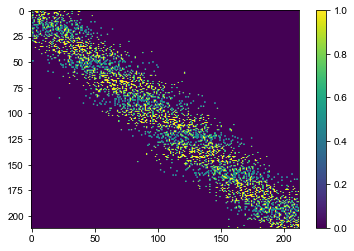

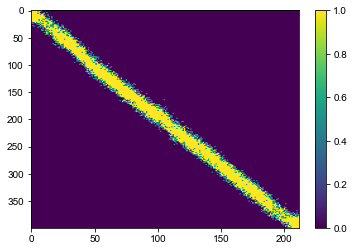

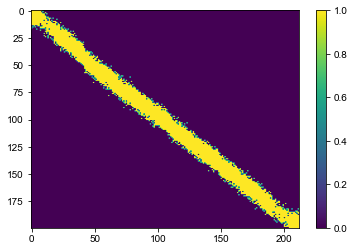

In [6]:
place_information = {'place ids': [0], 'place fracs': [0.80]}

#diagram = WiringDiagram('params/circuitparams_ripple_72522.yaml', place_information)
diagram = WiringDiagram(os.path.join(params_path, 'circuitparams_ripple.yaml'), place_information)

diagram.generate_internal_connectivity()

external_kwargs = {}
external_kwargs['place information'] = diagram.place_information
external_kwargs['external place ids'] = [100, 101, 102]
external_kwargs['cue information'] = diagram.place_information
external_kwargs['external cue ids'] = [100, 101, 102]

diagram.generate_external_connectivity(ar.cell_information, **external_kwargs)
diagram.generate_septal_connectivity()

place_ids = diagram.place_information[0]['place']

plt.figure()
plt.imshow(diagram.internal_adj_matrices[0][0][place_ids,:][:,place_ids], aspect='auto')
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(diagram.external_adj_matrices[100][0][:,place_ids], aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(diagram.external_adj_matrices[101][0][:,place_ids], aspect='auto')
plt.colorbar()
plt.show()



In [7]:
def pull_spike_times(population2info_dict):
    spike_times = []
    gids = np.sort(list(population2info_dict.keys()))
    for gid in gids:
        spike_times.append(population2info_dict[gid]['spike times'])
    return spike_times

mf_spike_times  = pull_spike_times(ar.cell_information['MF']['cell info'])
mec_spike_times = pull_spike_times(ar.cell_information['MEC']['cell info'])
lec_spike_times = pull_spike_times(ar.cell_information['LEC']['cell info'])
bk_spike_times  = pull_spike_times(ar.cell_information['Background']['cell info'])

In [6]:

circuit = Circuit(params_prefix=params_path,
                  params_filename='circuitparams_ripple.yaml', 
                  arena_params_filename='arenaparams_ripple.yaml',
                  internal_pop2id=diagram.pop2id, 
                  external_pop2id=diagram.external_pop2id,
                  external_spike_times = {100: mf_spike_times,
                                          101: mec_spike_times,
                                          102: lec_spike_times,
                                          103: bk_spike_times})
circuit.build_cells()
circuit.build_internal_netcons(diagram.internal_adj_matrices, diagram.internal_ws)
circuit.build_external_netcons(100, diagram.external_adj_matrices[100], diagram.external_ws[100])
circuit.build_external_netcons(101, diagram.external_adj_matrices[101], diagram.external_ws[101])
circuit.build_external_netcons(102, diagram.external_adj_matrices[102], diagram.external_ws[102])
circuit.build_external_netcons(103, diagram.external_adj_matrices[103], diagram.external_ws[103])
#circuit.record_lfp([0,1])
#circuit.build_septal_netcons(diagram.septal_adj_matrices)

186


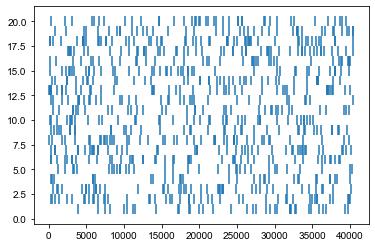

In [8]:
cue_cells = diagram.place_information[0]['not place']
place_cells = diagram.place_information[0]['place']

ctype_offset = diagram.external_information['Background']['ctype offset']
for z in place_cells[150:151]:
    print(z)

    plt.figure()
    i = 0
    src_ids = np.nonzero(diagram.external_adj_matrices[103][0][z])[0]

    for src_id in src_ids:
        src_gid = src_id + ctype_offset
        src_gid_spikes = bk_spike_times[src_gid]
        plt.vlines(list(src_gid_spikes), i+0.5, i+1.5)
        i += 1
 #   plt.xlim([0,7500])
 

52
55


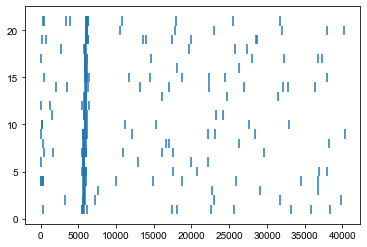

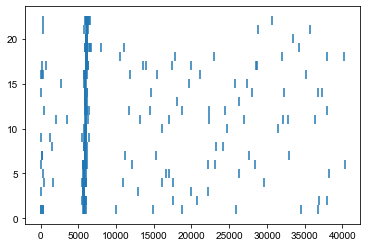

In [9]:
cue_cells = diagram.place_information[0]['not place']
ctype_offset = diagram.external_information['MF']['ctype offset']
for z in cue_cells[12:14]:
    print(z)

    plt.figure()
    i = 0
    src_ids = np.nonzero(diagram.external_adj_matrices[100][0][z])[0]

    for src_id in src_ids:
        src_gid = src_id + ctype_offset
        src_gid_spikes = mf_spike_times[src_gid]
        plt.vlines(list(src_gid_spikes), i+0.5, i+1.5)
        i += 1
 #   plt.xlim([0,7500])
 

2
3


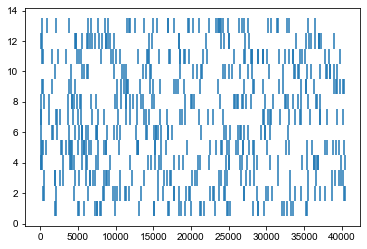

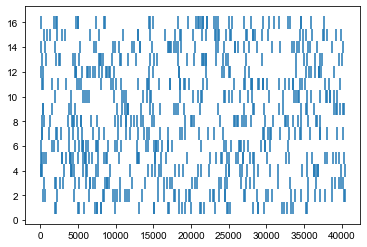

In [10]:
cue_cells = diagram.place_information[0]['not place']
ctype_offset = diagram.external_information['MEC']['ctype offset']
for z in cue_cells[:2]:
    print(z)

    plt.figure()
    i = 0
    src_ids = np.nonzero(diagram.external_adj_matrices[101][0][z])[0]

    for src_id in src_ids:
        src_gid = src_id + ctype_offset
        src_gid_spikes = bk_spike_times[src_gid]
        plt.vlines(list(src_gid_spikes), i+0.5, i+1.5)
        i += 1
 #   plt.xlim([0,7500])
 

2
3


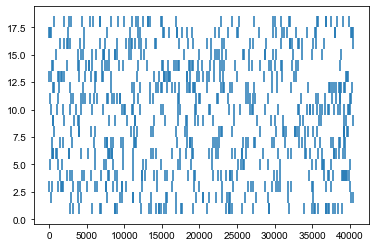

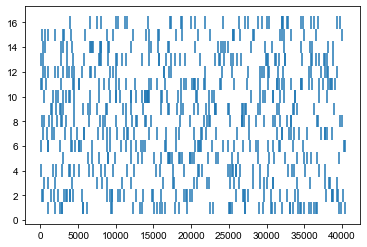

In [11]:
cue_cells = diagram.place_information[0]['not place']
ctype_offset = diagram.external_information['LEC']['ctype offset']
for z in cue_cells[:2]:
    print(z)

    plt.figure()
    i = 0
    src_ids = np.nonzero(diagram.external_adj_matrices[102][0][z])[0]

    for src_id in src_ids:
        src_gid = src_id + ctype_offset
        src_gid_spikes = bk_spike_times[src_gid]
        plt.vlines(list(src_gid_spikes), i+0.5, i+1.5)
        i += 1
 #   plt.xlim([0,7500])
 

In [ ]:
pvbc = circuit.neurons[1][260]

icl  = h.IClamp(pvbc.soma(0.5))
icl.delay = 50
icl.dur = 100
icl.amp = 0.750

t_vec = h.Vector()
bs_v_vec  = h.Vector()
bs_v_vec.record(pvbc.soma(0.5)._ref_v)
t_vec.record(h._ref_t)


h.dt = 1.0
h.tstop =  300
h.finitialize(-65.0)
h.fadvance()
h.continuerun(h.tstop)


fig = plt.figure(figsize=(4,1), dpi=300)
ax = fig.gca()
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(8)    
    
ax.plot(t_vec, bs_v_vec, color=(224/255.,127/255.,128/255.))
plt.show()



In [11]:

def restore_weights(diagram, file_path):
    pop_weights_dict = defaultdict(lambda: dict())
    saved_weights = { int(k): v for k,v in np.load(file_path).items() }
    for pop in diagram.wiring_information.keys():
        pop_id = diagram.pop2id[pop]
        ctype_offset = diagram.wiring_information[pop]['ctype offset']
        ncells = diagram.wiring_information[pop]['ncells']
        for gid in range(ctype_offset, ctype_offset+ncells):
            if gid in saved_weights:
                src_gids = saved_weights[gid]['src_gids']
                src_gid_weights = saved_weights[gid]['weights']
                src_gid_weights_upd = saved_weights[gid]['weights_upd']
                src_gid_dict = defaultdict(list)
                for src_pop in diagram.wiring_information.keys():
                    src_pop_id = diagram.pop2id[src_pop]
                    this_src_gid_idxs = np.argwhere(np.logical_and(src_gids >= ctype_offset,
                                                                   src_gids <= ctype_offset + ncells))[:,0]
                    
                    src_gid_dict[src_pop_id] = (src_gids[this_src_gid_idxs],
                                                src_gid_weights[this_src_gid_idxs],
                                                src_gid_weights_upd[this_src_gid_idxs])
                for src_pop in diagram.external_information.keys():
                    src_pop_id = diagram.external_pop2id[src_pop]
                    this_src_gid_idxs = np.argwhere(np.logical_and(src_gids >= ctype_offset,
                                                                   src_gids <= ctype_offset + ncells))[:,0]
                    src_gid_dict[src_pop_id] = (src_gids[this_src_gid_idxs],
                                                src_gid_weights[this_src_gid_idxs],
                                                src_gid_weights_upd[this_src_gid_idxs])
                pop_weights_dict[pop_id][gid] = dict(src_gid_dict)
    return dict(pop_weights_dict)

In [15]:
def saved_weight_change(weights_dict, src_id, dst_id, valid_gids=None):
    
    weight_before, weight_after = [], []

    this_weights_dict = weights_dict[dst_id]
    for dst_gid in this_weights_dict.keys():
        if valid_gids is not None and dst_gid not in valid_gids:
            continue
        if src_id not in this_weights_dict[dst_gid]: 
            continue
        src_gids, connection_weights, connection_weights_upd = this_weights_dict[dst_gid][src_id]
        has_updated_weights = np.sum(connection_weights_upd) > 0.
        for i, src_gid in enumerate(src_gids):
            if has_updated_weights:
                weight_before.append(connection_weights[i])
                weight_after.append(connection_weights_upd[i])
            else:
                weight_before.append(connection_weights[i])
                weight_after.append(connection_weights[i])
        
    pchange = []
    for (b,a) in zip(weight_before, weight_after):
        pchange.append((a-b)/(b+1.0e-9))
        
    return weight_before, weight_after, pchange


In [12]:
# this assumes plasticity is off

#model_filepath =  'models/48-trained-cue-on-inhplas-off-lecplas-off-15iter.npz' # no inh plasticity
#model_filepath =  'models/48-trained-cue-on-inhplas-ie-lecplas-off-20iter.npz' # inh plasticity
#model_filepath =  'models/48-trained-cue-on-inhplas-ei-lecplas-off-15iter.npz' # bad inh plasticity

# best ee ie: 'models/72722-cue-ee-ie-nlaps-15-dt-zerodot1-scale-2-v1.npz'
# best ee: 'models/9622-cue-ee-nlaps-15-dt-zerodot1-scale-2-v4.npz'
# best ee ei: 'models/9622-cue-ee-ei-nlaps-15-dt-zerodot1-scale-2-v1.npz'

model_filepath = 'models/72722-cue-ee-ie-nlaps-15-dt-zerodot1-scale-2-v1.npz'
weights_filepath = '../params/0801-cue-ee-ei-nlaps-8-dt-zerodot1-scale-2-v1.npz'


#79-V1 is best so far
saved_weights = restore_weights(diagram, weights_filepath)



13351


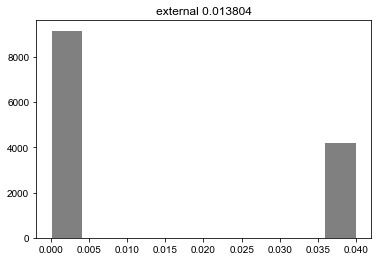

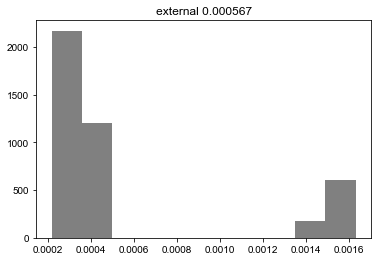

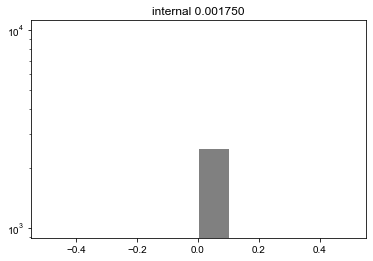

In [16]:
from analysis_utils import external_weight_change, internal_weight_change


external_before, external_after, external_pchange = saved_weight_change(saved_weights, 100, 0)
print(len(external_before))

plt.figure()
plt.hist([external_before], color=['gray'])
plt.title('external %f' % (np.mean(external_before)))
plt.show()


#

external_before, external_after, external_pchange = external_weight_change(circuit, 102, 0)

plt.figure()
plt.hist([external_before], color=['gray'])
plt.title('external %f' % (np.mean(external_before)))
plt.show()


#

internal_before, internal_after, internal_pchange = internal_weight_change(circuit, 0, 0, valid_gids=np.arange(130))


plt.figure()
plt.hist([internal_before], color=['gray'])
plt.title('internal %f' % (np.mean(internal_before)))
plt.yscale('log')
plt.show()


5200
place median 0.0005
nonplace median 0.0005
place mean 0.0005
nonplace mean 0.0005000000000000002
-65.10275901042313 0.0
mwu 2035200.0 1.0


/tmp/ipykernel_2996558/2236733975.py:41: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(pvbc_to_place_weights, pvbc_to_notplace_weights)


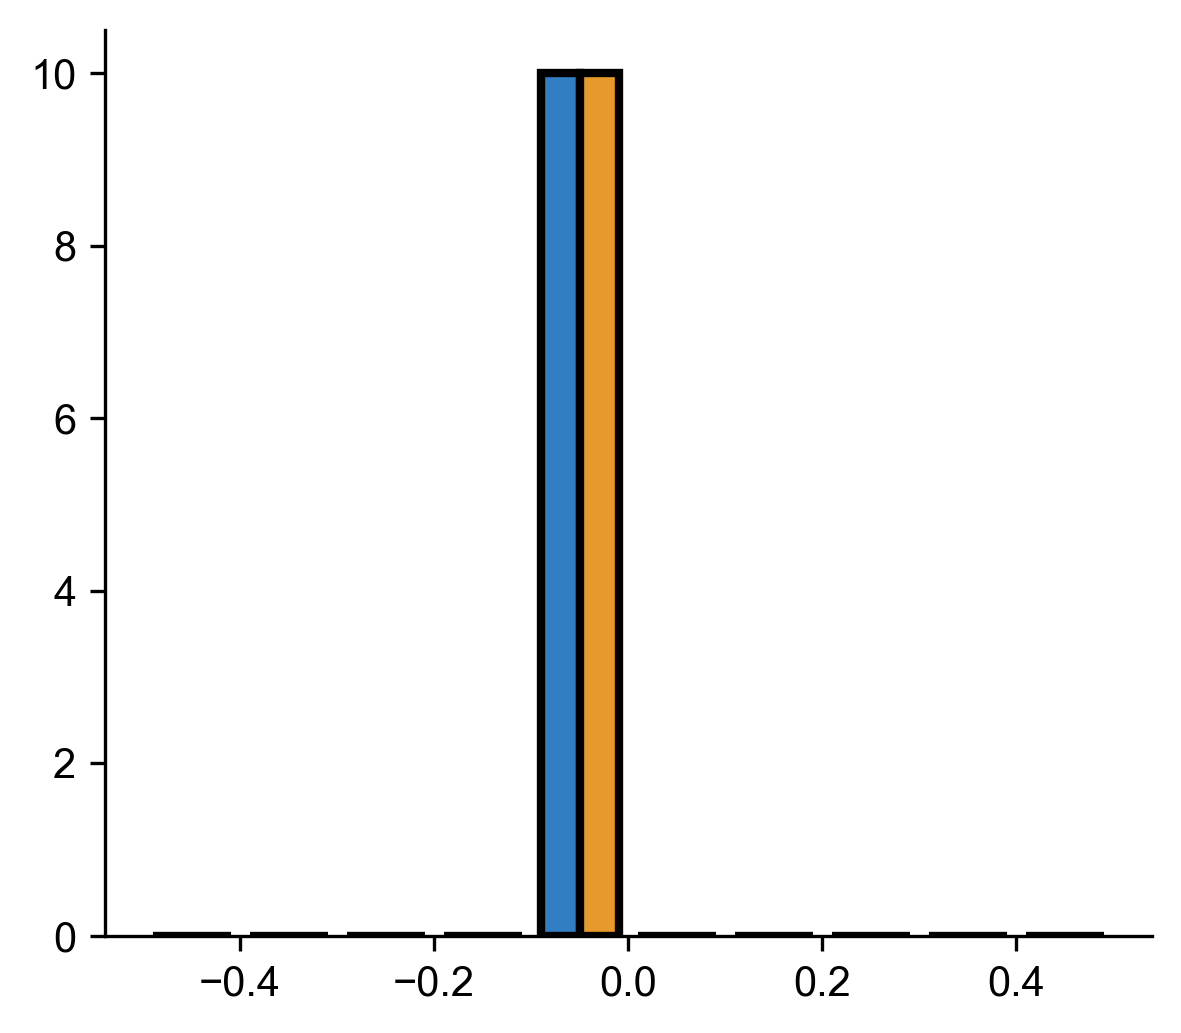

In [17]:
place_cells = diagram.place_information[0]['place']
non_place_cells = diagram.place_information[0]['not place']
scale = 2

pvbc_to_place_weights = []
for pgid in place_cells:
    cell_info = circuit.neurons[0][pgid].internal_netcons
    for (presynaptic_gid, nc, _) in cell_info:
        if presynaptic_gid >= 130*scale and presynaptic_gid < 145*scale:
            weight = nc[0].weight[0] #+ nc[0].weight[1]
            pvbc_to_place_weights.append(weight)

pvbc_to_notplace_weights = []
for pgid in non_place_cells:
    cell_info = circuit.neurons[0][pgid].internal_netcons
    for (presynaptic_gid, nc, _) in cell_info:
        if presynaptic_gid >= 130*scale and presynaptic_gid < 145*scale:
            weight = nc[0].weight[0] #+ nc[0].weight[1]
            pvbc_to_notplace_weights.append(weight)      
        

print(len(pvbc_to_place_weights) + len(pvbc_to_notplace_weights))
        
        
fig = plt.figure(dpi=300, figsize=(4.5, 4.0))
ax = fig.gca()
plt.hist([pvbc_to_place_weights, pvbc_to_notplace_weights], color=[(49/255.,126/255.,194/255.), (231/255.,135/225.,43/255.)], 
         density=True, edgecolor='k', linewidth=2.0)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)

    
print('place median', np.median(pvbc_to_place_weights))
print('nonplace median', np.median(pvbc_to_notplace_weights))

 
print('place mean', np.mean(pvbc_to_place_weights))
print('nonplace mean', np.mean(pvbc_to_notplace_weights))

from scipy.stats import ttest_ind, mannwhitneyu
t, p = ttest_ind(pvbc_to_place_weights, pvbc_to_notplace_weights)
print(t, p)

u, pmw = mannwhitneyu(pvbc_to_place_weights, pvbc_to_notplace_weights, alternative='less')
print('mwu', u, pmw)


In [ ]:
import time

h.load_file("stdrun.hoc")

def get_population_voltages(c,pop_id):
    v_vecs = []
    for i in range(len(c.neurons[pop_id])):
        v_vec = h.Vector()
        try:
            v_vec.record(c.neurons[pop_id][i].axon(0.5)._ref_v)
        except:
            v_vec.record(c.neurons[pop_id][i].soma(0.5)._ref_v)
        v_vecs.append(v_vec)
    return v_vecs

exc_v_vecs    = get_population_voltages(circuit, 0)
pvbc_v_vecs    = get_population_voltages(circuit, 1)

# aac_v_vecs   = get_population_voltages(2)
# bis_v_vecs   = get_population_voltages(3)
# olm_v_vecs   = get_population_voltages(4)
# isccr_v_vecs = get_population_voltages(5)
# iscck_v_vecs = get_population_voltages(6)

print('starting simulation..')
    
t_vec = h.Vector()  # Time stamp vector
t_vec.record(h._ref_t)

tic = time.time()

h.celsius = 37.
h.dt = 0.1
h.tstop =  time_for_single_lap * 6. + 500

pc = circuit.pc

pc.set_maxstep(10)

t = h.Vector().record(h._ref_t)
h.finitialize(-65)
pc.psolve(h.tstop)

elapsed = time.time() - tic
print('that took %0.3f seconds' % elapsed)

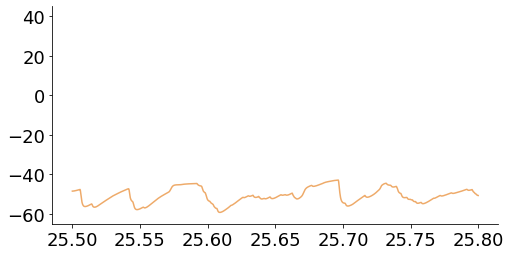

In [12]:
t_vec = np.asarray(t_vec)
s = np.where(t_vec > 25000+500)[0][0]
e = np.where(t_vec < 25300+500)[0][-1]

fig = plt.figure(figsize=(8,4))
ax  = fig.gca()
plt.plot(np.divide(t_vec[s:e], 1000.), np.asarray(exc_v_vecs).T[s:e, diagram.place_information[0]['not place'][43]], 
         color=(231/255.,135/255.,43/255.), alpha=0.7)
plt.ylim([-65, 45])
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)


In [12]:
exc_v_vecs = { int(k): v for k,v in np.load("../data/v_vecs_1001-ripple-nlaps-3.npz").items() }
dt = 0.025
t_end = exc_v_vecs[0].shape[0] * dt
t_vec = np.arange(0., t_end, dt)

[]

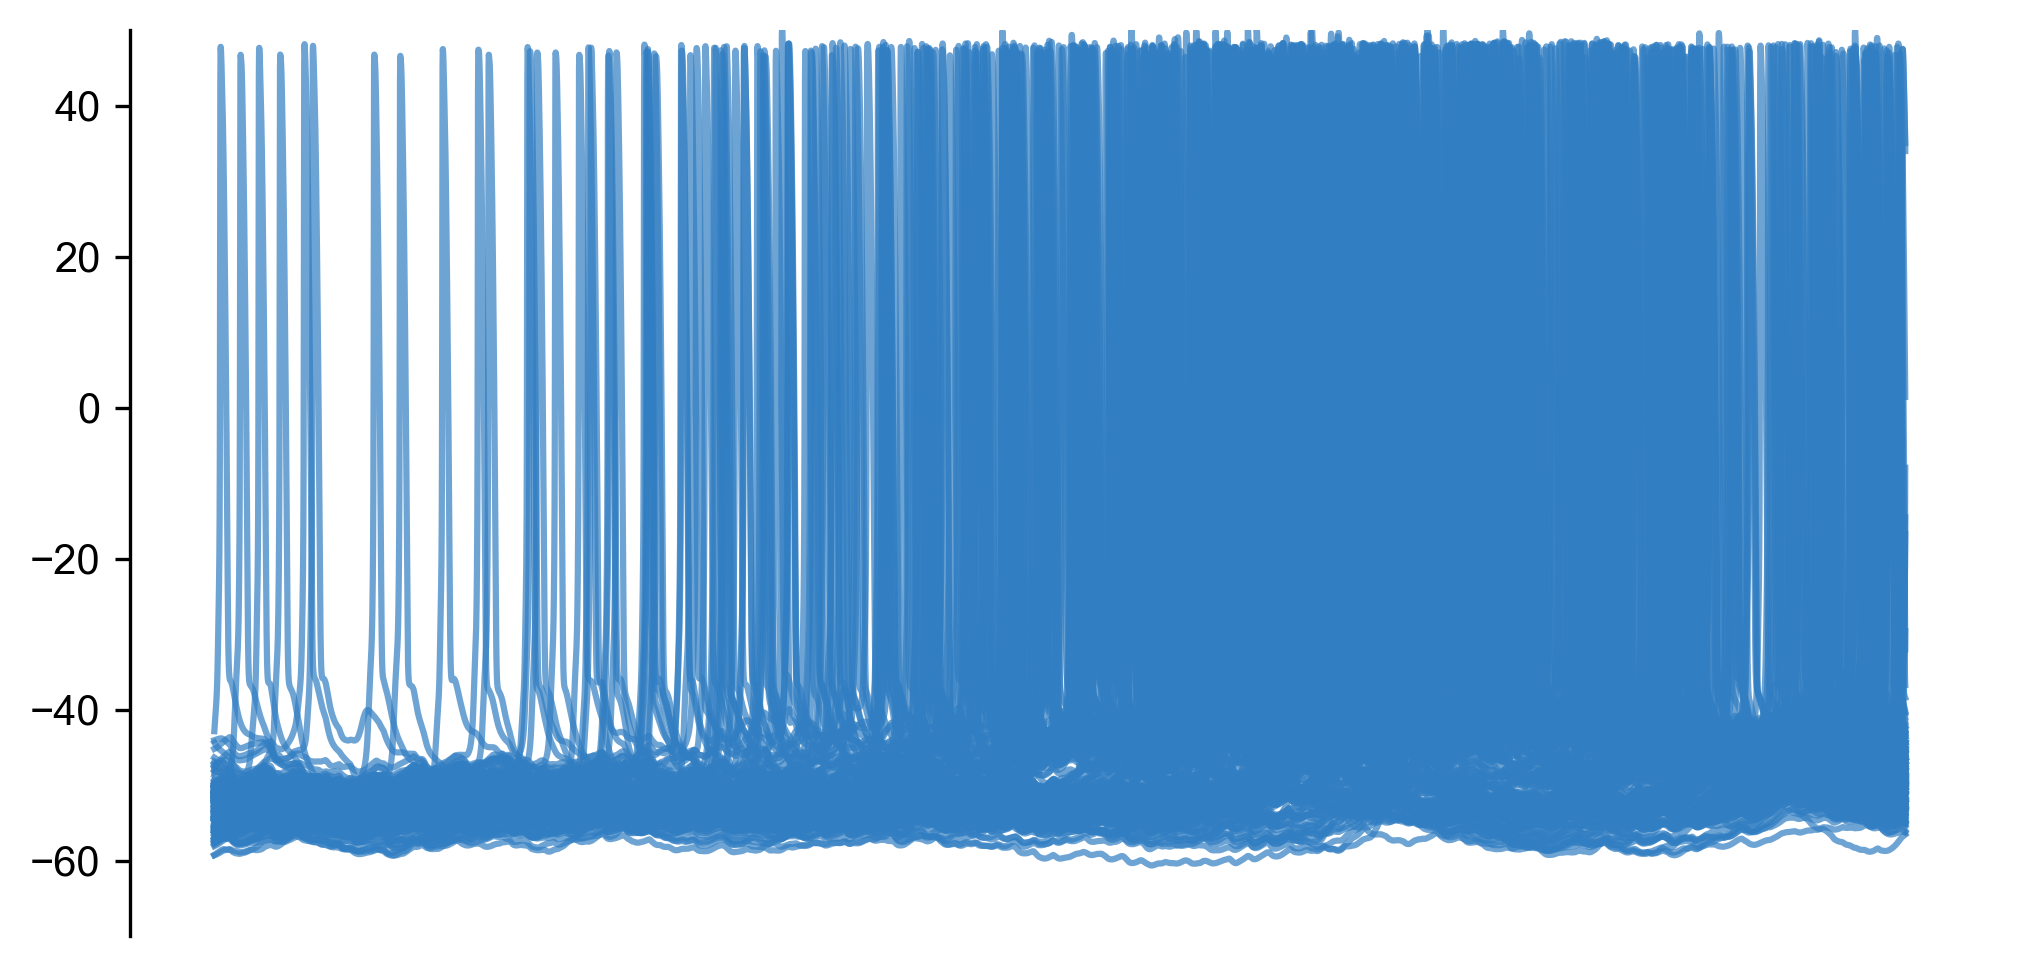

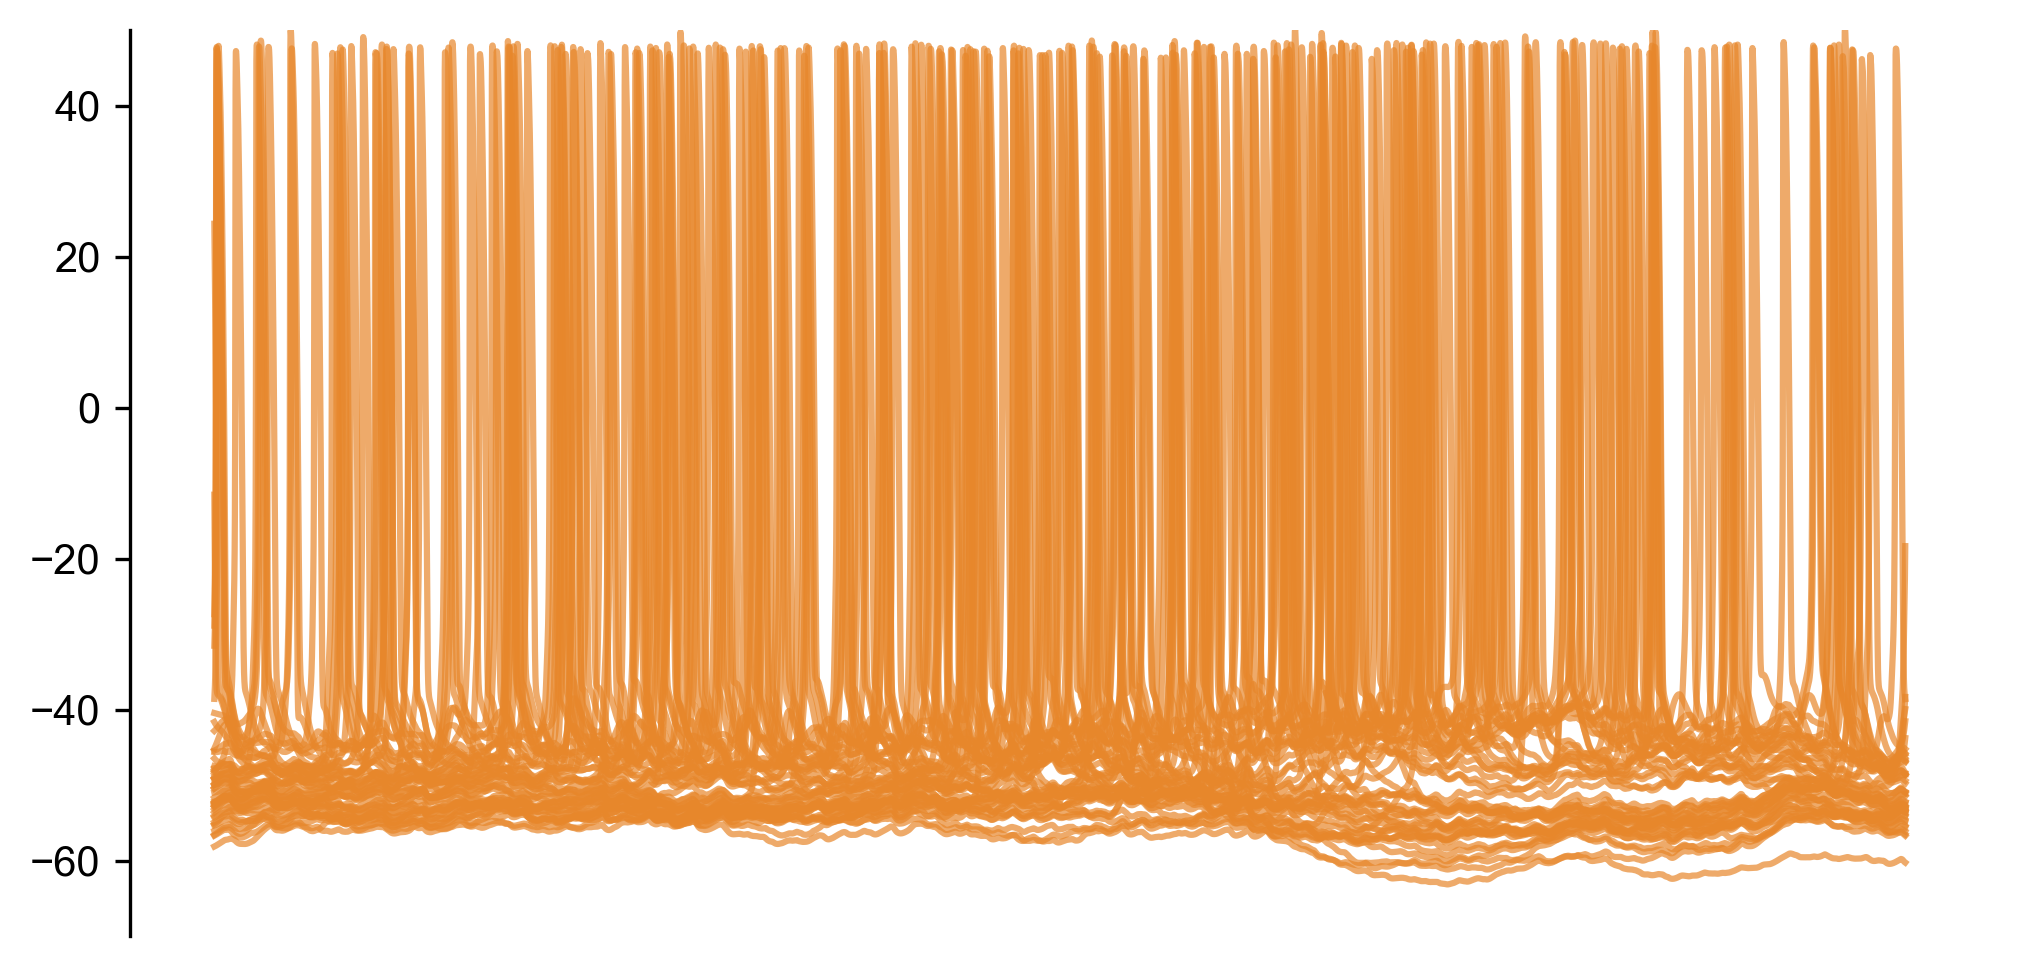

In [13]:
from analysis_utils import butter_bandpass_filter
from scipy.signal import welch, spectrogram
from copy import deepcopy


s = np.where(t_vec > 12015+500)[0][0]
e = np.where(t_vec < 12375+500)[0][-1]

#s = np.where(t_vec > 500)[0][0]
#e = np.where(t_vec < 15000+500)[0][-1]

place_gids = list(sorted(diagram.place_information[0]['place']))

place_exc_v_vecs_array = np.vstack([exc_v_vecs[gid][s:e] for gid in place_gids[50:]]).T

fig = plt.figure(dpi=300,figsize=(8,4))
ax  = fig.gca()
plt.plot(np.divide(t_vec[s:e], 1000.),
         place_exc_v_vecs_array,
         color=(49/255.,126/255.,194/255.), alpha=0.7)
plt.ylim([-70, 50])
for axis in ['top','right', 'bottom']:
    ax.spines[axis].set_linewidth(0.0)
ax.set_xticks([])
    
    
cue_lst = deepcopy(diagram.place_information[0]['not place'])
cue_lst.pop(43)

cue_exc_v_vecs_array = np.vstack([exc_v_vecs[gid][s:e] for gid in cue_lst]).T

fig = plt.figure(dpi=300,figsize=(8,4))
ax  = fig.gca()
plt.plot(np.divide(t_vec[s:e], 1000.), 
         np.vstack([exc_v_vecs[gid][s:e] for gid in cue_lst]).T,
         color=(231/255.,135/255.,43/255.), alpha=0.7)
plt.ylim([-70, 50])
for axis in ['top','right', 'bottom']:
    ax.spines[axis].set_linewidth(0.0)
ax.set_xticks([])

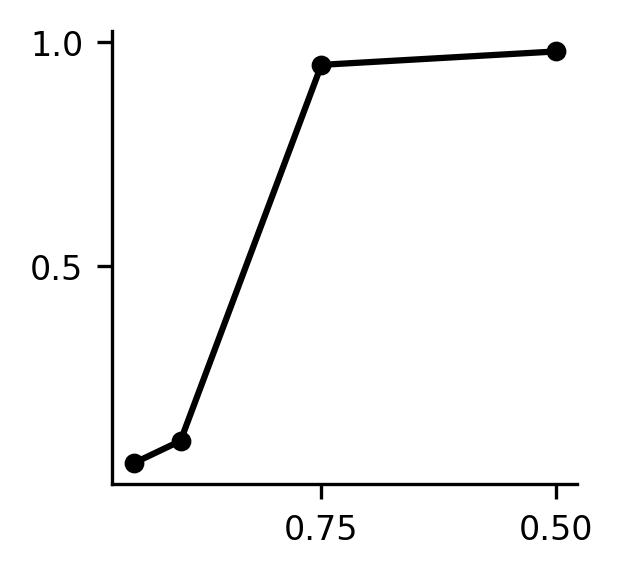

In [295]:
fig = plt.figure(dpi=300,figsize=(2,2))
ax = fig.gca()
ax.invert_xaxis()
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(8)    

plt.plot([0.95, 0.90, 0.75, 0.50], [0.06, 0.11, 0.95, 0.98],  marker='.', markersize=7.5, color='k')


/mnt/d/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


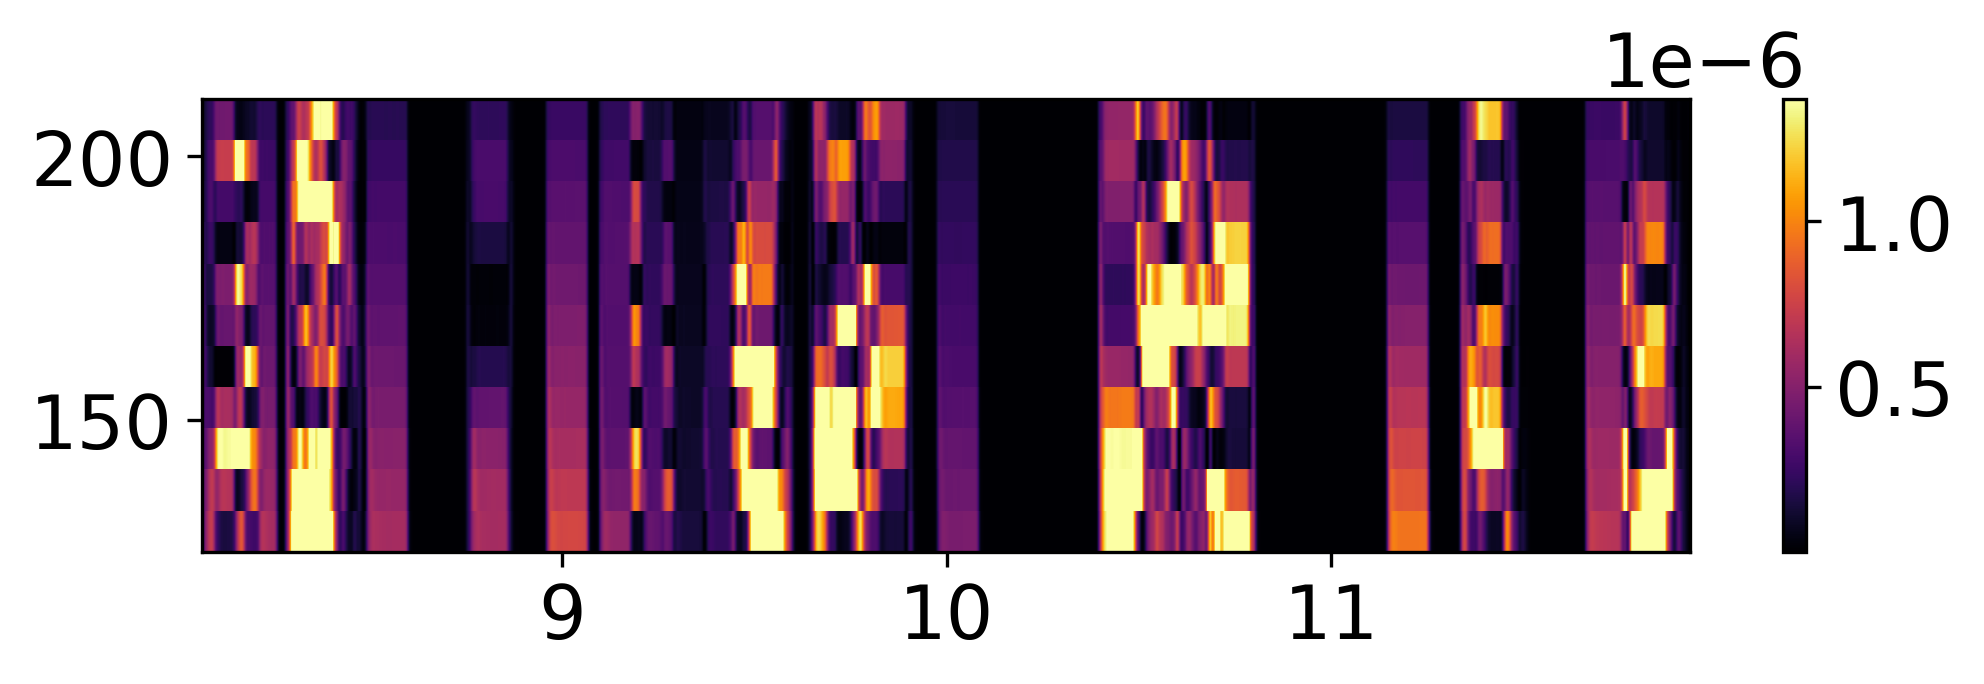

In [151]:

lfp = circuit.lfp
lfp_np = np.asarray([np.asarray(l, dtype='float32') for l in lfp], dtype='float32')
lfp_mean = lfp_np.mean(axis=0)
lfp_filtered = butter_bandpass_filter(lfp_mean, 100.0, 220.0, 2000., order=3)



start = np.where(np.asarray(t_vec) > 8000+500)[0][0]
end   = np.where(np.asarray(t_vec) < 12000+500)[0][-1]

ns = 256
lfp_f, lfp_t, lfp_S = spectrogram(lfp_filtered[start:end], fs=2000., nfft=ns, nperseg=ns, noverlap=ns-1)
lfp_t += 8.0
fs, fe = np.where(lfp_f >= 120.0)[0][0], np.where(lfp_f <= 220)[0][-1]
lfp_S_reduced = lfp_S[fs:fe,:]
minn = np.percentile(lfp_S_reduced, 5.)
maxx = np.percentile(lfp_S_reduced, 95.)

plt.figure(dpi=300, figsize=(8,2))
plt.pcolormesh(lfp_t, lfp_f[fs:fe], lfp_S_reduced, vmin=minn, vmax=maxx, cmap='inferno')
plt.colorbar()
#plt.xticks([])
plt.show()


398


(-19.85, 416.85, -0.05214949444992256, 0.051085510255522826)

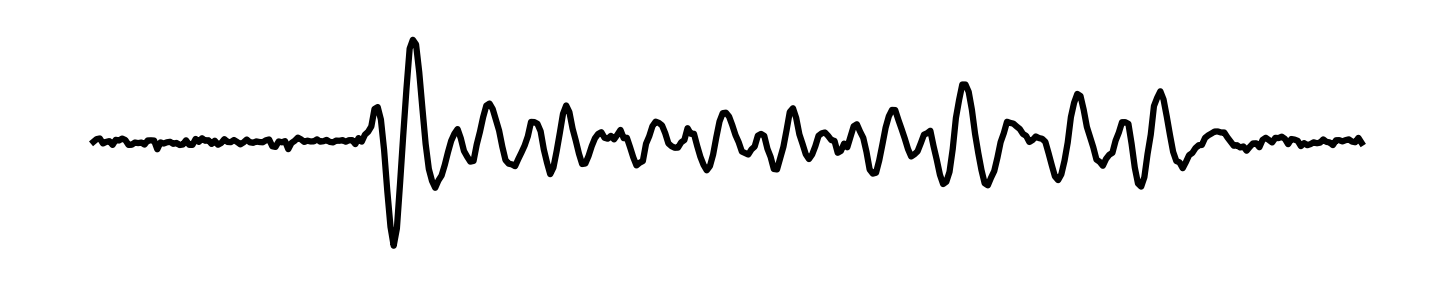

In [153]:

start = np.where(np.asarray(t_vec) > 10500+500)[0][0]
end   = np.where(np.asarray(t_vec) < 10700+500)[0][-1]
noise_add = np.random.normal(0,1.0e-3,size=end-start)
print(len(noise_add))
fig = plt.figure(figsize=(6,1.0), dpi=300)
ax  = fig.gca()
plt.plot(lfp_filtered[start:end] + noise_add, color='k')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)
plt.axis('off')

9998


(-499.85, 10496.85, -0.05956965174547215, 0.0651948383287005)

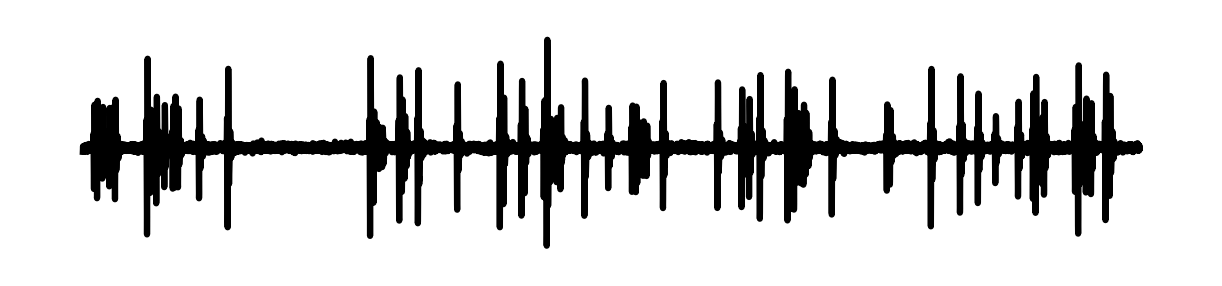

In [61]:

start = np.where(np.asarray(t_vec) > 5000+500)[0][0]
end   = np.where(np.asarray(t_vec) < 10000+500)[0][-1]
noise_add = np.random.normal(0,1.0e-3,size=end-start)
print(len(noise_add))
fig = plt.figure(figsize=(5,1.0), dpi=300)
ax  = fig.gca()
plt.plot(lfp_filtered[start:end] + noise_add, color='k')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)
plt.axis('off')

place-cue corr PearsonRResult(statistic=0.9761210919920212, pvalue=8.005702776188262e-45)
place-pvbc corr PearsonRResult(statistic=0.9781914817282374, pvalue=4.336788621995354e-46)
pvbc-cue corr PearsonRResult(statistic=0.9784791250794371, pvalue=2.8293982118878814e-46)


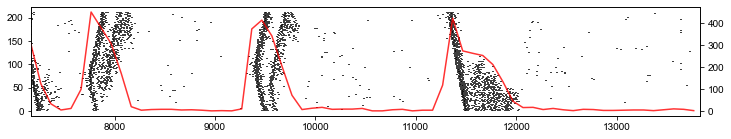

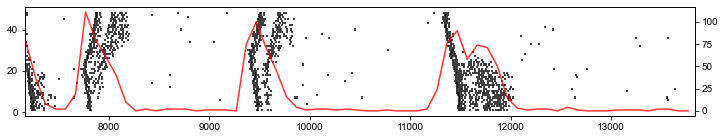

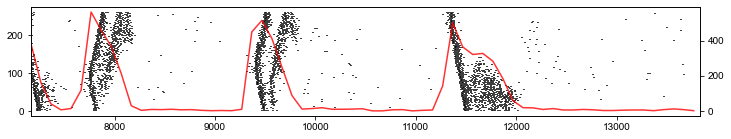

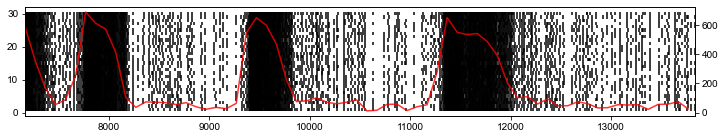

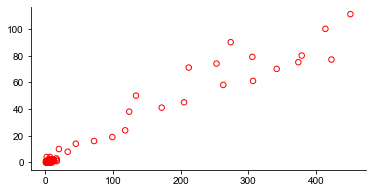

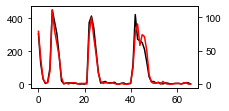

r,p 0.814260861377021 5.332317570350143e-17 67


In [34]:
def plot_spikes(spike_times, title, start, finish, gids=None, color='k'):
    
    if gids is not None:
        temp_spike_times = []
        for i in range(len(spike_times)):
            if i in gids:
                temp_spike_times.append(spike_times[i])
        spike_times = temp_spike_times
        
    frs = []
    fig, ax = plt.subplots(figsize=(12,2))
    for (i,sts) in enumerate(spike_times):
        sts = np.asarray(sts)
        ax.vlines(np.asarray(sts), i+0.5, i+1.5, color=color)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)
    ax.set_xlim([start, finish])
    #ax.set_title('%s fr: %0.3f' % (title, np.mean(frs)))
    
    ax2 = ax.twinx()
    
    tick = start
    # jump
    jump = 100 #100ms hops
    nspikes = []
    while tick < finish:
        curr_nspikes = 0
        for (i,sts) in enumerate(spike_times):
            tick_end = tick + jump
            sts = np.asarray(sts)
            sts_chop = sts[np.where( (sts>=tick) & (sts<=tick_end)) [0]]
            curr_nspikes += len(sts_chop)
        tick += jump
        nspikes.append(curr_nspikes)
    ax2.plot([start+i*jump for i in range(len(nspikes))],nspikes, color='r', alpha=0.8)
    ax2.set_xlim([start, finish])
    return nspikes

start  = time_for_single_lap * 1 + 500
finish = time_for_single_lap * 2.+ 500

nspikes_place = plot_spikes(cell_spike_times, 'PYR place', start, finish, diagram.place_information[0]['place'])
nspikes_cue   = plot_spikes(cell_spike_times, 'PYR cue', start, finish, diagram.place_information[0]['not place'])
nspikes_total = plot_spikes(cell_spike_times, 'PYR all', start, finish, np.arange(130*2))


nspikes_pvbc  = plot_spikes(cell_spike_times, 'PVBC', start, finish, gids=list(range(260,290)))
# plot_spikes(c, 2, 'AAC', start, finish)
# plot_spikes(c, 3, 'BiS', start, finish)
# plot_spikes(c, 4, 'OLM', start, finish)
# plot_spikes(c, 5, 'ISCCR', start, finish)
#plot_spikes(6, 'ISCCK', start, finish)
from scipy.stats import pearsonr, spearmanr
print('place-cue corr', pearsonr(nspikes_place, nspikes_cue))
print('place-pvbc corr', pearsonr(nspikes_place, nspikes_pvbc))
print('pvbc-cue corr', pearsonr(nspikes_pvbc, nspikes_cue))

#(6,3)
fig = plt.figure(figsize=(6,3))
ax  = fig.gca()
plt.scatter(nspikes_place, nspikes_cue, facecolor='none', edgecolor='red',s=30)
# plt.xlabel('number place cells spikes')
# plt.ylabel('number cue cells spikes')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)
plt.show()

fig, ax = plt.subplots(figsize=(3,1.5))
ax.plot(nspikes_place, color='k')
ax2 = ax.twinx()
ax2.plot(nspikes_cue, color='r')
plt.show()

from scipy.stats import pearsonr, spearmanr
r, p = spearmanr(nspikes_place, nspikes_cue)
print('r,p', r, p, len(nspikes_place))

67
(67, 2)


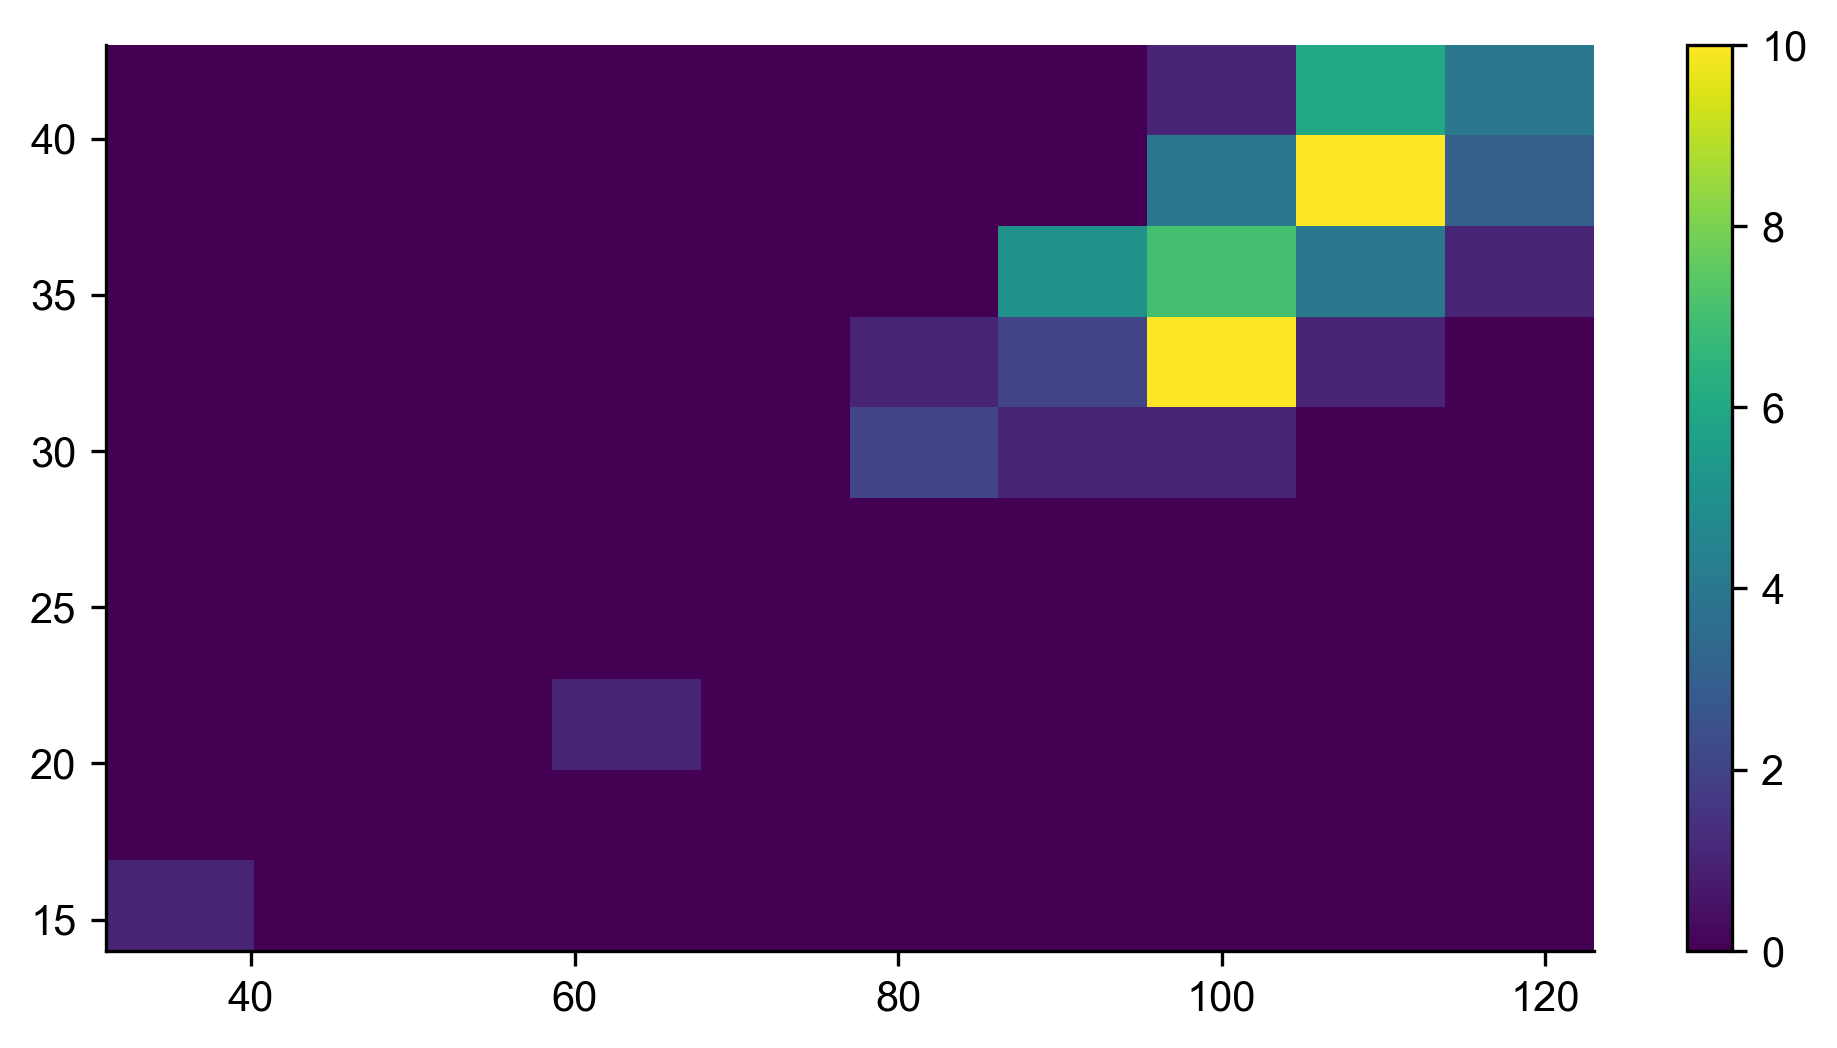

In [80]:
import seaborn as sns
import pandas as pd

#sns.kdeplot(data = df, x="x", y="y", cmap="Reds", shade=True)
#df = pd.DataFrame({'cue': np.asarray(nspikes_cue), 'place': np.asarray(nspikes_place)})

print(len(nspikes_place))
nspikes_combined = list(zip(nspikes_place, nspikes_cue))
nspikes_combined_refined = []
for (a,b) in nspikes_combined:
    if (a == 0 and b == 0): continue
    nspikes_combined_refined.append([a,b])
nspikes_combined_refined = np.asarray(nspikes_combined_refined)
print(nspikes_combined_refined.shape)

fig = plt.figure(figsize=(8,4), dpi=300)
ax  = fig.gca()
plt.hist2d(nspikes_combined_refined[:,0], nspikes_combined_refined[:,1], vmin=0, vmax=10)
plt.colorbar()
#plt.scatter(nspikes_place, nspikes_cue, facecolor='none', edgecolor='gray',s=10)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)
plt.show()




#(16,4)

# print(len(nspikes_place))
# max_place = max(nspikes_place)
# max_cue   = max(nspikes_cue)
# heatmap_matrix = np.zeros((max_place+1, max_cue+1))
# for (a,b) in list(zip(nspikes_place, nspikes_cue)):
#     if a == 0 and b == 0: continue
#     if heatmap_matrix[a,b] >= 10: continue
#     heatmap_matrix[a,b] += 1
    
# from copy import deepcopy
# cleaned_matrix = deepcopy(heatmap_matrix)
# cleaned_matrix[heatmap_matrix==0] = None
    
# fig = plt.figure(dpi=300, figsize=(14,3.0))
# plt.imshow(cleaned_matrix.T, aspect='auto', extent=(0,max_place+1,0,max_cue+1))
# plt.colorbar()
# # plt.xlabel('number place cells spikes')
# # plt.ylabel('number cue cells spikes')
# plt.show()


67
(67, 2)


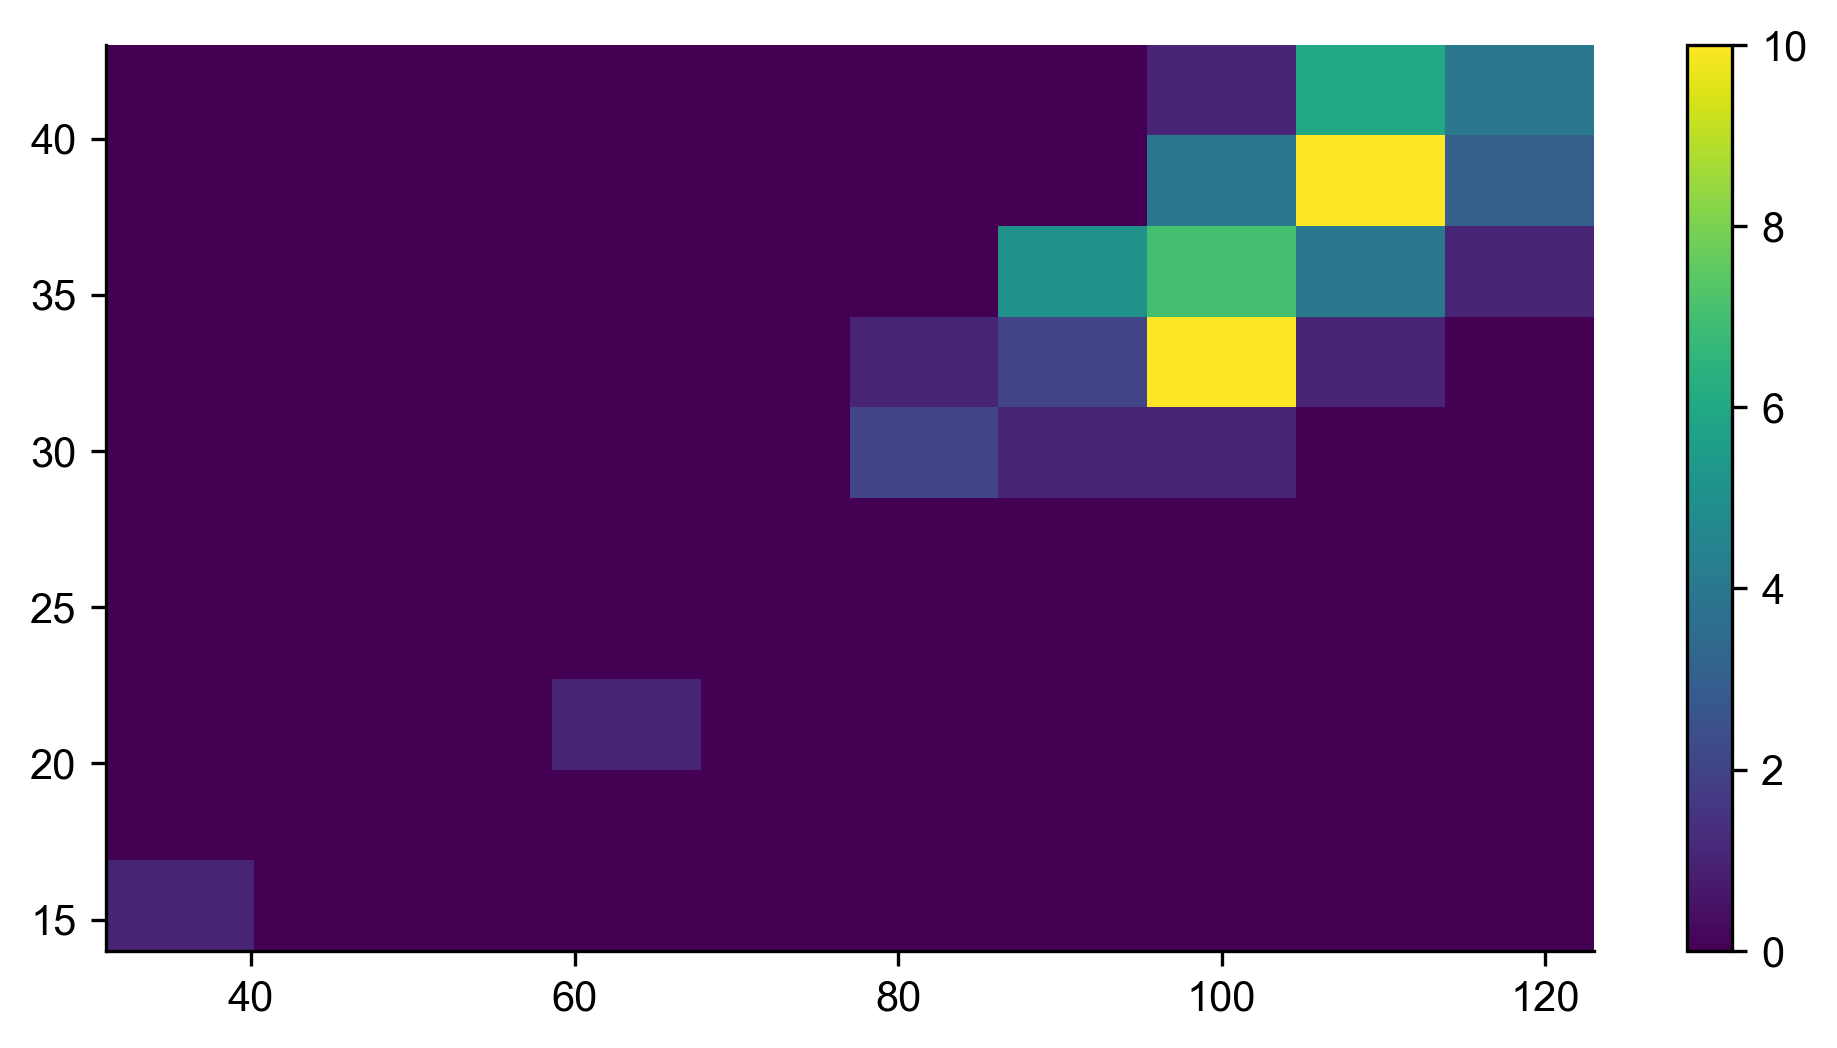

In [81]:
import seaborn as sns
import pandas as pd

#sns.kdeplot(data = df, x="x", y="y", cmap="Reds", shade=True)
#df = pd.DataFrame({'cue': np.asarray(nspikes_cue), 'place': np.asarray(nspikes_place)})

print(len(nspikes_place))
nspikes_combined = list(zip(nspikes_place, nspikes_cue))
nspikes_combined_refined = []
for (a,b) in nspikes_combined:
    if (a == 0 and b == 0): continue
    nspikes_combined_refined.append([a,b])
nspikes_combined_refined = np.asarray(nspikes_combined_refined)
print(nspikes_combined_refined.shape)

fig = plt.figure(figsize=(8,4), dpi=300)
ax  = fig.gca()
plt.hist2d(nspikes_combined_refined[:,0], nspikes_combined_refined[:,1], vmin=0, vmax=10)
plt.colorbar()
#plt.scatter(nspikes_place, nspikes_cue, facecolor='none', edgecolor='gray',s=10)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.0)
plt.show()




#(16,4)

# print(len(nspikes_place))
# max_place = max(nspikes_place)
# max_cue   = max(nspikes_cue)
# heatmap_matrix = np.zeros((max_place+1, max_cue+1))
# for (a,b) in list(zip(nspikes_place, nspikes_cue)):
#     if a == 0 and b == 0: continue
#     if heatmap_matrix[a,b] >= 10: continue
#     heatmap_matrix[a,b] += 1
    
# from copy import deepcopy
# cleaned_matrix = deepcopy(heatmap_matrix)
# cleaned_matrix[heatmap_matrix==0] = None
    
# fig = plt.figure(dpi=300, figsize=(14,3.0))
# plt.imshow(cleaned_matrix.T, aspect='auto', extent=(0,max_place+1,0,max_cue+1))
# plt.colorbar()
# # plt.xlabel('number place cells spikes')
# # plt.ylabel('number cue cells spikes')
# plt.show()


In [35]:
def plot_spikes(spike_times, title, start, finish, gids=None):
    
    frs = []
    plt.figure(figsize=(12,2))
    i = 0
    for (gid,sts) in spike_times.items():
        if (gids is not None) and (gid not in gids):
            continue
        sts = np.asarray(sts)
        plt.vlines(np.asarray(sts), i+0.5, i+1.5)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)
        i += 1
    plt.xlim([start, finish])
    plt.title('%s fr. mean: %0.3f. std: %0.3f' % (title, np.mean(frs), np.std(frs)))
    plt.show()
    return

cell_spike_times = np.load("../data/cell_spikes_1001-ripple-nlaps-3.npz")
cell_spike_times = { int(gid): v for gid, v in cell_spike_times.items() }

place_ids = diagram.place_information[0]['place']
place_colors = (49/255., 126/255., 194/255.)
cue_ids = diagram.place_information[0]['not place']
cue_colors = (231/255., 135/255., 43/255.)

kwargs = {'place ids': place_ids, 'place colors': place_colors, 'cue ids': cue_ids, 'cue colors': cue_colors} 
start = 500
finish = 8000
plot_spikes('PYR all', start, finish, np.arange(130), **kwargs)


TypeError: plot_spikes() got an unexpected keyword argument 'place ids'

[0, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 56, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 135, 136, 138, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 222, 224, 225, 227, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 251, 252, 253, 255, 256, 257, 258, 259]
[2, 3, 9, 12, 16, 22, 2

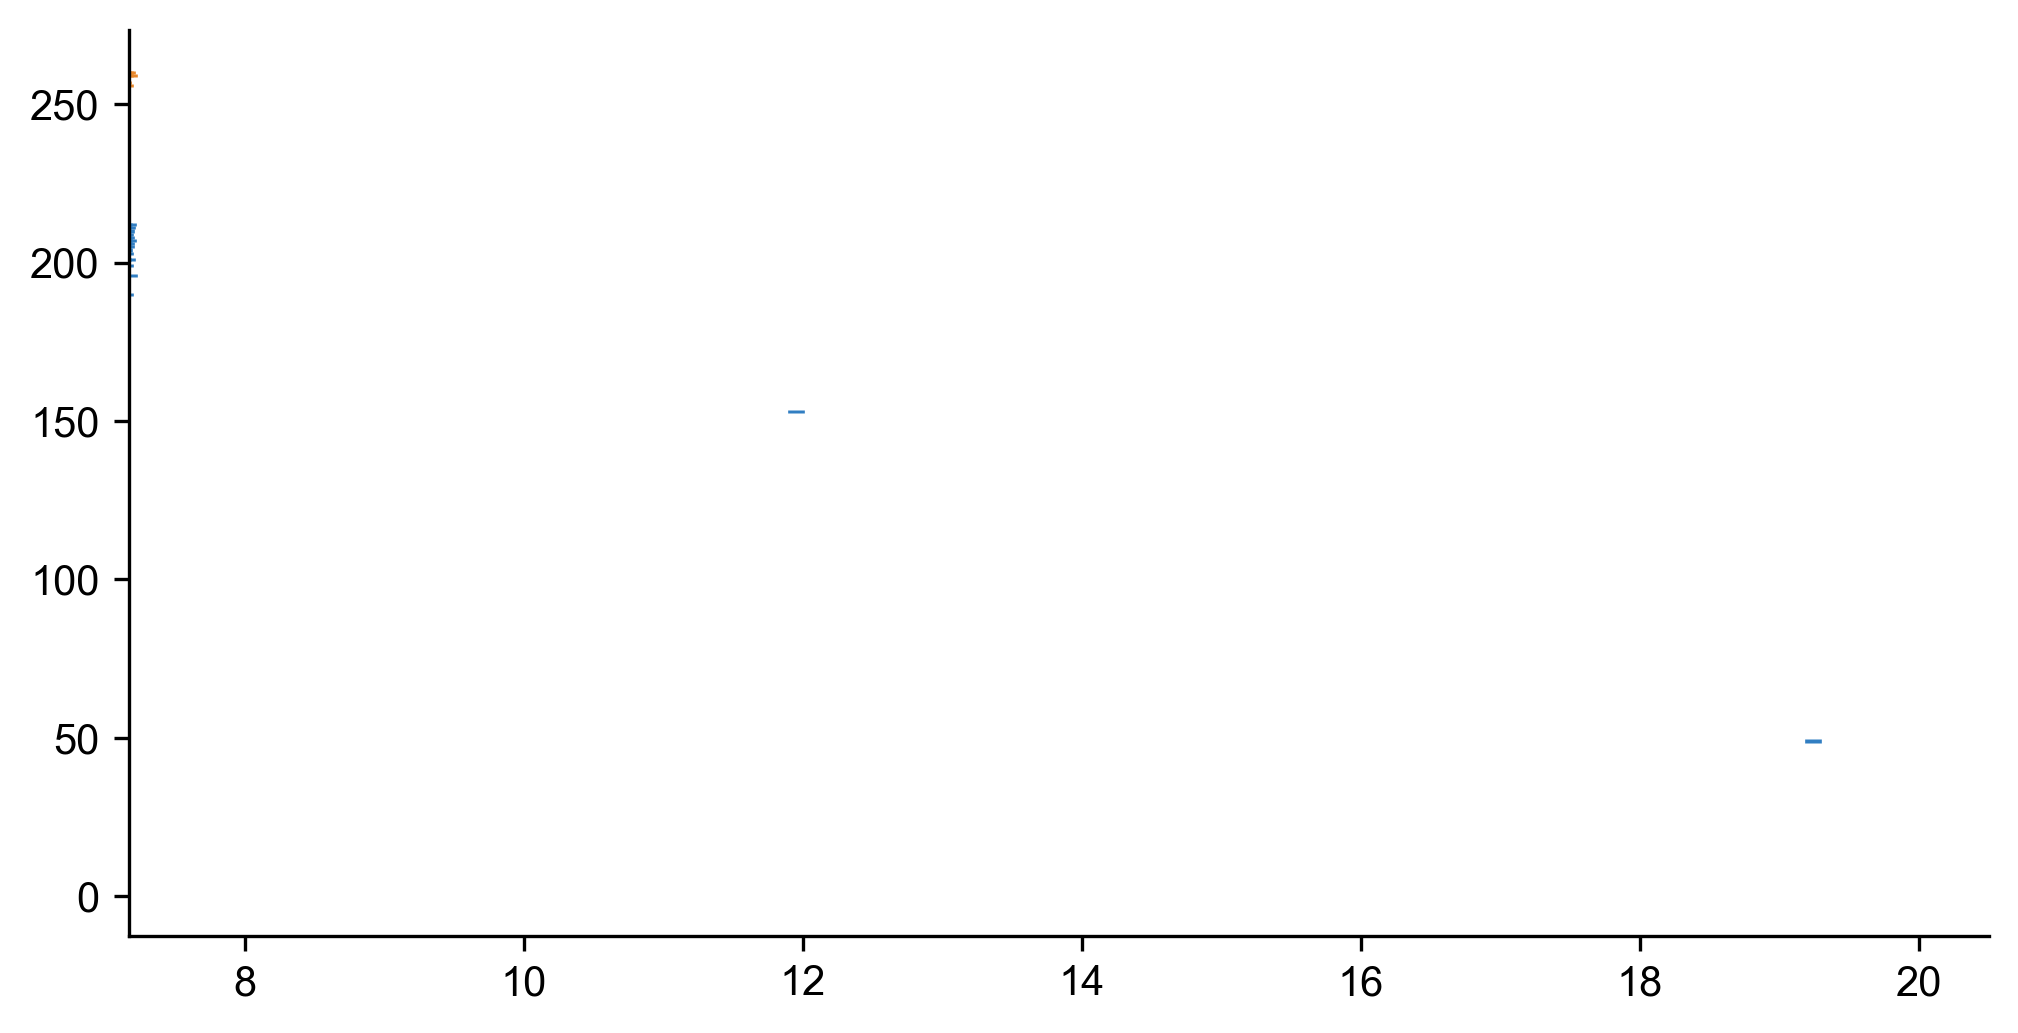

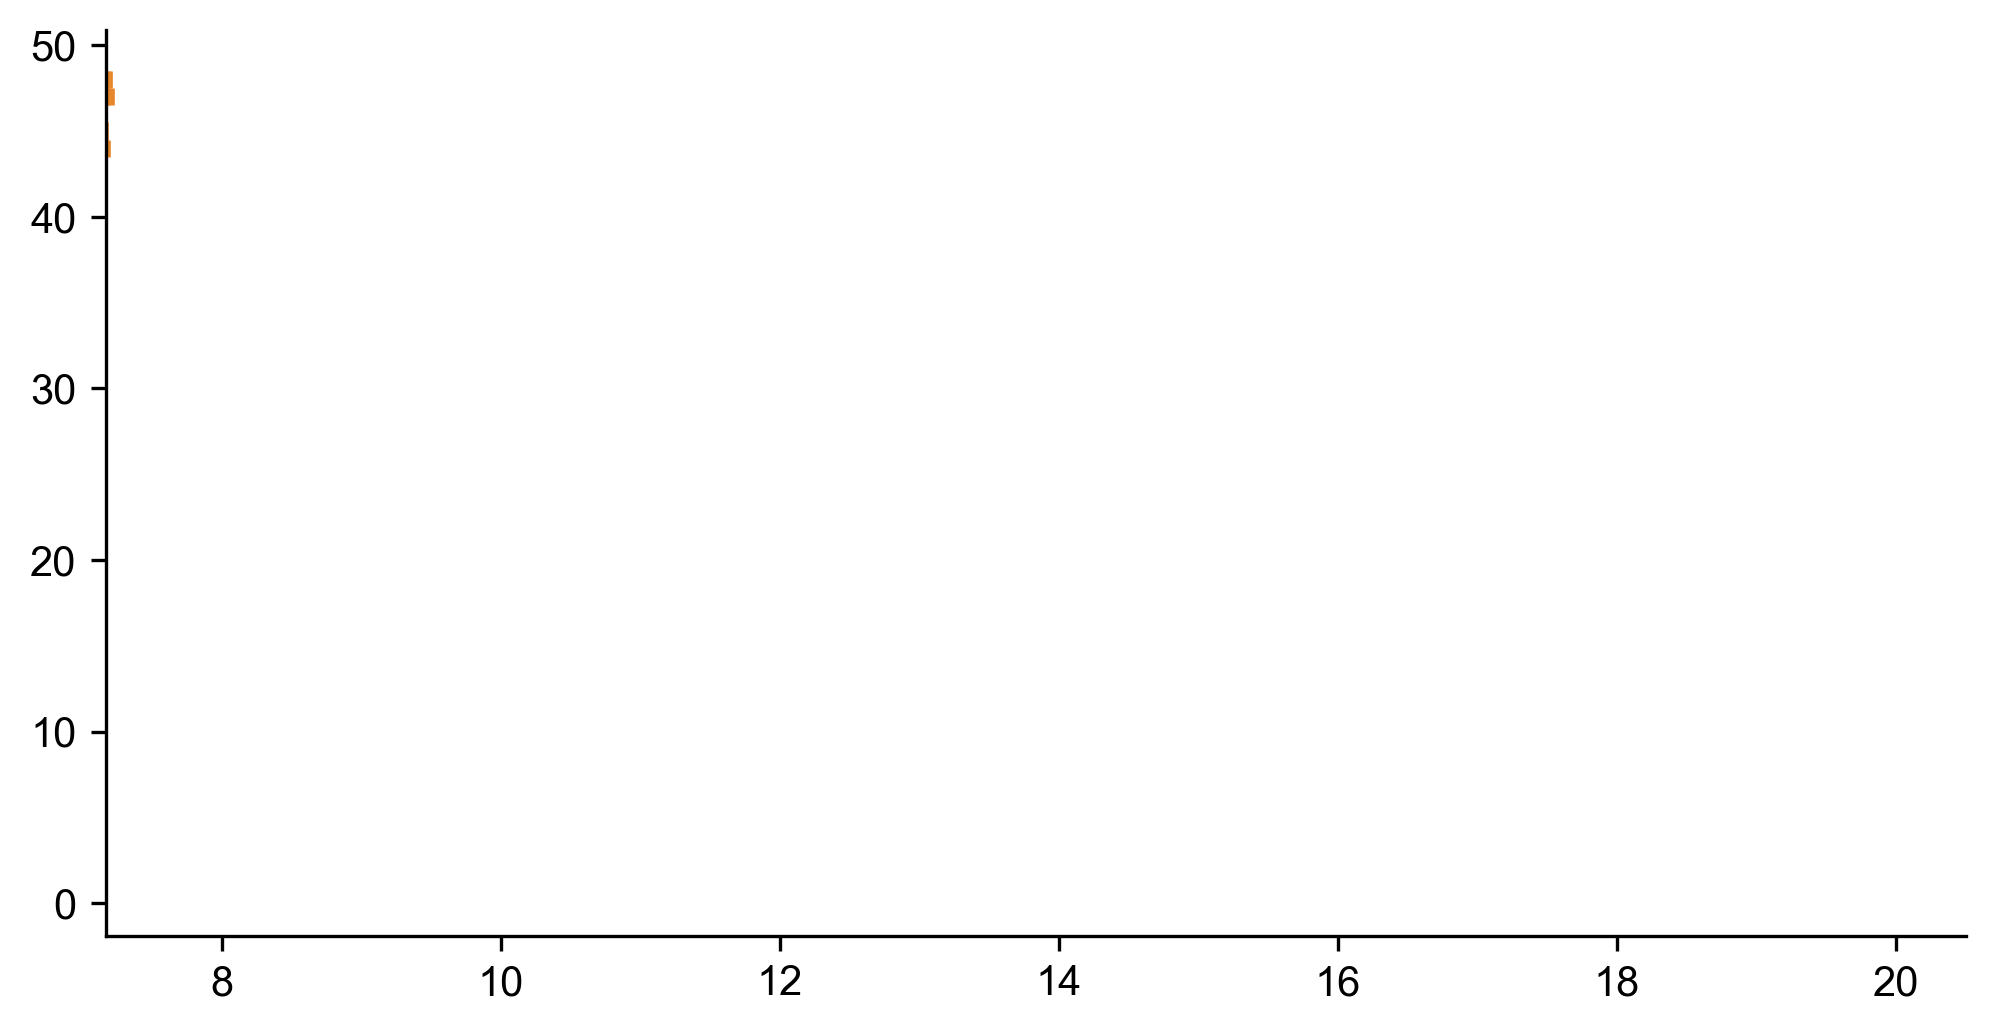

In [37]:
def plot_spikes(spike_times, title, start, finish, gids=None, **kwargs):
    place_ids = kwargs.get('place ids', [])
    cue_ids   = kwargs.get('cue ids', [])
    
    if gids is not None:
        temp_spike_times = []
        for i in range(len(spike_times)):
            if i in gids:
                temp_spike_times.append(np.divide(spike_times[i], 1000.))
        spike_times = temp_spike_times
        
    frs = []
    fig, ax = plt.subplots(dpi=300, figsize=(8,4))
#     fig, ax = plt.subplots(dpi=300, figsize=(1,1))
#     for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#         item.set_fontsize(8)
    count = 0
    for (i,pid) in enumerate(place_ids):
        sts = np.asarray(spike_times[pid])
        ax.vlines(np.asarray(sts), i+0.5, i+1.5, color=kwargs['place colors'], linewidth=4)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)
        count += 1
    for (i,cid) in enumerate(cue_ids):
        sts = np.asarray(spike_times[cid])
        ax.vlines(np.asarray(sts), i+count+0.5, i+count+1.5, color=kwargs['cue colors'], linewidth=4)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)     
        
    
    ax.set_xlim([start/1000., finish/1000.])
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0.0)  
    #plt.ylim([25, 60])

place_ids = diagram.place_information[0]['place']
place_colors = (49/255., 126/255., 194/255.)
cue_ids = diagram.place_information[0]['not place']
cue_colors = (231/255., 135/255., 43/255.)
print(sorted(place_ids))
print(sorted(cue_ids))
print(len(cue_ids))


kwargs = {'place ids': place_ids, 'place colors': place_colors, 'cue ids': cue_ids, 'cue colors': cue_colors} 
start  = time_for_single_lap * 1 + 500
finish = time_for_single_lap * 3.+ 500


print(finish-start)

scale = 2
#start = 28500
#finish = 29100

#start = 18500
#finish = 20100

plot_spikes(cell_spike_times, 'PYR all', start, finish, np.arange(130*scale), **kwargs)

kwargs = {'cue ids': cue_ids, 'cue colors': cue_colors} 
plot_spikes(cell_spike_times, 'PYR cue', start, finish, np.arange(130*scale), **kwargs)

In [14]:
def plot_spikes(spike_times, title, start, finish, gids=None, **kwargs):
    place_ids = kwargs['place ids']
    cue_ids   = kwargs['cue ids']
    
    if gids is not None:
        temp_spike_times = []
        for i in range(len(spike_times)):
            if i in gids:
                temp_spike_times.append(np.divide(spike_times[i], 1000.))
        spike_times = temp_spike_times
        
    frs = []
    #fig, ax = plt.subplots(dpi=300, figsize=(8,4))
    fig, ax = plt.subplots(dpi=300, figsize=(1,1))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(8)
    count = 0
    for (i,pid) in enumerate(place_ids):
        sts = np.asarray(spike_times[pid])
        ax.vlines(np.asarray(sts), i+0.5, i+1.5, color=kwargs['place colors'], linewidth=4)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)
        count += 1
    for (i,cid) in enumerate(cue_ids):
        sts = np.asarray(spike_times[cid])
        ax.vlines(np.asarray(sts), i+count+0.5, i+count+1.5, color=kwargs['cue colors'], linewidth=4)
        sts_chop = sts[np.where( (sts>=start) & (sts<=finish)) [0]]
        frs.append(float(len(sts_chop)) / (finish-start) * 1000.)     
        
    
    ax.set_xlim([start/1000., finish/1000.])
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0.0)  
    plt.ylim([0, 25])

place_ids = diagram.place_information[0]['place']
place_colors = (49/255., 126/255., 194/255.)
cue_ids = diagram.place_information[0]['not place']
cue_colors = (231/255., 135/255., 43/255.)
print(place_ids)


kwargs = {'place ids': place_ids, 'place colors': place_colors, 'cue ids': cue_ids, 'cue colors': cue_colors} 
start  = time_for_single_lap * 1 + 500
finish = time_for_single_lap * 3.+ 500
print(finish-start)

scale = 2
start = 14000
finish = 14100
plot_spikes(cell_spike_times, 'PYR all', start, finish, np.arange(130*scale), **kwargs)


[0, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 56, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 135, 136, 138, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 221, 222, 224, 225, 227, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 251, 252, 253, 255, 256, 257, 258, 259]
13333.333333333332


NameError: name 'cell_spike_times' is not defined

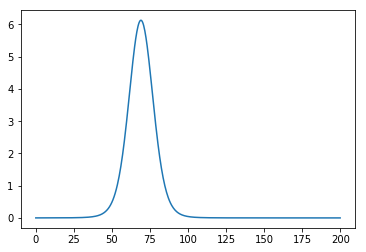

[]

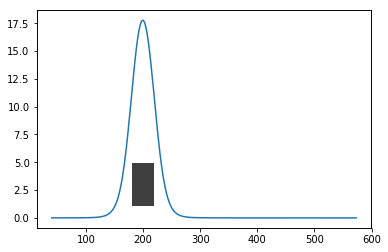

In [137]:
all_exc_frs = []
all_exc_spikes = []
valid_gids = []
start_time = time_for_single_lap * 0 + 500
end_time   = time_for_single_lap * 1 + 500

for i in circuit.neurons[0].keys():
    exc_spikes = np.asarray(circuit.neurons[0][i].spike_times)

    time_idxs = np.where( (exc_spikes >= start_time) & (exc_spikes <= end_time))[0]
    exc_spikes = exc_spikes[time_idxs]
    all_exc_spikes.append(exc_spikes)
    step = 12.5 # ms
    estimated_times = np.arange(start_time, end_time, step=step)

    try:
        estimated_fr,_ = baks(exc_spikes/1000., estimated_times/1000., a=10.0) # 1.75?
        all_exc_frs.append(estimated_fr)
        valid_gids.append(i)
    except:
        continue
all_exc_frs = np.asarray(all_exc_frs, dtype='float32')

idx = 30
plt.figure()
plt.plot(estimated_times/1000*30. - start_time/1000*30, all_exc_frs[valid_gids[idx]])
plt.show()

fig, ax = plt.subplots()
ax.plot(estimated_times/step, all_exc_frs[idx])
ax2 = ax.twinx()
ax2.vlines(all_exc_spikes[valid_gids[idx]]/step, 0.5, 1.5)
ax2.set_ylim([0, 5])
ax2.set_yticks([])


[0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 34, 36, 38, 39, 40, 42, 43, 45, 48, 49, 50, 51, 52, 53, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 83, 85, 86, 87, 89, 91, 92, 93, 94, 95, 97, 98, 101, 104, 105, 106, 107, 110]


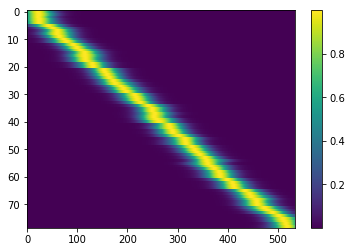

{0, 1}


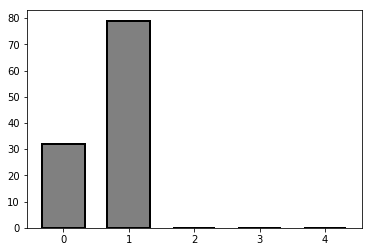

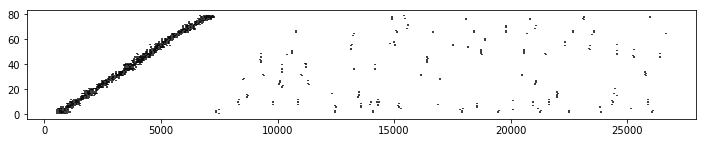

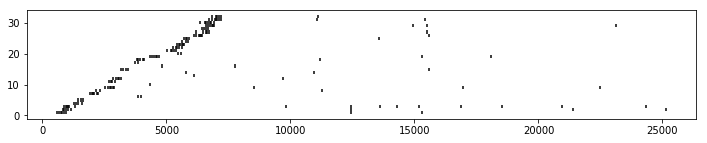

In [139]:


valid_idxs = []
invalid_idxs = []
for i in range(len(all_exc_frs)):
    sl = all_exc_frs[i]
    if not np.all(sl < 10.0): valid_idxs.append(i)
    else: 
        invalid_idxs.append(i)
valid_exc_frs = all_exc_frs[valid_idxs,:] # flip a rooni
print(valid_idxs)

normed = []
for i in range(len(valid_exc_frs)):
    normed.append(valid_exc_frs[i] / valid_exc_frs[i].max())
normed = np.asarray(normed, dtype='float32')

whereismax = []
for i in range(len(normed)):
    sl = normed[i,:]
    whereismax.append(sl.argmax())
sorted_max = np.argsort(whereismax)

normed_sorted        = normed[sorted_max,:]
valid_exc_frs_sorted = valid_exc_frs[sorted_max,:]


plt.figure()
plt.imshow(normed_sorted, cmap='viridis', aspect='auto')
plt.colorbar()
plt.show()



# fig, ax = plt.subplots(5, 5, figsize=(12,8))
# for i in range(25):
#     xx = int(i/5)
#     yy = int(i%5)
#     ax[xx,yy].plot(estimated_times, normed_sorted[i])
#     ax[xx,yy].hlines(0.80, estimated_times[0], estimated_times[-1], linestyle='--')
#     ax[xx,yy].set_title(i)
    
ncrossed = []
for i in range(len(valid_exc_frs_sorted)):
    sl = normed_sorted[i]
    crossed = False
    ticks = 0
    for s in sl:
        if s > 0.80 and not crossed: 
            crossed = True
            ticks += 1
        if s <= 0.80 and crossed:
            crossed = False
    ncrossed.append(ticks)

ncrossed = np.asarray(ncrossed + [0 for _ in range(len(all_exc_frs) - len(valid_exc_frs))])
print(set(ncrossed))
plt.figure()
plt.hist(ncrossed, bins=[0,1,2,3,4,5], align='left', rwidth=0.65, 
         edgecolor='k', color='gray', linewidth=2)
plt.show()

spike_times = np.asarray(circuit.get_cell_spikes(0))[valid_gids]
valid_raster = []
for nid in np.asarray(valid_idxs)[sorted_max]:
    valid_raster.append(spike_times[nid])

plt.figure(figsize=(12,2))
for (i,sts) in enumerate(valid_raster):
    sts = np.asarray(sts)
    plt.vlines(np.asarray(sts), i+0.5, i+1.5)
#plt.xlim([start_time, end_time])
#plt.xlim([end_time, end_time+time_for_single_lap])
plt.show()


invalid_raster = []
for nid in invalid_idxs:
    invalid_raster.append(spike_times[nid])

plt.figure(figsize=(12,2))
for (i,sts) in enumerate(invalid_raster):
    sts = np.asarray(sts)
    plt.vlines(np.asarray(sts), i+0.5, i+1.5)
#plt.xlim([start_time, end_time])
#plt.xlim([end_time, end_time+time_for_single_lap])
plt.show()
